# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:
pd.options.mode.chained_assignment = None  # to remove some warnings in colab. May not require in jupyter

# Import Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Crime_Dataset_Coursework1.csv') #change as per your file path
df.head(20)

<ipython-input-6-aee44acaaad4>:1: DtypeWarning: Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/datasets/Crime_Dataset_Coursework1.csv') #change as per your file path


Incident ID Offence Code  CR Number    Dispatch Date / Time NIBRS Code  \
0     201202980         3550  180042096  08/23/2018 09:52:08 PM        35B   
1     201181293         3522  180015424  03/30/2018 01:00:55 AM        35A   
2     201181293         3562  180015424  03/30/2018 01:00:55 AM        35A   
3     201193163         3520  180029476  06/14/2018 10:26:45 PM        35A   
4     201204355         2204  180043926  09/03/2018 12:06:54 PM        220   
5     201204355         2404  180043926  09/03/2018 12:06:54 PM        240   
6     201121509         5213   17008780                     NaN        520   
7     201091648         1103   16038843                     NaN        11A   
8     201108886         1399   16060247                     NaN        13B   
9     201124327         9199   17012248                     NaN        90Z   
10    201096093         2399   16044222                     NaN        23H   
11    201113407         2303   16066213                     NaN        23C   
12    201234630         2404  190016809  04/11/2019 04:44:42 AM        240   
13    201357499         5404  210051644  12/18/2021 11:30:27 PM        90D   
14    201301483         2501  200035364  09/09/2020 02:31:46 PM        250   
15    201114124         1399   16067054                     NaN        13B   
16    201283362         1314  200014227  03/27/2020 04:32:30 PM        13A   
17    201182797         9199  180017333  04/09/2018 11:36:51 PM        90Z   
18    201160052         3550  170539875  10/30/2017 08:21:12 PM        35B   
19    201160052         3562  170539875  10/30/2017 08:21:12 PM        35A   

    Victims             Crime Name1                     Crime Name2  \
0         1   Crime Against Society       Drug Equipment Violations   
1         1   Crime Against Society        Drug/Narcotic Violations   
2         1   Crime Against Society        Drug/Narcotic Violations   
3         1   Crime Against Society        Drug/Narcotic Violations   
4         1  Crime Against Property  Burglary/Breaking and Entering   
5         1  Crime Against Property             Motor Vehicle Theft   
6         1   Crime Against Society           Weapon Law Violations   
7         1    Crime Against Person                   Forcible Rape   
8         1    Crime Against Person                  Simple Assault   
9         1                   Other              All Other Offenses   
10        1  Crime Against Property               All other Larceny   
11        1  Crime Against Property                     Shoplifting   
12        1  Crime Against Property             Motor Vehicle Theft   
13        1   Crime Against Society     Driving Under the Influence   
14        1  Crime Against Property          Counterfeiting/Forgery   
15        1    Crime Against Person                  Simple Assault   
16        1    Crime Against Person              Aggravated Assault   
17        1                   Other              All Other Offenses   
18        1   Crime Against Society       Drug Equipment Violations   
19        1   Crime Against Society        Drug/Narcotic Violations   

                               Crime Name3 Police District Name  ...  \
0         DRUGS - NARCOTIC EQUIP - POSSESS           GERMANTOWN  ...   
1    DRUGS - OPIUM OR DERIVATIVE - POSSESS             BETHESDA  ...   
2              DRUGS - MARIJUANA - POSSESS             BETHESDA  ...   
3       DRUGS - OPIUM OR DERIVATIVE - SELL   MONTGOMERY VILLAGE  ...   
4   BURGLARY - NO FORCED ENTRY-RESIDENTIAL             BETHESDA  ...   
5               AUTO THEFT - VEHICLE THEFT             BETHESDA  ...   
6                          WEAPON - FIRING              WHEATON  ...   
7                        RAPE - STRONG-ARM              WHEATON  ...   
8                     ASSAULT - 2ND DEGREE        SILVER SPRING  ...   
9                       POLICE INFORMATION              WHEATON  ...   
10              LARCENY (DESCRIBE OFFENSE)              WHEATON  ...   
11       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306094 entries, 0 to 306093
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident ID             306094 non-null  int64  
 1   Offence Code            306094 non-null  object 
 2   CR Number               306094 non-null  int64  
 3   Dispatch Date / Time    257065 non-null  object 
 4   NIBRS Code              306094 non-null  object 
 5   Victims                 306094 non-null  int64  
 6   Crime Name1             305822 non-null  object 
 7   Crime Name2             305822 non-null  object 
 8   Crime Name3             305822 non-null  object 
 9   Police District Name    306000 non-null  object 
 10  Block Address           279888 non-null  object 
 11  City                    304818 non-null  object 
 12  State                   306094 non-null  object 
 13  Zip Code                302915 non-null  float64
 14  Agency              

In [ ]:
df['Incident ID'] = df['Incident ID'].astype('string')

In [ ]:
df['Offence Code'] = df['Offence Code'].astype('string')

In [ ]:
df['CR Number'] = df['CR Number'].astype('string')

In [ ]:
df['Zip Code'] = df['Zip Code'].astype('string')

In [ ]:
df['Address Number'] = df['Address Number'].astype('string')

In [ ]:
df['Start_Date_Time'] = pd.to_datetime(df['Start_Date_Time'])

In [ ]:
df['Dispatch_Date_Time'] = pd.to_datetime(df['Dispatch Date / Time'])

In [ ]:
df.dtypes

Incident ID                       string
Offence Code                      string
CR Number                         string
Dispatch Date / Time              object
NIBRS Code                        object
Victims                            int64
Crime Name1                       object
Crime Name2                       object
Crime Name3                       object
Police District Name              object
Block Address                     object
City                              object
State                             object
Zip Code                          string
Agency                            object
Place                             object
Sector                            object
Beat                              object
PRA                               object
Address Number                    string
Street Prefix                     object
Street Name                       object
Street Suffix                     object
Street Type                       object
Start_Date_Time 

In [ ]:
df = df.drop('Dispatch Date / Time', axis =1)

In [ ]:
df.shape

(306094, 30)

In [ ]:
df['State'].value_counts()

MD    305874
16       185
DC        22
VA         4
ME         2
MS         2
ND         1
15         1
0          1
MC         1
17         1
Name: State, dtype: int64

In [ ]:
# Conducting Analysis for only Maryland (MD) State

df = df[df['State']=='MD']

In [ ]:
start_date = '2018-01-01'
end_date = '2022-12-31'

df = df[(df['Start_Date_Time'] >= start_date) & (df['Start_Date_Time'] <= end_date)]

df

Incident ID Offence Code  CR Number NIBRS Code  Victims  \
0        201202980         3550  180042096        35B        1   
1        201181293         3522  180015424        35A        1   
2        201181293         3562  180015424        35A        1   
3        201193163         3520  180029476        35A        1   
4        201204355         2204  180043926        220        1   
...            ...          ...        ...        ...      ...   
306089   201320571         1399  210006666        13B        1   
306090   201329875         2305  210017101        23F        1   
306091   201329751         5016  210016952        90Z        1   
306092   201323117         9099  210009468        90Z        1   
306093   201327806         2305  210014587        23F        1   

                   Crime Name1                     Crime Name2  \
0        Crime Against Society       Drug Equipment Violations   
1        Crime Against Society        Drug/Narcotic Violations   
2        Crime Against Society        Drug/Narcotic Violations   
3        Crime Against Society        Drug/Narcotic Violations   
4       Crime Against Property  Burglary/Breaking and Entering   
...                        ...                             ...   
306089    Crime Against Person                  Simple Assault   
306090  Crime Against Property        Theft From Motor Vehicle   
306091   Crime Against Society              All Other Offenses   
306092   Crime Against Society              All Other Offenses   
306093  Crime Against Property        Theft From Motor Vehicle   

                                       Crime Name3 Police District Name  \
0                 DRUGS - NARCOTIC EQUIP - POSSESS           GERMANTOWN   
1            DRUGS - OPIUM OR DERIVATIVE - POSSESS             BETHESDA   
2                      DRUGS - MARIJUANA - POSSESS             BETHESDA   
3               DRUGS - OPIUM OR DERIVATIVE - SELL   MONTGOMERY VILLAGE   
4           BURGLARY - NO FORCED ENTRY-RESIDENTIAL             BETHESDA   
...                                            ...                  ...   
306089                        ASSAULT - 2ND DEGREE   MONTGOMERY VILLAGE   
306090                         LARCENY - FROM AUTO              WHEATON   
306091  OBSTRUCT GOVT - VIOLATION OF A COURT ORDER           GERMANTOWN   
306092                          ALL OTHER OFFENSES        SILVER SPRING   
306093                         LARCENY - FROM AUTO             BETHESDA   

                     Block Address  ...     Street Name Street Suffix  \
0        12800 BLK  MIDDLEBROOK RD  ...     MIDDLEBROOK           NaN   
1           8300 BLK  WOODMONT AVE  ...        WOODMONT           NaN   
2           8300 BLK  WOODMONT AVE  ...        WOODMONT           NaN   
3       400 BLK  QUINCE ORCHARD RD  ...  QUINCE ORCHARD           NaN   
4           4800 BLK  FALSTONE AVE  ...        FALSTONE           NaN   
...                            ...  ...             ...           ...   
306089     19300 BLK  TRANSHIRE RD  ...       TRANSHIRE           NaN   
306090      12500 BLK  ATHERTON DR  ...        ATHERTON           NaN   
306091       300 BLK  BALTUSROL DR  ...       BALTUSROL           NaN   
306092         7700 BLK  FENTON ST  ...          FENTON           NaN   
306093  11100 BLK  NEWPORT MILL RD  ...    NEWPORT MILL           NaN   

       Street Type     Start_Date_Time           End_Date_Time   Latitude  \
0               RD 2018-08-23 21:52:00                     NaN  39.177744   
1              AVE 2018-03-30 01:01:00                     NaN  38.992693   
2              AVE 2018-03-30 01:01:00                     NaN  38.992693   
3               RD 2018-06-14 22:26:00  06/15/2018 03:00:00 AM  39.147954   
4              AVE 2018-09-02 23:30:00  09/03/2018 12:30:00 AM  38.966174   
...            ...                 ...                     ...        ...   
306089          RD 2021-02-20 20:00:00                     NaN  39.172701   
306090          DR 2021-05-

In [ ]:
# just for our understanding
print("Missing values in each column:\n{}".format(df.isnull().sum()))

Missing values in each column:
Incident ID                    0
Offence Code                   0
CR Number                      0
NIBRS Code                     0
Victims                        0
Crime Name1                  259
Crime Name2                  259
Crime Name3                  259
Police District Name          94
Block Address              21179
City                         928
State                          0
Zip Code                      39
Agency                         0
Place                          0
Sector                      1494
Beat                        1494
PRA                          215
Address Number             21101
Street Prefix             211343
Street Name                    1
Street Suffix             217696
Street Type                   89
Start_Date_Time                0
End_Date_Time             120973
Latitude                       0
Longitude                      0
Police District Number         0
Location                       0
Dispatch_Dat

In [ ]:
# funtion to calculate % of missing values

def missing_percent():
  missing_percent = round(df.isna().sum()*100/df.shape[0],2)
  print(missing_percent.sort_values())

In [ ]:
missing_percent()

Incident ID                0.00
Police District Number     0.00
Longitude                  0.00
Latitude                   0.00
Start_Date_Time            0.00
Street Name                0.00
Location                   0.00
Agency                     0.00
State                      0.00
Place                      0.00
Offence Code               0.00
CR Number                  0.00
NIBRS Code                 0.00
Victims                    0.00
Zip Code                   0.02
Police District Name       0.04
Street Type                0.04
PRA                        0.10
Crime Name3                0.12
Crime Name2                0.12
Crime Name1                0.12
City                       0.42
Sector                     0.67
Beat                       0.67
Dispatch_Date_Time         3.09
Address Number             9.53
Block Address              9.56
End_Date_Time             54.62
Street Prefix             95.42
Street Suffix             98.28
dtype: float64


# Handling Dispatch DateTime < Start DateTime

In [ ]:
d_err = df[df['Dispatch_Date_Time' ]<df['Start_Date_Time']]
d_err

Incident ID Offence Code  CR Number NIBRS Code  Victims  \
1        201181293         3522  180015424        35A        1   
2        201181293         3562  180015424        35A        1   
13       201357499         5404  210051644        90D        1   
76       201260671         2202  190049159        220        1   
84       201352819         2303  210045744        23C        1   
...            ...          ...        ...        ...      ...   
306055   201332086         3504  210019053        35A        1   
306058   201319807         5404  210005744        90D        1   
306084   201321835         2901  210008057        290        1   
306086   201324392         2610  210010779        26F        1   
306092   201323117         9099  210009468        90Z        1   

                   Crime Name1                               Crime Name2  \
1        Crime Against Society                  Drug/Narcotic Violations   
2        Crime Against Society                  Drug/Narcotic Violations   
13       Crime Against Society               Driving Under the Influence   
76      Crime Against Property            Burglary/Breaking and Entering   
84      Crime Against Property                               Shoplifting   
...                        ...                                       ...   
306055   Crime Against Society                  Drug/Narcotic Violations   
306058   Crime Against Society               Driving Under the Influence   
306084  Crime Against Property  Destruction/Damage/Vandalism of Property   
306086  Crime Against Property                            Identity Theft   
306092   Crime Against Society                        All Other Offenses   

                                  Crime Name3 Police District Name  \
1       DRUGS - OPIUM OR DERIVATIVE - POSSESS             BETHESDA   
2                 DRUGS - MARIJUANA - POSSESS             BETHESDA   
13         DRIVING UNDER THE INFLUENCE LIQUOR           GERMANTOWN   
76        BURGLARY - FORCED ENTRY-RESIDENTIAL        SILVER SPRING   
84                      LARCENY - SHOPLIFTING           GERMANTOWN   
...                                       ...                  ...   
306055         DRUGS - HALLUCINOGEN - POSSESS           GERMANTOWN   
306058     DRIVING UNDER THE INFLUENCE LIQUOR              WHEATON   
306084             DAMAGE PROPERTY - BUSINESS   MONTGOMERY VILLAGE   
306086                         IDENTITY THEFT              WHEATON   
306092                     ALL OTHER OFFENSES        SILVER SPRING   

                    Block Address  ...   Street Name Street Suffix  \
1          8300 BLK  WOODMONT AVE  ...      WOODMONT           NaN   
2          8300 BLK  WOODMONT AVE  ...      WOODMONT           NaN   
13                            NaN  ...     FREDERICK           NaN   
76      1300 BLK  CAMERON HILL CT  ...  CAMERON HILL           NaN   
84        20900 BLK  FREDERICK RD  ...     FREDERICK           NaN   
...                           ...  ...           ...           ...   
306055    22900 BLK  TOWNSEND TRL  ...      TOWNSEND           NaN   
306058     18300 BLK  DUTCHESS DR  ...      DUTCHESS           NaN   
306084    14900 BLK  BROSCHART RD  ...     BROSCHART           NaN   
306086   4900 BLK  WALKINGFERN DR  ...   WALKINGFERN           NaN   
306092        7700 BLK  FENTON ST  ...        FENTON           NaN   

       Street Type     Start_Date_Time           End_Date_Time   Latitude  \
1              AVE 2018-03-30 01:01:00                     NaN  38.992693   
2              AVE 2018-03-30 01:01:00                     NaN  38.992693   
13              RD 2021-12-19 01:41:00                     NaN   0.000000   
76              CT 2019-10-13 11:30:00  10/13/2019 07:15:00 AM  38.996115   
84              RD 2021-11-11 20:35:00                     NaN  39.199270   
...            ...                 ...                     ...        ...   
306055         TRL 2021-05-20 19:34:00                     NaN  39.232387   
306

In [ ]:
dd = df.copy()

In [ ]:
dd = dd.drop(df[df['Dispatch_Date_Time' ]<df['Start_Date_Time']].index)

In [ ]:
dd

Incident ID Offence Code  CR Number NIBRS Code  Victims  \
0        201202980         3550  180042096        35B        1   
3        201193163         3520  180029476        35A        1   
4        201204355         2204  180043926        220        1   
5        201204355         2404  180043926        240        1   
12       201234630         2404  190016809        240        1   
...            ...          ...        ...        ...      ...   
306088   201330811         2902  210018244        290        1   
306089   201320571         1399  210006666        13B        1   
306090   201329875         2305  210017101        23F        1   
306091   201329751         5016  210016952        90Z        1   
306093   201327806         2305  210014587        23F        1   

                   Crime Name1                               Crime Name2  \
0        Crime Against Society                 Drug Equipment Violations   
3        Crime Against Society                  Drug/Narcotic Violations   
4       Crime Against Property            Burglary/Breaking and Entering   
5       Crime Against Property                       Motor Vehicle Theft   
12      Crime Against Property                       Motor Vehicle Theft   
...                        ...                                       ...   
306088  Crime Against Property  Destruction/Damage/Vandalism of Property   
306089    Crime Against Person                            Simple Assault   
306090  Crime Against Property                  Theft From Motor Vehicle   
306091   Crime Against Society                        All Other Offenses   
306093  Crime Against Property                  Theft From Motor Vehicle   

                                       Crime Name3 Police District Name  \
0                 DRUGS - NARCOTIC EQUIP - POSSESS           GERMANTOWN   
3               DRUGS - OPIUM OR DERIVATIVE - SELL   MONTGOMERY VILLAGE   
4           BURGLARY - NO FORCED ENTRY-RESIDENTIAL             BETHESDA   
5                       AUTO THEFT - VEHICLE THEFT             BETHESDA   
12                      AUTO THEFT - VEHICLE THEFT            ROCKVILLE   
...                                            ...                  ...   
306088                   DAMAGE PROPERTY - PRIVATE              WHEATON   
306089                        ASSAULT - 2ND DEGREE   MONTGOMERY VILLAGE   
306090                         LARCENY - FROM AUTO              WHEATON   
306091  OBSTRUCT GOVT - VIOLATION OF A COURT ORDER           GERMANTOWN   
306093                         LARCENY - FROM AUTO             BETHESDA   

                     Block Address  ...     Street Name Street Suffix  \
0        12800 BLK  MIDDLEBROOK RD  ...     MIDDLEBROOK           NaN   
3       400 BLK  QUINCE ORCHARD RD  ...  QUINCE ORCHARD           NaN   
4           4800 BLK  FALSTONE AVE  ...        FALSTONE           NaN   
5           4800 BLK  FALSTONE AVE  ...        FALSTONE           NaN   
12         200 BLK  GREAT FALLS RD  ...     GREAT FALLS           NaN   
...                            ...  ...             ...           ...   
306088      11400 BLK  GEORGIA AVE  ...         GEORGIA           NaN   
306089     19300 BLK  TRANSHIRE RD  ...       TRANSHIRE           NaN   
306090      12500 BLK  ATHERTON DR  ...        ATHERTON           NaN   
306091       300 BLK  BALTUSROL DR  ...       BALTUSROL           NaN   
306093  11100 BLK  NEWPORT MILL RD  ...    NEWPORT MILL           NaN   

       Street Type     Start_Date_Time           End_Date_Time   Latitude  \
0               RD 2018-08-23 21:52:00                     NaN  39.177744   
3               RD 2018-06-14 22:26:00  06/15/2018 03:00:00 AM  39.147954   
4              AVE 2018-09-02 23:30:00  09/03/2018 12:30:00 AM  38.966174   
5              AVE 2018-09-02 23:30:00  09/03/2018 12:30:00 AM  38.966174   
12              RD 2019-04-10 22:00:00  04/11/2019 04:20:00 AM  39.083781   
...            ...                 ...                     ..

In [ ]:
d_err = d_err.rename(columns = {'Start_Date_Time' : 'Dispatch_Date_Time', 'Dispatch_Date_Time' : 'Start_Date_Time'})

In [ ]:
d_err

Incident ID Offence Code  CR Number NIBRS Code  Victims  \
1        201181293         3522  180015424        35A        1   
2        201181293         3562  180015424        35A        1   
13       201357499         5404  210051644        90D        1   
76       201260671         2202  190049159        220        1   
84       201352819         2303  210045744        23C        1   
...            ...          ...        ...        ...      ...   
306055   201332086         3504  210019053        35A        1   
306058   201319807         5404  210005744        90D        1   
306084   201321835         2901  210008057        290        1   
306086   201324392         2610  210010779        26F        1   
306092   201323117         9099  210009468        90Z        1   

                   Crime Name1                               Crime Name2  \
1        Crime Against Society                  Drug/Narcotic Violations   
2        Crime Against Society                  Drug/Narcotic Violations   
13       Crime Against Society               Driving Under the Influence   
76      Crime Against Property            Burglary/Breaking and Entering   
84      Crime Against Property                               Shoplifting   
...                        ...                                       ...   
306055   Crime Against Society                  Drug/Narcotic Violations   
306058   Crime Against Society               Driving Under the Influence   
306084  Crime Against Property  Destruction/Damage/Vandalism of Property   
306086  Crime Against Property                            Identity Theft   
306092   Crime Against Society                        All Other Offenses   

                                  Crime Name3 Police District Name  \
1       DRUGS - OPIUM OR DERIVATIVE - POSSESS             BETHESDA   
2                 DRUGS - MARIJUANA - POSSESS             BETHESDA   
13         DRIVING UNDER THE INFLUENCE LIQUOR           GERMANTOWN   
76        BURGLARY - FORCED ENTRY-RESIDENTIAL        SILVER SPRING   
84                      LARCENY - SHOPLIFTING           GERMANTOWN   
...                                       ...                  ...   
306055         DRUGS - HALLUCINOGEN - POSSESS           GERMANTOWN   
306058     DRIVING UNDER THE INFLUENCE LIQUOR              WHEATON   
306084             DAMAGE PROPERTY - BUSINESS   MONTGOMERY VILLAGE   
306086                         IDENTITY THEFT              WHEATON   
306092                     ALL OTHER OFFENSES        SILVER SPRING   

                    Block Address  ...   Street Name Street Suffix  \
1          8300 BLK  WOODMONT AVE  ...      WOODMONT           NaN   
2          8300 BLK  WOODMONT AVE  ...      WOODMONT           NaN   
13                            NaN  ...     FREDERICK           NaN   
76      1300 BLK  CAMERON HILL CT  ...  CAMERON HILL           NaN   
84        20900 BLK  FREDERICK RD  ...     FREDERICK           NaN   
...                           ...  ...           ...           ...   
306055    22900 BLK  TOWNSEND TRL  ...      TOWNSEND           NaN   
306058     18300 BLK  DUTCHESS DR  ...      DUTCHESS           NaN   
306084    14900 BLK  BROSCHART RD  ...     BROSCHART           NaN   
306086   4900 BLK  WALKINGFERN DR  ...   WALKINGFERN           NaN   
306092        7700 BLK  FENTON ST  ...        FENTON           NaN   

       Street Type  Dispatch_Date_Time           End_Date_Time   Latitude  \
1              AVE 2018-03-30 01:01:00                     NaN  38.992693   
2              AVE 2018-03-30 01:01:00                     NaN  38.992693   
13              RD 2021-12-19 01:41:00                     NaN   0.000000   
76              CT 2019-10-13 11:30:00  10/13/2019 07:15:00 AM  38.996115   
84              RD 2021-11-11 20:35:00                     NaN  39.199270   
...            ...                 ...                     ...        ...   
306055         TRL 2021-05-20 19:34:00                     NaN  39.232387   
306

In [ ]:
d_err[d_err['Dispatch_Date_Time' ]<d_err['Start_Date_Time']]

Empty DataFrame
Columns: [Incident ID, Offence Code, CR Number, NIBRS Code, Victims, Crime Name1, Crime Name2, Crime Name3, Police District Name, Block Address, City, State, Zip Code, Agency, Place, Sector, Beat, PRA, Address Number, Street Prefix, Street Name, Street Suffix, Street Type, Dispatch_Date_Time, End_Date_Time, Latitude, Longitude, Police District Number, Location, Start_Date_Time]
Index: []

[0 rows x 30 columns]

In [ ]:
df = pd.concat([dd,d_err])

In [ ]:
df[df['Dispatch_Date_Time' ]<df['Start_Date_Time']]

Empty DataFrame
Columns: [Incident ID, Offence Code, CR Number, NIBRS Code, Victims, Crime Name1, Crime Name2, Crime Name3, Police District Name, Block Address, City, State, Zip Code, Agency, Place, Sector, Beat, PRA, Address Number, Street Prefix, Street Name, Street Suffix, Street Type, Start_Date_Time, End_Date_Time, Latitude, Longitude, Police District Number, Location, Dispatch_Date_Time]
Index: []

[0 rows x 30 columns]

In [ ]:
df

Incident ID Offence Code  CR Number NIBRS Code  Victims  \
0        201202980         3550  180042096        35B        1   
3        201193163         3520  180029476        35A        1   
4        201204355         2204  180043926        220        1   
5        201204355         2404  180043926        240        1   
12       201234630         2404  190016809        240        1   
...            ...          ...        ...        ...      ...   
306055   201332086         3504  210019053        35A        1   
306058   201319807         5404  210005744        90D        1   
306084   201321835         2901  210008057        290        1   
306086   201324392         2610  210010779        26F        1   
306092   201323117         9099  210009468        90Z        1   

                   Crime Name1                               Crime Name2  \
0        Crime Against Society                 Drug Equipment Violations   
3        Crime Against Society                  Drug/Narcotic Violations   
4       Crime Against Property            Burglary/Breaking and Entering   
5       Crime Against Property                       Motor Vehicle Theft   
12      Crime Against Property                       Motor Vehicle Theft   
...                        ...                                       ...   
306055   Crime Against Society                  Drug/Narcotic Violations   
306058   Crime Against Society               Driving Under the Influence   
306084  Crime Against Property  Destruction/Damage/Vandalism of Property   
306086  Crime Against Property                            Identity Theft   
306092   Crime Against Society                        All Other Offenses   

                                   Crime Name3 Police District Name  \
0             DRUGS - NARCOTIC EQUIP - POSSESS           GERMANTOWN   
3           DRUGS - OPIUM OR DERIVATIVE - SELL   MONTGOMERY VILLAGE   
4       BURGLARY - NO FORCED ENTRY-RESIDENTIAL             BETHESDA   
5                   AUTO THEFT - VEHICLE THEFT             BETHESDA   
12                  AUTO THEFT - VEHICLE THEFT            ROCKVILLE   
...                                        ...                  ...   
306055          DRUGS - HALLUCINOGEN - POSSESS           GERMANTOWN   
306058      DRIVING UNDER THE INFLUENCE LIQUOR              WHEATON   
306084              DAMAGE PROPERTY - BUSINESS   MONTGOMERY VILLAGE   
306086                          IDENTITY THEFT              WHEATON   
306092                      ALL OTHER OFFENSES        SILVER SPRING   

                     Block Address  ...     Street Name Street Suffix  \
0        12800 BLK  MIDDLEBROOK RD  ...     MIDDLEBROOK           NaN   
3       400 BLK  QUINCE ORCHARD RD  ...  QUINCE ORCHARD           NaN   
4           4800 BLK  FALSTONE AVE  ...        FALSTONE           NaN   
5           4800 BLK  FALSTONE AVE  ...        FALSTONE           NaN   
12         200 BLK  GREAT FALLS RD  ...     GREAT FALLS           NaN   
...                            ...  ...             ...           ...   
306055     22900 BLK  TOWNSEND TRL  ...        TOWNSEND           NaN   
306058      18300 BLK  DUTCHESS DR  ...        DUTCHESS           NaN   
306084     14900 BLK  BROSCHART RD  ...       BROSCHART           NaN   
306086    4900 BLK  WALKINGFERN DR  ...     WALKINGFERN           NaN   
306092         7700 BLK  FENTON ST  ...          FENTON           NaN   

       Street Type     Start_Date_Time           End_Date_Time   Latitude  \
0               RD 2018-08-23 21:52:00                     NaN  39.177744   
3               RD 2018-06-14 22:26:00  06/15/2018 03:00:00 AM  39.147954   
4              AVE 2018-09-02 23:30:00  09/03/2018 12:30:00 AM  38.966174   
5              AVE 2018-09-02 23:30:00  09/03/2018 12:30:00 AM  38.966174   
12              RD 2019-04-10 22:00:00  04/11/2019 04:20:00 AM  39.083781   
...            ...                 ...                     ...        ...   
306055         TRL 2021-05-20 14

In [ ]:
# checking any data < start date

df[(df['Start_Date_Time'] < start_date)]

Incident ID Offence Code  CR Number NIBRS Code  Victims  \
92563    201299739         9199  170515495        90Z        1   
98657    201297998         9199  170517912        90Z        1   
167906   201168944         2603  170551023        26A        1   
169316   201169183         9099  170551203        90Z        1   
175367   201169183         1199  170551203        11D        2   
207650   201208749         2305  180046787        23F        1   

                   Crime Name1                              Crime Name2  \
92563                    Other                       All Other Offenses   
98657                    Other                       All Other Offenses   
167906  Crime Against Property  False Pretenses/Swindle/Confidence Game   
169316   Crime Against Society                       All Other Offenses   
175367    Crime Against Person                                 Fondling   
207650  Crime Against Property                 Theft From Motor Vehicle   

                   Crime Name3 Police District Name          Block Address  \
92563       POLICE INFORMATION        SILVER SPRING  8600 BLK  GARLAND AVE   
98657       POLICE INFORMATION        SILVER SPRING     12200 BLK  TECH RD   
167906            FRAUD - MAIL              WHEATON  2300 BLK  RANDOLPH RD   
169316      ALL OTHER OFFENSES             BETHESDA      4700 BLK  SAUL RD   
175367  SEX ASSAULT - FONDLING             BETHESDA      4700 BLK  SAUL RD   
207650     LARCENY - FROM AUTO  CITY OF TAKOMA PARK    7600 BLK  MAPLE AVE   

        ... Street Name Street Suffix Street Type     Start_Date_Time  \
92563   ...     GARLAND           NaN         AVE 2017-06-24 04:06:13   
98657   ...        TECH           NaN          RD 2017-07-07 22:51:11   
167906  ...    RANDOLPH           NaN          RD 2017-12-28 10:50:19   
169316  ...        SAUL           NaN          RD 2017-12-29 16:12:29   
175367  ...        SAUL           NaN          RD 2017-12-29 16:12:29   
207650  ...       MAPLE           NaN         AVE 2017-11-22 11:51:18   

                 End_Date_Time   Latitude  Longitude Police District Number  \
92563                      NaN  38.996850 -76.998680                     3D   
98657                      NaN  39.055131 -76.966613                     3D   
167906                     NaN  39.058554 -77.048883                     4D   
169316                     NaN  39.020728 -77.094181                     2D   
175367                     NaN  39.020728 -77.094181                     2D   
207650  09/19/2018 06:30:00 AM  38.982686 -77.007427                     8D   

                   Location  Dispatch_Date_Time  
92563   (38.9969, -76.9987) 2020-08-26 11:55:00  
98657   (39.0551, -76.9666) 2020-08-11 20:38:00  
167906  (39.0586, -77.0489) 2018-01-01 14:11:00  
169316  (39.0207, -77.0942) 2018-01-03 11:57:00  
175367  (39.0207, -77.0942) 2018-01-03 11:57:00  
207650  (38.9827, -77.0074) 2018-09-18 20:00:00  

[6 rows x 30 columns]

In [ ]:
# Since there are 6 more records, again filtering based on date criteria

df = df[(df['Start_Date_Time'] >= start_date) & (df['Start_Date_Time'] <= end_date)]

In [ ]:
df

Incident ID Offence Code  CR Number NIBRS Code  Victims  \
0        201202980         3550  180042096        35B        1   
3        201193163         3520  180029476        35A        1   
4        201204355         2204  180043926        220        1   
5        201204355         2404  180043926        240        1   
12       201234630         2404  190016809        240        1   
...            ...          ...        ...        ...      ...   
306055   201332086         3504  210019053        35A        1   
306058   201319807         5404  210005744        90D        1   
306084   201321835         2901  210008057        290        1   
306086   201324392         2610  210010779        26F        1   
306092   201323117         9099  210009468        90Z        1   

                   Crime Name1                               Crime Name2  \
0        Crime Against Society                 Drug Equipment Violations   
3        Crime Against Society                  Drug/Narcotic Violations   
4       Crime Against Property            Burglary/Breaking and Entering   
5       Crime Against Property                       Motor Vehicle Theft   
12      Crime Against Property                       Motor Vehicle Theft   
...                        ...                                       ...   
306055   Crime Against Society                  Drug/Narcotic Violations   
306058   Crime Against Society               Driving Under the Influence   
306084  Crime Against Property  Destruction/Damage/Vandalism of Property   
306086  Crime Against Property                            Identity Theft   
306092   Crime Against Society                        All Other Offenses   

                                   Crime Name3 Police District Name  \
0             DRUGS - NARCOTIC EQUIP - POSSESS           GERMANTOWN   
3           DRUGS - OPIUM OR DERIVATIVE - SELL   MONTGOMERY VILLAGE   
4       BURGLARY - NO FORCED ENTRY-RESIDENTIAL             BETHESDA   
5                   AUTO THEFT - VEHICLE THEFT             BETHESDA   
12                  AUTO THEFT - VEHICLE THEFT            ROCKVILLE   
...                                        ...                  ...   
306055          DRUGS - HALLUCINOGEN - POSSESS           GERMANTOWN   
306058      DRIVING UNDER THE INFLUENCE LIQUOR              WHEATON   
306084              DAMAGE PROPERTY - BUSINESS   MONTGOMERY VILLAGE   
306086                          IDENTITY THEFT              WHEATON   
306092                      ALL OTHER OFFENSES        SILVER SPRING   

                     Block Address  ...     Street Name Street Suffix  \
0        12800 BLK  MIDDLEBROOK RD  ...     MIDDLEBROOK           NaN   
3       400 BLK  QUINCE ORCHARD RD  ...  QUINCE ORCHARD           NaN   
4           4800 BLK  FALSTONE AVE  ...        FALSTONE           NaN   
5           4800 BLK  FALSTONE AVE  ...        FALSTONE           NaN   
12         200 BLK  GREAT FALLS RD  ...     GREAT FALLS           NaN   
...                            ...  ...             ...           ...   
306055     22900 BLK  TOWNSEND TRL  ...        TOWNSEND           NaN   
306058      18300 BLK  DUTCHESS DR  ...        DUTCHESS           NaN   
306084     14900 BLK  BROSCHART RD  ...       BROSCHART           NaN   
306086    4900 BLK  WALKINGFERN DR  ...     WALKINGFERN           NaN   
306092         7700 BLK  FENTON ST  ...          FENTON           NaN   

       Street Type     Start_Date_Time           End_Date_Time   Latitude  \
0               RD 2018-08-23 21:52:00                     NaN  39.177744   
3               RD 2018-06-14 22:26:00  06/15/2018 03:00:00 AM  39.147954   
4              AVE 2018-09-02 23:30:00  09/03/2018 12:30:00 AM  38.966174   
5              AVE 2018-09-02 23:30:00  09/03/2018 12:30:00 AM  38.966174   
12              RD 2019-04-10 22:00:00  04/11/2019 04:20:00 AM  39.083781   
...            ...                 ...                     ...        ...   
306055         TRL 2021-05-20 14

# Handling Missing Values in Crime Names 1 and 2

In [ ]:
df.groupby(['NIBRS Code']).agg({'Crime Name1': lambda x : x.isnull().sum(), 'Crime Name2' : lambda x : x.isnull().sum()})

Crime Name1  Crime Name2
NIBRS Code                          
09A                   0            0
09B                   0            0
09C                   0            0
100                   0            0
11A                   0            0
11B                   0            0
11C                   0            0
11D                   0            0
120                   0            0
13A                   0            0
13B                   0            0
13C                   0            0
200                   0            0
210                   0            0
220                   0            0
23A                   0            0
23B                   0            0
23C                   0            0
23D                   0            0
23E                   0            0
23F                   0            0
23G                   0            0
23H                   0            0
240                   0            0
250                   0            0
26A                   0            0
26B                   0            0
26C                   0            0
26D                   0            0
26E                   0            0
26F                   0            0
26G                 143          143
270                   0            0
280                   0            0
290                   0            0
35A                  48           48
35B                   0            0
36B                   0            0
370                   0            0
39B                   0            0
40A                   0            0
40B                   0            0
40C                   0            0
510                   0            0
520                   0            0
64A                   0            0
64B                   0            0
90A                   0            0
90B                   0            0
90C                   0            0
90D                   0            0
90E                   0            0
90F                   0            0
90G                   0            0
90H                   0            0
90I                   0            0
90J                   0            0
90Z                  68           68

In [ ]:
df['Crime Name1'] = df.apply(
    lambda row: 'Crime Against Person, Property, or Society' if pd.isnull(row['Crime Name1']) and row['NIBRS Code'] == '90Z'
    else row['Crime Name1'],
    axis=1
)

In [ ]:
df['Crime Name2'] = df.apply(
    lambda row: 'All Other Offenses' if pd.isnull(row['Crime Name2']) and row['NIBRS Code'] == '90Z' else row['Crime Name2'],
    axis=1
)

In [ ]:
df['Crime Name1'] = df.apply(
    lambda row: 'Crime Against Society' if pd.isnull(row['Crime Name1']) and row['NIBRS Code'] == '35A'
    else row['Crime Name1'],
    axis=1
)

In [ ]:
df['Crime Name2'] = df.apply(
    lambda row: 'Drug/Narcotic Violation' if pd.isnull(row['Crime Name2']) and row['NIBRS Code'] == '35A' else row['Crime Name2'],
    axis=1
)

In [ ]:
df['Crime Name1'] = df.apply(
    lambda row: 'Crime Against Property' if pd.isnull(row['Crime Name1']) and row['NIBRS Code'] == '26G'
    else row['Crime Name1'],
    axis=1
)

In [ ]:
df['Crime Name2'] = df.apply(
    lambda row: 'Hacking/Computer Invasion' if pd.isnull(row['Crime Name2']) and row['NIBRS Code'] == '26G' else row['Crime Name2'],
    axis=1
)

In [ ]:
df.groupby(['NIBRS Code']).agg({'Crime Name1': lambda x : x.isnull().sum(), 'Crime Name2' : lambda x : x.isnull().sum()})

Crime Name1  Crime Name2
NIBRS Code                          
09A                   0            0
09B                   0            0
09C                   0            0
100                   0            0
11A                   0            0
11B                   0            0
11C                   0            0
11D                   0            0
120                   0            0
13A                   0            0
13B                   0            0
13C                   0            0
200                   0            0
210                   0            0
220                   0            0
23A                   0            0
23B                   0            0
23C                   0            0
23D                   0            0
23E                   0            0
23F                   0            0
23G                   0            0
23H                   0            0
240                   0            0
250                   0            0
26A                   0            0
26B                   0            0
26C                   0            0
26D                   0            0
26E                   0            0
26F                   0            0
26G                   0            0
270                   0            0
280                   0            0
290                   0            0
35A                   0            0
35B                   0            0
36B                   0            0
370                   0            0
39B                   0            0
40A                   0            0
40B                   0            0
40C                   0            0
510                   0            0
520                   0            0
64A                   0            0
64B                   0            0
90A                   0            0
90B                   0            0
90C                   0            0
90D                   0            0
90E                   0            0
90F                   0            0
90G                   0            0
90H                   0            0
90I                   0            0
90J                   0            0
90Z                   0            0

# Handling Missing Values in Crime Name 3

In [ ]:
d1 = df[df['Crime Name3'].isnull()][['NIBRS Code', 'Offence Code', 'Crime Name3']]

In [ ]:
d1.groupby(['NIBRS Code','Offence Code']).agg({ 'Crime Name3' : lambda x : x.isnull().sum()})

Crime Name3
NIBRS Code Offence Code             
26G        2611                  143
35A        3584                   48
90Z        5315                   11
           5316                   15
           5317                    7
           5318                   35

In [ ]:
df[df['Offence Code']=='2611']['Crime Name3'].unique()

array([nan], dtype=object)

In [ ]:
df[df['Offence Code']=='3584']['Crime Name3'].unique()

array([nan], dtype=object)

In [ ]:
df[df['Offence Code']=='5315']['Crime Name3'].unique()

array([nan], dtype=object)

In [ ]:
df[df['Offence Code']=='5316']['Crime Name3'].unique()

array([nan], dtype=object)

In [ ]:
df[df['Offence Code']=='5317']['Crime Name3'].unique()

array([nan], dtype=object)

In [ ]:
df[df['Offence Code']=='5318']['Crime Name3'].unique()

array([nan], dtype=object)

In [ ]:
# The above mentioned offence code has only nan values in Crime Name 3
# And based on 'https://www.cityofsacramento.org/~/media/Corporate/Files/Police/Crime/ucrcodes.pdf'
# this document, these offence codes don't exist.
# Thus filling nan values with 'Incorrect Offence Code'

df['Crime Name3'] = df['Crime Name3'].fillna('Incorrect Offence Code')

# Correcting Crime Names 1 and 2 wrt NIBRS Code

In [ ]:
df.groupby(['NIBRS Code']).agg({'Crime Name1': lambda x : len(x.unique()), 'Crime Name2': lambda x : len(x.unique())})

Crime Name1  Crime Name2
NIBRS Code                          
09A                   1            1
09B                   1            1
09C                   1            1
100                   1            1
11A                   1            1
11B                   2            2
11C                   1            1
11D                   1            2
120                   1            1
13A                   1            1
13B                   1            1
13C                   1            1
200                   1            1
210                   1            1
220                   1            1
23A                   1            1
23B                   1            1
23C                   1            1
23D                   1            1
23E                   1            1
23F                   1            1
23G                   1            1
23H                   1            1
240                   1            1
250                   1            1
26A                   2            2
26B                   1            1
26C                   1            1
26D                   1            1
26E                   1            1
26F                   1            1
26G                   1            1
270                   1            1
280                   1            1
290                   1            1
35A                   1            2
35B                   1            1
36B                   1            1
370                   1            1
39B                   1            1
40A                   1            1
40B                   1            1
40C                   1            1
510                   1            1
520                   1            1
64A                   1            1
64B                   1            1
90A                   1            1
90B                   1            1
90C                   1            2
90D                   1            1
90E                   1            1
90F                   1            1
90G                   1            1
90H                   1            1
90I                   1            1
90J                   1            1
90Z                   6            3

## Handling 11B

In [ ]:
df[df['NIBRS Code']=='11B'].groupby(['NIBRS Code', 'Crime Name1', 'Crime Name2', 'Crime Name3']).count()

Incident ID  \
NIBRS Code Crime Name1           Crime Name2        Crime Name3                                          
11B        Crime Against Person  Forcible Sodomy    HOMOSEXUAL ACT WITH BOY                          8   
                                                    SEX ASSAULT - SODOMY-BOY-STRONG-ARM             74   
                                                    SEX ASSAULT - SODOMY-GIRL-STRONG-ARM           220   
                                                    SEX ASSAULT - SODOMY-GIRL-WEAPON                 1   
                                                    SEX ASSAULT - SODOMY-MAN-GUN                     2   
                                                    SEX ASSAULT - SODOMY-MAN-STRONG-ARM             37   
                                                    SEX ASSAULT - SODOMY-MAN-WEAPON                  5   
                                                    SEX ASSAULT - SODOMY-WOMAN-GUN                   3   
                                                    SEX ASSAULT - SODOMY-WOMAN-STRONG-ARM          134   
                                                    SEX ASSAULT - SODOMY-WOMAN-WEAPON                2   
           Crime Against Society All Other Offenses HOMOSEXUAL ACT WITH MAN                          2   

                                                                                           Offence Code  \
NIBRS Code Crime Name1           Crime Name2        Crime Name3                                           
11B        Crime Against Person  Forcible Sodomy    HOMOSEXUAL ACT WITH BOY                           8   
                                                    SEX ASSAULT - SODOMY-BOY-STRONG-ARM              74   
                                                    SEX ASSAULT - SODOMY-GIRL-STRONG-ARM            220   
                                                    SEX ASSAULT - SODOMY-GIRL-WEAPON                  1   
                                                    SEX ASSAULT - SODOMY-MAN-GUN                      2   
                                                    SEX ASSAULT - SODOMY-MAN-STRONG-ARM              37   
                                                    SEX ASSAULT - SODOMY-MAN-WEAPON                   5   
                                                    SEX ASSAULT - SODOMY-WOMAN-GUN                    3   
                                                    SEX ASSAULT - SODOMY-WOMAN-STRONG-ARM           134   
                                                    SEX ASSAULT - SODOMY-WOMAN-WEAPON                 2   
           Crime Against Society All Other Offenses HOMOSEXUAL ACT WITH MAN                           2   

                                                                                           CR Number  \
NIBRS Code Crime Name1           Crime Name2        Crime Name3                                        
11B        Crime Against Person  Forcible Sodomy    HOMOSEXUAL ACT WITH BOY                        8   
                                                    SEX ASSAULT - SODOMY-BOY-STRONG-ARM           74   
                                                    SEX ASSAULT - SODOMY-GIRL-STRONG-ARM         220   
                                                    SEX ASSAULT - SODOMY-GIRL-WEAPON               1   
                                                    SEX ASSAULT - SODOMY-MAN-GUN                   2   
                                                    SEX ASSAULT - SODOMY-MAN-STRONG-ARM           37   
                                                    SEX ASSAULT - SODOMY-MAN-WEAPON                5   
                                                    SEX ASSAULT - SODOMY-WOMAN-GUN                 3   
                                                    SEX ASSAULT - SODOMY-WOMAN-STRONG-ARM        134   
                                                    SEX ASSAULT - SODOMY-WOMAN-WEAPON              2   
           Crime Against Society All Other Offenses HOMOSEXUAL ACT WITH 

In [ ]:
df['Crime Name1'] = df.apply(
    lambda row: 'Crime Against Person' if row['Crime Name1'] != 'Crime Against Person' and row['NIBRS Code'] == '11B'
    else row['Crime Name1'],
    axis=1
)

In [ ]:
df['Crime Name2'] = df.apply(
    lambda row: 'Forcible Sodomy' if row['Crime Name2'] != 'Forcible Sodomy' and row['NIBRS Code'] == '11B' else row['Crime Name2'],
    axis=1
)

In [ ]:
# Validating the changes made
df[df['NIBRS Code']=='11B'].groupby(['NIBRS Code', 'Crime Name1', 'Crime Name2', 'Crime Name3']).count()

Incident ID  \
NIBRS Code Crime Name1          Crime Name2     Crime Name3                                          
11B        Crime Against Person Forcible Sodomy HOMOSEXUAL ACT WITH BOY                          8   
                                                HOMOSEXUAL ACT WITH MAN                          2   
                                                SEX ASSAULT - SODOMY-BOY-STRONG-ARM             74   
                                                SEX ASSAULT - SODOMY-GIRL-STRONG-ARM           220   
                                                SEX ASSAULT - SODOMY-GIRL-WEAPON                 1   
                                                SEX ASSAULT - SODOMY-MAN-GUN                     2   
                                                SEX ASSAULT - SODOMY-MAN-STRONG-ARM             37   
                                                SEX ASSAULT - SODOMY-MAN-WEAPON                  5   
                                                SEX ASSAULT - SODOMY-WOMAN-GUN                   3   
                                                SEX ASSAULT - SODOMY-WOMAN-STRONG-ARM          134   
                                                SEX ASSAULT - SODOMY-WOMAN-WEAPON                2   

                                                                                       Offence Code  \
NIBRS Code Crime Name1          Crime Name2     Crime Name3                                           
11B        Crime Against Person Forcible Sodomy HOMOSEXUAL ACT WITH BOY                           8   
                                                HOMOSEXUAL ACT WITH MAN                           2   
                                                SEX ASSAULT - SODOMY-BOY-STRONG-ARM              74   
                                                SEX ASSAULT - SODOMY-GIRL-STRONG-ARM            220   
                                                SEX ASSAULT - SODOMY-GIRL-WEAPON                  1   
                                                SEX ASSAULT - SODOMY-MAN-GUN                      2   
                                                SEX ASSAULT - SODOMY-MAN-STRONG-ARM              37   
                                                SEX ASSAULT - SODOMY-MAN-WEAPON                   5   
                                                SEX ASSAULT - SODOMY-WOMAN-GUN                    3   
                                                SEX ASSAULT - SODOMY-WOMAN-STRONG-ARM           134   
                                                SEX ASSAULT - SODOMY-WOMAN-WEAPON                 2   

                                                                                       CR Number  \
NIBRS Code Crime Name1          Crime Name2     Crime Name3                                        
11B        Crime Against Person Forcible Sodomy HOMOSEXUAL ACT WITH BOY                        8   
                                                HOMOSEXUAL ACT WITH MAN                        2   
                                                SEX ASSAULT - SODOMY-BOY-STRONG-ARM           74   
                                                SEX ASSAULT - SODOMY-GIRL-STRONG-ARM         220   
                                                SEX ASSAULT - SODOMY-GIRL-WEAPON               1   
                                                SEX ASSAULT - SODOMY-MAN-GUN                   2   
                                                SEX ASSAULT - SODOMY-MAN-STRONG-ARM           37   
                                                SEX ASSAULT - SODOMY-MAN-WEAPON                5   
                                                SEX ASSAULT - SODOMY-WOMAN-GUN                 3   
                                                SEX ASSAULT - SODOMY-WOMAN-STRONG-ARM        134   
                                                SEX ASSAULT - SODOMY-WOMAN-WEAPON              2   

                                                                                       Victims  \
NIBRS Code Crime Name

## Handling 11D

In [ ]:
df[df['NIBRS Code']=='11D'].groupby(['NIBRS Code', 'Crime Name1', 'Crime Name2', 'Crime Name3']).count()

Incident ID  \
NIBRS Code Crime Name1          Crime Name2       Crime Name3                                         
11D        Crime Against Person Fondling          SEX ASSAULT - FONDLING                        525   
                                                  SEX OFFENSE - FONDLING                        284   
                                Forcible Fondling SEX ASSAULT - CARNAL ABUSE                    146   
                                                  SEX OFFENSE - AGAINST CHILD-FONDLING          250   

                                                                                        Offence Code  \
NIBRS Code Crime Name1          Crime Name2       Crime Name3                                          
11D        Crime Against Person Fondling          SEX ASSAULT - FONDLING                         525   
                                                  SEX OFFENSE - FONDLING                         284   
                                Forcible Fondling SEX ASSAULT - CARNAL ABUSE                     146   
                                                  SEX OFFENSE - AGAINST CHILD-FONDLING           250   

                                                                                        CR Number  \
NIBRS Code Crime Name1          Crime Name2       Crime Name3                                       
11D        Crime Against Person Fondling          SEX ASSAULT - FONDLING                      525   
                                                  SEX OFFENSE - FONDLING                      284   
                                Forcible Fondling SEX ASSAULT - CARNAL ABUSE                  146   
                                                  SEX OFFENSE - AGAINST CHILD-FONDLING        250   

                                                                                        Victims  \
NIBRS Code Crime Name1          Crime Name2       Crime Name3                                     
11D        Crime Against Person Fondling          SEX ASSAULT - FONDLING                    525   
                                                  SEX OFFENSE - FONDLING                    284   
                                Forcible Fondling SEX ASSAULT - CARNAL ABUSE                146   
                                                  SEX OFFENSE - AGAINST CHILD-FONDLING      250   

                                                                                        Police District Name  \
NIBRS Code Crime Name1          Crime Name2       Crime Name3                                                  
11D        Crime Against Person Fondling          SEX ASSAULT - FONDLING                                 525   
                                                  SEX OFFENSE - FONDLING                                 284   
                                Forcible Fondling SEX ASSAULT - CARNAL ABUSE                             146   
                                                  SEX OFFENSE - AGAINST CHILD-FONDLING                   249   

                                                                                        Block Address  \
NIBRS Code Crime Name1          Crime Name2       Crime Name3                                           
11D        Crime Against Person Fondling          SEX ASSAULT - FONDLING                          505   
                                                  SEX OFFENSE - FONDLING                          263   
                                Forcible Fondling SEX ASSAULT - CARNAL ABUSE                      145   
                                                  SEX OFFENSE - AGAINST CHILD-FONDLING            245   

                                                                                        City  \
NIBRS Code Crime Name1          Crime Name2       Crime Name3                                  
11D        Crime Against Person Fondling          SEX ASSAULT - FONDLING                 525   
                                                  

In [ ]:
df['Crime Name2'] = df.apply(
    lambda row: 'Forcible Fondling' if row['Crime Name2'] != 'Forcible Fondling' and row['NIBRS Code'] == '11D' else row['Crime Name2'],
    axis=1
)

In [ ]:
#Validating the changes made

df[df['NIBRS Code']=='11D'].groupby(['NIBRS Code', 'Crime Name1', 'Crime Name2', 'Crime Name3']).count()

Incident ID  \
NIBRS Code Crime Name1          Crime Name2       Crime Name3                                         
11D        Crime Against Person Forcible Fondling SEX ASSAULT - CARNAL ABUSE                    146   
                                                  SEX ASSAULT - FONDLING                        525   
                                                  SEX OFFENSE - AGAINST CHILD-FONDLING          250   
                                                  SEX OFFENSE - FONDLING                        284   

                                                                                        Offence Code  \
NIBRS Code Crime Name1          Crime Name2       Crime Name3                                          
11D        Crime Against Person Forcible Fondling SEX ASSAULT - CARNAL ABUSE                     146   
                                                  SEX ASSAULT - FONDLING                         525   
                                                  SEX OFFENSE - AGAINST CHILD-FONDLING           250   
                                                  SEX OFFENSE - FONDLING                         284   

                                                                                        CR Number  \
NIBRS Code Crime Name1          Crime Name2       Crime Name3                                       
11D        Crime Against Person Forcible Fondling SEX ASSAULT - CARNAL ABUSE                  146   
                                                  SEX ASSAULT - FONDLING                      525   
                                                  SEX OFFENSE - AGAINST CHILD-FONDLING        250   
                                                  SEX OFFENSE - FONDLING                      284   

                                                                                        Victims  \
NIBRS Code Crime Name1          Crime Name2       Crime Name3                                     
11D        Crime Against Person Forcible Fondling SEX ASSAULT - CARNAL ABUSE                146   
                                                  SEX ASSAULT - FONDLING                    525   
                                                  SEX OFFENSE - AGAINST CHILD-FONDLING      250   
                                                  SEX OFFENSE - FONDLING                    284   

                                                                                        Police District Name  \
NIBRS Code Crime Name1          Crime Name2       Crime Name3                                                  
11D        Crime Against Person Forcible Fondling SEX ASSAULT - CARNAL ABUSE                             146   
                                                  SEX ASSAULT - FONDLING                                 525   
                                                  SEX OFFENSE - AGAINST CHILD-FONDLING                   249   
                                                  SEX OFFENSE - FONDLING                                 284   

                                                                                        Block Address  \
NIBRS Code Crime Name1          Crime Name2       Crime Name3                                           
11D        Crime Against Person Forcible Fondling SEX ASSAULT - CARNAL ABUSE                      145   
                                                  SEX ASSAULT - FONDLING                          505   
                                                  SEX OFFENSE - AGAINST CHILD-FONDLING            245   
                                                  SEX OFFENSE - FONDLING                          263   

                                                                                        City  \
NIBRS Code Crime Name1          Crime Name2       Crime Name3                                  
11D        Crime Against Person Forcible Fondling SEX ASSAULT - CARNAL ABUSE             146   
                                                  

## Handling 26A

In [ ]:
df[df['NIBRS Code']=='26A'].groupby(['NIBRS Code', 'Crime Name1', 'Crime Name2', 'Crime Name3']).count()

Incident ID  \
NIBRS Code Crime Name1            Crime Name2                             Crime Name3                               
26A        Crime Against Property False Pretenses/Swindle/Confidence Game FRAUD (DESCRIBE OFFENSE)           1742   
                                                                          FRAUD - CONFIDENCE GAME            2271   
                                                                          FRAUD - FALSE STATEMENT              30   
                                                                          FRAUD - MAIL                         34   
                                                                          FRAUD - SWINDLE                     930   
                                                                          FRAUD AND ABUSE - COMPUTER           78   
           Other                  Not Mapped                              FRAUD - FAILURE TO PAY              182   

                                                                                                      Offence Code  \
NIBRS Code Crime Name1            Crime Name2                             Crime Name3                                
26A        Crime Against Property False Pretenses/Swindle/Confidence Game FRAUD (DESCRIBE OFFENSE)            1742   
                                                                          FRAUD - CONFIDENCE GAME             2271   
                                                                          FRAUD - FALSE STATEMENT               30   
                                                                          FRAUD - MAIL                          34   
                                                                          FRAUD - SWINDLE                      930   
                                                                          FRAUD AND ABUSE - COMPUTER            78   
           Other                  Not Mapped                              FRAUD - FAILURE TO PAY               182   

                                                                                                      CR Number  \
NIBRS Code Crime Name1            Crime Name2                             Crime Name3                             
26A        Crime Against Property False Pretenses/Swindle/Confidence Game FRAUD (DESCRIBE OFFENSE)         1742   
                                                                          FRAUD - CONFIDENCE GAME          2271   
                                                                          FRAUD - FALSE STATEMENT            30   
                                                                          FRAUD - MAIL                       34   
                                                                          FRAUD - SWINDLE                   930   
                                                                          FRAUD AND ABUSE - COMPUTER         78   
           Other                  Not Mapped                              FRAUD - FAILURE TO PAY            182   

                                                                                                      Victims  \
NIBRS Code Crime Name1            Crime Name2                             Crime Name3                           
26A        Crime Against Property False Pretenses/Swindle/Confidence Game FRAUD (DESCRIBE OFFENSE)       1742   
                                                                          FRAUD - CONFIDENCE GAME        2271   
                                                                          FRAUD - FALSE STATEMENT          30   
                                                                          FRAUD - MAIL                     34   
                                                                          FRAUD - SWINDLE                 930   
                                                                          FRAUD AND ABUSE - COMPUTER       78   
           Other                  Not Mapped 

In [ ]:
df['Crime Name1'] = df.apply(
    lambda row: 'Crime Against Property' if row['Crime Name1'] != 'Crime Against Property' and row['NIBRS Code'] == '26A'
    else row['Crime Name1'],
    axis=1
)

In [ ]:
df['Crime Name2'] = df.apply(
    lambda row: 'False Pretenses/Swindle/Confidence Game' if row['Crime Name2'] != 'False Pretenses/Swindle/Confidence Game' and row['NIBRS Code'] == '26A' else row['Crime Name2'],
    axis=1
)

In [ ]:
# Validating changes made
df[df['NIBRS Code']=='26A'].groupby(['NIBRS Code', 'Crime Name1', 'Crime Name2', 'Crime Name3']).count()

Incident ID  \
NIBRS Code Crime Name1            Crime Name2                             Crime Name3                               
26A        Crime Against Property False Pretenses/Swindle/Confidence Game FRAUD (DESCRIBE OFFENSE)           1742   
                                                                          FRAUD - CONFIDENCE GAME            2271   
                                                                          FRAUD - FAILURE TO PAY              182   
                                                                          FRAUD - FALSE STATEMENT              30   
                                                                          FRAUD - MAIL                         34   
                                                                          FRAUD - SWINDLE                     930   
                                                                          FRAUD AND ABUSE - COMPUTER           78   

                                                                                                      Offence Code  \
NIBRS Code Crime Name1            Crime Name2                             Crime Name3                                
26A        Crime Against Property False Pretenses/Swindle/Confidence Game FRAUD (DESCRIBE OFFENSE)            1742   
                                                                          FRAUD - CONFIDENCE GAME             2271   
                                                                          FRAUD - FAILURE TO PAY               182   
                                                                          FRAUD - FALSE STATEMENT               30   
                                                                          FRAUD - MAIL                          34   
                                                                          FRAUD - SWINDLE                      930   
                                                                          FRAUD AND ABUSE - COMPUTER            78   

                                                                                                      CR Number  \
NIBRS Code Crime Name1            Crime Name2                             Crime Name3                             
26A        Crime Against Property False Pretenses/Swindle/Confidence Game FRAUD (DESCRIBE OFFENSE)         1742   
                                                                          FRAUD - CONFIDENCE GAME          2271   
                                                                          FRAUD - FAILURE TO PAY            182   
                                                                          FRAUD - FALSE STATEMENT            30   
                                                                          FRAUD - MAIL                       34   
                                                                          FRAUD - SWINDLE                   930   
                                                                          FRAUD AND ABUSE - COMPUTER         78   

                                                                                                      Victims  \
NIBRS Code Crime Name1            Crime Name2                             Crime Name3                           
26A        Crime Against Property False Pretenses/Swindle/Confidence Game FRAUD (DESCRIBE OFFENSE)       1742   
                                                                          FRAUD - CONFIDENCE GAME        2271   
                                                                          FRAUD - FAILURE TO PAY          182   
                                                                          FRAUD - FALSE STATEMENT          30   
                                                                          FRAUD - MAIL                     34   
                                                                          FRAUD - SWINDLE                 930   
                                             

## Handling 35A

In [ ]:
df[df['NIBRS Code']=='35A'].groupby(['NIBRS Code', 'Crime Name1', 'Crime Name2', 'Crime Name3']).count()

Incident ID  \
NIBRS Code Crime Name1           Crime Name2              Crime Name3                                                    
35A        Crime Against Society Drug/Narcotic Violation  Incorrect Offence Code                                    48   
                                 Drug/Narcotic Violations DRUGS - AMPHETAMINE (DESCRIBE OFFENSE)                    15   
                                                          DRUGS - AMPHETAMINE - POSSESS                            291   
                                                          DRUGS - AMPHETAMINE - SELL                                54   
                                                          DRUGS - BARBITURATE (DESCRIBE OTHER)                       2   
                                                          DRUGS - BARBITURATE - POSSESS                             99   
                                                          DRUGS - BARBITURATE - SELL                                16   
                                                          DRUGS - COCAINE (DESCRIBE OFFENSE)                       103   
                                                          DRUGS - COCAINE - POSSESS                               1264   
                                                          DRUGS - COCAINE - SELL                                   444   
                                                          DRUGS - COCAINE - SMUGGLE                                  7   
                                                          DRUGS - DANGEROUS (DESCRIBE OFFENSE)                     107   
                                                          DRUGS - HALLUCINOGEN (DESCRIBE OFFENSE)                   37   
                                                          DRUGS - HALLUCINOGEN - DISTRIB                            23   
                                                          DRUGS - HALLUCINOGEN - MFR                                 1   
                                                          DRUGS - HALLUCINOGEN - POSSESS                           318   
                                                          DRUGS - HALLUCINOGEN - SELL                               45   
                                                          DRUGS - HEROIN - (DESCRIBE OFFENSE)                       36   
                                                          DRUGS - HEROIN - POSSESS                                 314   
                                                          DRUGS - HEROIN - SELL                                     44   
                                                          DRUGS - HEROIN - SMUGGLE                                   3   
                                                          DRUGS - MARIJUANA (DESCRIBE OFFENSE)                     284   
                                                          DRUGS - MARIJUANA - POSSESS                             9784   
                                                          DRUGS - MARIJUANA - PRODUCING                             15   
                                                          DRUGS - MARIJUANA - SELL                                 553   
                                                          DRUGS - MARIJUANA - SMUGGLE                               45   
                                                          DRUGS - OPIUM OR DERIVATIVE (DESCRIBE OFFENSE)            45   
                                                          DRUGS - OPIUM OR DERIVATIVE - POSSESS                    476   
                                                          DRUGS - OPIUM OR DERIVATIVE - SELL                        96   
                                                          DRUGS - OPIUM OR DERIVATIVE - SMUGGLE                      4   
                                                          DRUGS - SYNTHETIC NARCOTIC - (DESCRIBE OFFENSE)           10   
                                                          DRUGS - SYNTHETIC NARCO

In [ ]:
# Somehow the 2 different values for crime name2 is not getting displayed in above method. So checking it in a different way

df[df['NIBRS Code']=='35A']['Crime Name2'].unique()

array(['Drug/Narcotic Violations', 'Drug/Narcotic Violation'],
      dtype=object)

In [ ]:
df['Crime Name2'] = df.apply(
    lambda row: 'Drug/Narcotic Violation' if row['Crime Name2'] != 'Drug/Narcotic Violation' and row['NIBRS Code'] == '35A' else row['Crime Name2'],
    axis=1
)

In [ ]:
# Validating the changes made
df[df['NIBRS Code']=='35A'].groupby(['NIBRS Code', 'Crime Name1', 'Crime Name2', 'Crime Name3']).count()

Incident ID  \
NIBRS Code Crime Name1           Crime Name2             Crime Name3                                                    
35A        Crime Against Society Drug/Narcotic Violation DRUGS - AMPHETAMINE (DESCRIBE OFFENSE)                    15   
                                                         DRUGS - AMPHETAMINE - POSSESS                            291   
                                                         DRUGS - AMPHETAMINE - SELL                                54   
                                                         DRUGS - BARBITURATE (DESCRIBE OTHER)                       2   
                                                         DRUGS - BARBITURATE - POSSESS                             99   
                                                         DRUGS - BARBITURATE - SELL                                16   
                                                         DRUGS - COCAINE (DESCRIBE OFFENSE)                       103   
                                                         DRUGS - COCAINE - POSSESS                               1264   
                                                         DRUGS - COCAINE - SELL                                   444   
                                                         DRUGS - COCAINE - SMUGGLE                                  7   
                                                         DRUGS - DANGEROUS (DESCRIBE OFFENSE)                     107   
                                                         DRUGS - HALLUCINOGEN (DESCRIBE OFFENSE)                   37   
                                                         DRUGS - HALLUCINOGEN - DISTRIB                            23   
                                                         DRUGS - HALLUCINOGEN - MFR                                 1   
                                                         DRUGS - HALLUCINOGEN - POSSESS                           318   
                                                         DRUGS - HALLUCINOGEN - SELL                               45   
                                                         DRUGS - HEROIN - (DESCRIBE OFFENSE)                       36   
                                                         DRUGS - HEROIN - POSSESS                                 314   
                                                         DRUGS - HEROIN - SELL                                     44   
                                                         DRUGS - HEROIN - SMUGGLE                                   3   
                                                         DRUGS - MARIJUANA (DESCRIBE OFFENSE)                     284   
                                                         DRUGS - MARIJUANA - POSSESS                             9784   
                                                         DRUGS - MARIJUANA - PRODUCING                             15   
                                                         DRUGS - MARIJUANA - SELL                                 553   
                                                         DRUGS - MARIJUANA - SMUGGLE                               45   
                                                         DRUGS - OPIUM OR DERIVATIVE (DESCRIBE OFFENSE)            45   
                                                         DRUGS - OPIUM OR DERIVATIVE - POSSESS                    476   
                                                         DRUGS - OPIUM OR DERIVATIVE - SELL                        96   
                                                         DRUGS - OPIUM OR DERIVATIVE - SMUGGLE                      4   
                                                         DRUGS - SYNTHETIC NARCOTIC - (DESCRIBE OFFENSE)           10   
                                                         DRUGS - SYNTHETIC NARCOTIC - POSSESS                     209   
                                                         DRUGS - SYNTHETIC NARCOTIC - SELL                       

In [ ]:
df[df['NIBRS Code']=='35A']['Crime Name2'].unique()

array(['Drug/Narcotic Violation'], dtype=object)

## Handling 90C

In [ ]:
df[df['NIBRS Code']=='90C'].groupby(['NIBRS Code', 'Crime Name1', 'Crime Name2', 'Crime Name3']).count()

Incident ID  \
NIBRS Code Crime Name1           Crime Name2        Crime Name3                                             
90C        Crime Against Society All Other Offenses SEX OFFENSE - INDECENT EXPOSURE                   267   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO ADULT          215   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO MINOR           64   
                                 Disorderly Conduct PUBLIC PEACE (DESCRIBE OFFENSE)                   133   
                                                    PUBLIC PEACE - DISORDERLY CONDUCT                2886   

                                                                                              Offence Code  \
NIBRS Code Crime Name1           Crime Name2        Crime Name3                                              
90C        Crime Against Society All Other Offenses SEX OFFENSE - INDECENT EXPOSURE                    267   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO ADULT           215   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO MINOR            64   
                                 Disorderly Conduct PUBLIC PEACE (DESCRIBE OFFENSE)                    133   
                                                    PUBLIC PEACE - DISORDERLY CONDUCT                 2886   

                                                                                              CR Number  \
NIBRS Code Crime Name1           Crime Name2        Crime Name3                                           
90C        Crime Against Society All Other Offenses SEX OFFENSE - INDECENT EXPOSURE                 267   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO ADULT        215   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO MINOR         64   
                                 Disorderly Conduct PUBLIC PEACE (DESCRIBE OFFENSE)                 133   
                                                    PUBLIC PEACE - DISORDERLY CONDUCT              2886   

                                                                                              Victims  \
NIBRS Code Crime Name1           Crime Name2        Crime Name3                                         
90C        Crime Against Society All Other Offenses SEX OFFENSE - INDECENT EXPOSURE               267   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO ADULT      215   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO MINOR       64   
                                 Disorderly Conduct PUBLIC PEACE (DESCRIBE OFFENSE)               133   
                                                    PUBLIC PEACE - DISORDERLY CONDUCT            2886   

                                                                                              Police District Name  \
NIBRS Code Crime Name1           Crime Name2        Crime Name3                                                      
90C        Crime Against Society All Other Offenses SEX OFFENSE - INDECENT EXPOSURE                            267   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO ADULT                   215   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO MINOR                    64   
                                 Disorderly Conduct PUBLIC PEACE (DESCRIBE OFFENSE)                            133   
                                                    PUBLIC PEACE - DISORDERLY CONDUCT                         2884   

                                                                                              Block Address  \
NIBRS Code Crime Name1           Crime Name2        Crime Name3                                               
90C        Crime Against

In [ ]:
# Just checking whether 'SEX OFFENSE - INDECENT EXPOSURE' is tagged into any other NIBRS code

df[df['Crime Name3']=='SEX OFFENSE - INDECENT EXPOSURE']['NIBRS Code'].unique()

array(['90C'], dtype=object)

In [ ]:
df['Crime Name2'] = df.apply(
    lambda row: 'Disorderly Conduct' if row['Crime Name2'] != 'Disorderly Conduct' and row['NIBRS Code'] == '90C' else row['Crime Name2'],
    axis=1
)

In [ ]:
#Validating the changes made

df[df['NIBRS Code']=='90C'].groupby(['NIBRS Code', 'Crime Name1', 'Crime Name2', 'Crime Name3']).count()

Incident ID  \
NIBRS Code Crime Name1           Crime Name2        Crime Name3                                             
90C        Crime Against Society Disorderly Conduct PUBLIC PEACE (DESCRIBE OFFENSE)                   133   
                                                    PUBLIC PEACE - DISORDERLY CONDUCT                2886   
                                                    SEX OFFENSE - INDECENT EXPOSURE                   267   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO ADULT          215   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO MINOR           64   

                                                                                              Offence Code  \
NIBRS Code Crime Name1           Crime Name2        Crime Name3                                              
90C        Crime Against Society Disorderly Conduct PUBLIC PEACE (DESCRIBE OFFENSE)                    133   
                                                    PUBLIC PEACE - DISORDERLY CONDUCT                 2886   
                                                    SEX OFFENSE - INDECENT EXPOSURE                    267   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO ADULT           215   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO MINOR            64   

                                                                                              CR Number  \
NIBRS Code Crime Name1           Crime Name2        Crime Name3                                           
90C        Crime Against Society Disorderly Conduct PUBLIC PEACE (DESCRIBE OFFENSE)                 133   
                                                    PUBLIC PEACE - DISORDERLY CONDUCT              2886   
                                                    SEX OFFENSE - INDECENT EXPOSURE                 267   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO ADULT        215   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO MINOR         64   

                                                                                              Victims  \
NIBRS Code Crime Name1           Crime Name2        Crime Name3                                         
90C        Crime Against Society Disorderly Conduct PUBLIC PEACE (DESCRIBE OFFENSE)               133   
                                                    PUBLIC PEACE - DISORDERLY CONDUCT            2886   
                                                    SEX OFFENSE - INDECENT EXPOSURE               267   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO ADULT      215   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO MINOR       64   

                                                                                              Police District Name  \
NIBRS Code Crime Name1           Crime Name2        Crime Name3                                                      
90C        Crime Against Society Disorderly Conduct PUBLIC PEACE (DESCRIBE OFFENSE)                            133   
                                                    PUBLIC PEACE - DISORDERLY CONDUCT                         2884   
                                                    SEX OFFENSE - INDECENT EXPOSURE                            267   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO ADULT                   215   
                                                    SEX OFFENSE - INDECENT EXPOSURE TO MINOR                    64   

                                                                                              Block Address  \
NIBRS Code Crime Name1           Crime Name2        Crime Name3                                               
90C        Crime Against

## Handling 90Z

In [ ]:
df[df['NIBRS Code']=='90Z'].groupby(['NIBRS Code', 'Crime Name1', 'Crime Name2', 'Crime Name3']).count()

Incident ID  \
NIBRS Code Crime Name1                                Crime Name2        Crime Name3                                             
90Z        Crime Against Person                       All Other Offenses ABORTION                                            1   
                                                                         FALSE IMPRISONMENT - MINOR - NONPARENTAL           11   
                                                                         FALSE IMPRISONMENT - MINOR - PARENTAL               1   
                                                                         OBSCENE COMMUNICATION                              89   
           Crime Against Person, Property, or Society All Other Offenses Incorrect Offence Code                             68   
...                                                                                                                        ...   
           Other                                      All Other Offenses RECOVERED PROPERTY - OTHER                       1264   
                                                                         SUDDEN DEATH                                     4695   
                                                                         SUICIDE - ATTEMPT                                 586   
                                                                         SUICIDE - COMPLETED                               293   
                                                      NOT NIBRS CODE     TRAFFIC OFFENSES (DESCRIBE OFFENSE)               187   

                                                                                                                   Offence Code  \
NIBRS Code Crime Name1                                Crime Name2        Crime Name3                                              
90Z        Crime Against Person                       All Other Offenses ABORTION                                             1   
                                                                         FALSE IMPRISONMENT - MINOR - NONPARENTAL            11   
                                                                         FALSE IMPRISONMENT - MINOR - PARENTAL                1   
                                                                         OBSCENE COMMUNICATION                               89   
           Crime Against Person, Property, or Society All Other Offenses Incorrect Offence Code                              68   
...                                                                                                                         ...   
           Other                                      All Other Offenses RECOVERED PROPERTY - OTHER                        1264   
                                                                         SUDDEN DEATH                                      4695   
                                                                         SUICIDE - ATTEMPT                                  586   
                                                                         SUICIDE - COMPLETED                                293   
                                                      NOT NIBRS CODE     TRAFFIC OFFENSES (DESCRIBE OFFENSE)                187   

                                                                                                                   CR Number  \
NIBRS Code Crime Name1                                Crime Name2        Crime Name3                                           
90Z        Crime Against Person                       All Other Offenses ABORTION                                          1   
                                                                         FALSE IMPRISONMENT - MINOR - NONPARENTAL         11   
                                                                         FALSE IMPRISONMENT - MINOR - PARENTAL             1   
                                                                         OBSCENE

In [ ]:
df[df['NIBRS Code']=='90Z']['Crime Name1'].unique()

array(['Other', 'Not a Crime', 'Crime Against Society',
       'Crime Against Person', 'Crime Against Property',
       'Crime Against Person, Property, or Society'], dtype=object)

In [ ]:
df[df['NIBRS Code']=='90Z']['Crime Name2'].unique()

array(['All Other Offenses', 'Runaway', 'NOT NIBRS CODE'], dtype=object)

In [ ]:
df[df['Crime Name2']=='NOT NIBRS CODE']['Crime Name3'].unique()

array(['TRAFFIC OFFENSES (DESCRIBE OFFENSE)'], dtype=object)

In [ ]:
df[df['Crime Name2']=='NOT NIBRS CODE']

Incident ID Offence Code  CR Number NIBRS Code  Victims Crime Name1  \
589      201335995         5499  210024396        90Z        1       Other   
8909     201358152         5499  210051805        90Z        1       Other   
10822    201368349         5499  220011155        90Z        1       Other   
12577    201348122         5499  210039761        90Z        1       Other   
13870    201346192         5499  210037201        90Z        1       Other   
...            ...          ...        ...        ...      ...         ...   
287081   201305663         5499  200040420        90Z        1       Other   
289537   201313178         5499  200048945        90Z        1       Other   
292986   201305184         5499  200039828        90Z        1       Other   
304065   201329781         5499  210016970        90Z        1       Other   
304184   201320088         5499  210005872        90Z        1       Other   

           Crime Name2                          Crime Name3  \
589     NOT NIBRS CODE  TRAFFIC OFFENSES (DESCRIBE OFFENSE)   
8909    NOT NIBRS CODE  TRAFFIC OFFENSES (DESCRIBE OFFENSE)   
10822   NOT NIBRS CODE  TRAFFIC OFFENSES (DESCRIBE OFFENSE)   
12577   NOT NIBRS CODE  TRAFFIC OFFENSES (DESCRIBE OFFENSE)   
13870   NOT NIBRS CODE  TRAFFIC OFFENSES (DESCRIBE OFFENSE)   
...                ...                                  ...   
287081  NOT NIBRS CODE  TRAFFIC OFFENSES (DESCRIBE OFFENSE)   
289537  NOT NIBRS CODE  TRAFFIC OFFENSES (DESCRIBE OFFENSE)   
292986  NOT NIBRS CODE  TRAFFIC OFFENSES (DESCRIBE OFFENSE)   
304065  NOT NIBRS CODE  TRAFFIC OFFENSES (DESCRIBE OFFENSE)   
304184  NOT NIBRS CODE  TRAFFIC OFFENSES (DESCRIBE OFFENSE)   

       Police District Name                Block Address  ...     Street Name  \
589              GERMANTOWN                          NaN  ...       FREDERICK   
8909                WHEATON                          NaN  ...         GEORGIA   
10822         SILVER SPRING                          NaN  ...         GEORGIA   
12577         SILVER SPRING       11200 BLK  OAK LEAF DR  ...        OAK LEAF   
13870              BETHESDA  3000 BLK  N270 X1 TO X4 HWY  ...   N270 X1 TO X4   
...                     ...                          ...  ...             ...   
287081  CITY OF TAKOMA PARK                          NaN  ...     ETHAN ALLEN   
289537   MONTGOMERY VILLAGE                          NaN  ...    WATKINS MILL   
292986             BETHESDA           9200 BLK  EWING DR  ...           EWING   
304065             BETHESDA  500 BLK  S270 X1 TO 495 HWY  ...  S270 X1 TO 495   
304184        SILVER SPRING   600 BLK  SILVER SPRING AVE  ...   SILVER SPRING   

       Street Suffix Street Type     Start_Date_Time           End_Date_Time  \
589              NaN          RD 2021-06-25 16:11:00  06/25/2021 12:00:00 AM   
8909             NaN         AVE 2021-12-02 17:57:00                     NaN   
10822            NaN         AVE 2022-03-15 15:00:00                     NaN   
12577            NaN          DR 2021-10-05 22:30:00  10/06/2021 07:35:00 AM   
13870            NaN         HWY 2021-09-20 19:38:00                     NaN   
...              ...         ...                 ...                     ...   
287081           NaN         AVE 2020-10-14 05:37:16  10/14/2020 06:20:00 AM   
289537           NaN          RD 2020-12-12 01:35:08                     NaN   
292986           NaN          DR 2020-10-09 16:20:46                     NaN   
304065           NaN         HWY 2021-05-06 05:55:35                     NaN   
304184           NaN         AVE 2021-02-14 23:19:33                     NaN   

         Latitude  Longitude Police District Number             Location  \
589     39.178502 -77.238503                     5D  (39.1785, -77.2385)   
8909     0.000000   0.000000                     4D           (0.0, 0.0)   
10822    0.000000   0.000000                     3D           (0.0, 0.0)   
12577   39.038980 -76.995600                     3D   (39.039, -76.9956)   

In [ ]:
187*100/221565

0.08439961185205244

In [ ]:
df[df['Crime Name2']=='Runaway']

Incident ID Offence Code  CR Number NIBRS Code  Victims  Crime Name1  \
23       201191677         9021  180028257        90Z        1  Not a Crime   
427      201204065         9021  180043547        90Z        1  Not a Crime   
783      201333519         9021  210021398        90Z        1  Not a Crime   
927      201339955         9021  210029547        90Z        1  Not a Crime   
966      201342846         9021  210033105        90Z        1  Not a Crime   
...            ...          ...        ...        ...      ...          ...   
101803   201304639         9021  200039222        90Z        1  Not a Crime   
102142   201315370         9021  210000587        90Z        1  Not a Crime   
104390   201294060         9021  200026643        90Z        1  Not a Crime   
107524   201380400         9021  220025663        90I        1  Not a Crime   
108141   201381658         9021  220027176        90I        1  Not a Crime   

       Crime Name2         Crime Name3 Police District Name  \
23         Runaway  JUVENILE - RUNAWAY           GERMANTOWN   
427        Runaway  JUVENILE - RUNAWAY        SILVER SPRING   
783        Runaway  JUVENILE - RUNAWAY        SILVER SPRING   
927        Runaway  JUVENILE - RUNAWAY   MONTGOMERY VILLAGE   
966        Runaway  JUVENILE - RUNAWAY        SILVER SPRING   
...            ...                 ...                  ...   
101803     Runaway  JUVENILE - RUNAWAY              WHEATON   
102142     Runaway  JUVENILE - RUNAWAY              WHEATON   
104390     Runaway  JUVENILE - RUNAWAY           GERMANTOWN   
107524     Runaway  JUVENILE - RUNAWAY   MONTGOMERY VILLAGE   
108141     Runaway  JUVENILE - RUNAWAY              WHEATON   

                       Block Address  ...     Street Name Street Suffix  \
23      18800 BLK  WARING STATION RD  ...  WARING STATION           NaN   
427            13700 BLK  MODRAD WAY  ...          MODRAD           NaN   
783              700 BLK  GILBERT ST  ...         GILBERT           NaN   
927                1  BLK  SCHOOL DR  ...          SCHOOL           NaN   
966          2900 BLK  CALVERTON BLV  ...       CALVERTON           NaN   
...                              ...  ...             ...           ...   
101803        11900 BLK  CLARIDGE RD  ...        CLARIDGE           NaN   
102142            12200 BLK  BOND ST  ...            BOND           NaN   
104390        20000 BLK  AIRCRAFT DR  ...        AIRCRAFT           NaN   
107524      1  BLK  FULKS CORNER AVE  ...    FULKS CORNER           NaN   
108141        14300 BLK  GEORGIA AVE  ...         GEORGIA           NaN   

       Street Type     Start_Date_Time           End_Date_Time   Latitude  \
23              RD 2018-06-08 09:35:00                     NaN  39.164720   
427            WAY 2018-08-30 21:00:00  08/31/2018 09:06:00 PM  39.081354   
783             ST 2021-06-04 18:44:00  06/05/2021 12:00:00 AM  38.997950   
927             DR 2021-07-28 18:00:00  07/29/2021 05:00:00 AM  39.118910   
966            BLV 2021-08-24 22:24:00                     NaN  39.056950   
...            ...                 ...                     ...        ...   
101803          RD 2020-10-05 17:55:56                     NaN  39.050636   
102142          ST 2021-01-05 18:28:46  01/05/2021 12:00:00 AM  39.055556   
104390          DR 2020-07-09 13:23:25                     NaN  39.183962   
107524         AVE 2022-06-14 19:13:51                     NaN  39.140300   
108141         AVE 2022-06-23 23:33:16                     NaN  39.090620   

        Longitude Police District Number             Location  \
23     -77.247313                     5D  (39.1647, -77.2473)   
427    -76.936796                     3D  (39.0814, -76.9368)   
783    -76.996700                     3D   (38.998, -76.9967)   
927    -77.215000                     6D   (39.1189, -77.215)   
966    -76.948300                     3D   (39.057, -76.9483)   
...           ...                    ...                  ...   
101803 -77.067146   

In [ ]:
2552*100/221565

1.1518064676280098

In [ ]:
# Dropping records with Crime Name2 'NOT NIBRS CODE' as Traffic offenses are not collected by FBI
# and it makes 0.08% of data.
# Dropping record with Crime Name2 'Runaway' as FBI stopped collecting those data from 2011
# and our coursework focus on data from 2018 to 2022. This is 1.15% of data

# We will formulate our problem statement accordingly
# and if you guys think we have to handle this, I will do that

df = df.drop(df[(df['Crime Name2']=='NOT NIBRS CODE') | (df['Crime Name2']=='Runaway')].index)

In [ ]:
df

Incident ID Offence Code  CR Number NIBRS Code  Victims  \
0        201202980         3550  180042096        35B        1   
3        201193163         3520  180029476        35A        1   
4        201204355         2204  180043926        220        1   
5        201204355         2404  180043926        240        1   
12       201234630         2404  190016809        240        1   
...            ...          ...        ...        ...      ...   
306055   201332086         3504  210019053        35A        1   
306058   201319807         5404  210005744        90D        1   
306084   201321835         2901  210008057        290        1   
306086   201324392         2610  210010779        26F        1   
306092   201323117         9099  210009468        90Z        1   

                   Crime Name1                               Crime Name2  \
0        Crime Against Society                 Drug Equipment Violations   
3        Crime Against Society                   Drug/Narcotic Violation   
4       Crime Against Property            Burglary/Breaking and Entering   
5       Crime Against Property                       Motor Vehicle Theft   
12      Crime Against Property                       Motor Vehicle Theft   
...                        ...                                       ...   
306055   Crime Against Society                   Drug/Narcotic Violation   
306058   Crime Against Society               Driving Under the Influence   
306084  Crime Against Property  Destruction/Damage/Vandalism of Property   
306086  Crime Against Property                            Identity Theft   
306092   Crime Against Society                        All Other Offenses   

                                   Crime Name3 Police District Name  \
0             DRUGS - NARCOTIC EQUIP - POSSESS           GERMANTOWN   
3           DRUGS - OPIUM OR DERIVATIVE - SELL   MONTGOMERY VILLAGE   
4       BURGLARY - NO FORCED ENTRY-RESIDENTIAL             BETHESDA   
5                   AUTO THEFT - VEHICLE THEFT             BETHESDA   
12                  AUTO THEFT - VEHICLE THEFT            ROCKVILLE   
...                                        ...                  ...   
306055          DRUGS - HALLUCINOGEN - POSSESS           GERMANTOWN   
306058      DRIVING UNDER THE INFLUENCE LIQUOR              WHEATON   
306084              DAMAGE PROPERTY - BUSINESS   MONTGOMERY VILLAGE   
306086                          IDENTITY THEFT              WHEATON   
306092                      ALL OTHER OFFENSES        SILVER SPRING   

                     Block Address  ...     Street Name Street Suffix  \
0        12800 BLK  MIDDLEBROOK RD  ...     MIDDLEBROOK           NaN   
3       400 BLK  QUINCE ORCHARD RD  ...  QUINCE ORCHARD           NaN   
4           4800 BLK  FALSTONE AVE  ...        FALSTONE           NaN   
5           4800 BLK  FALSTONE AVE  ...        FALSTONE           NaN   
12         200 BLK  GREAT FALLS RD  ...     GREAT FALLS           NaN   
...                            ...  ...             ...           ...   
306055     22900 BLK  TOWNSEND TRL  ...        TOWNSEND           NaN   
306058      18300 BLK  DUTCHESS DR  ...        DUTCHESS           NaN   
306084     14900 BLK  BROSCHART RD  ...       BROSCHART           NaN   
306086    4900 BLK  WALKINGFERN DR  ...     WALKINGFERN           NaN   
306092         7700 BLK  FENTON ST  ...          FENTON           NaN   

       Street Type     Start_Date_Time           End_Date_Time   Latitude  \
0               RD 2018-08-23 21:52:00                     NaN  39.177744   
3               RD 2018-06-14 22:26:00  06/15/2018 03:00:00 AM  39.147954   
4              AVE 2018-09-02 23:30:00  09/03/2018 12:30:00 AM  38.966174   
5              AVE 2018-09-02 23:30:00  09/03/2018 12:30:00 AM  38.966174   
12              RD 2019-04-10 22:00:00  04/11/2019 04:20:00 AM  39.083781   
...            ...                 ...                     ...        ...   
306055         TRL 2021-05-20 14

In [ ]:
df[df['NIBRS Code']=='90Z']['Crime Name2'].unique()

array(['All Other Offenses'], dtype=object)

In [ ]:
df[df['NIBRS Code']=='90Z']['Crime Name1'].unique()

array(['Other', 'Crime Against Society', 'Crime Against Person',
       'Crime Against Property',
       'Crime Against Person, Property, or Society'], dtype=object)

In [ ]:
c = df[df['NIBRS Code']=='90Z'].groupby(['Crime Name1']).agg({'Crime Name3': lambda x : len(x.unique())})

In [ ]:
c

Crime Name3
Crime Name1                                            
Crime Against Person                                  4
Crime Against Person, Property, or Society            1
Crime Against Property                                2
Crime Against Society                                56
Other                                                21

In [ ]:
c = df[df['Crime Name3'].isin(df[df['NIBRS Code']=='90Z']['Crime Name3'].unique())].groupby(['Crime Name3']).agg({'Crime Name1': lambda x : len(x.unique())})

In [ ]:
c.sort_values('Crime Name1', ascending = False)

Crime Name1
Crime Name3                                                   
Incorrect Offence Code                                       3
ABORTION                                                     1
OBSTRUCT GOVT - PROBATION VIOLATION                          1
OBSTRUCT POLICE - WITNESS - DISSUADING                       1
OBSTRUCT POLICE - RESISTING OFFICER                          1
...                                                        ...
HIT AND RUN                                                  1
HEALTH - SAFETY (DESCRIBE OFFENSE)                           1
HEALTH - DRUGS - MISBRANDED                                  1
HEALTH - DRUGS - HEALTH OR SAFETY                            1
UNAUTHORIZED USE OF VEHICLE (INCLUDES JOY RIDING)            1

[84 rows x 1 columns]

In [ ]:
# From the above result, it is clear that, except 'Incorrect Offence Code',
# there is a 1-2-1 mapping between Crime Name3 and Crime Name1
# Thus all the Crime Name1 value can be set to 'Crime Against Person, Property, or Society'

df['Crime Name1'] = df.apply(
    lambda row: 'Crime Against Person, Property, or Society'
    if row['Crime Name1'] != 'Crime Against Person, Property, or Society' and row['NIBRS Code'] == '90Z'
    else row['Crime Name1'],
    axis=1
)

In [ ]:
df[df['NIBRS Code']=='90Z']['Crime Name1'].unique()

array(['Crime Against Person, Property, or Society'], dtype=object)

In [ ]:
# Validating the changes made
df.groupby(['NIBRS Code']).agg({'Crime Name1': lambda x : len(x.unique()), 'Crime Name2': lambda x : len(x.unique())})

Crime Name1  Crime Name2
NIBRS Code                          
09A                   1            1
09B                   1            1
09C                   1            1
100                   1            1
11A                   1            1
11B                   1            1
11C                   1            1
11D                   1            1
120                   1            1
13A                   1            1
13B                   1            1
13C                   1            1
200                   1            1
210                   1            1
220                   1            1
23A                   1            1
23B                   1            1
23C                   1            1
23D                   1            1
23E                   1            1
23F                   1            1
23G                   1            1
23H                   1            1
240                   1            1
250                   1            1
26A                   1            1
26B                   1            1
26C                   1            1
26D                   1            1
26E                   1            1
26F                   1            1
26G                   1            1
270                   1            1
280                   1            1
290                   1            1
35A                   1            1
35B                   1            1
36B                   1            1
370                   1            1
39B                   1            1
40A                   1            1
40B                   1            1
40C                   1            1
510                   1            1
520                   1            1
64A                   1            1
64B                   1            1
90A                   1            1
90B                   1            1
90C                   1            1
90D                   1            1
90E                   1            1
90F                   1            1
90G                   1            1
90H                   1            1
90J                   1            1
90Z                   1            1

# Checking any mapping issues with offence code and Crime Name3

In [ ]:
c = df.groupby(['Offence Code']).agg({'Crime Name3': lambda x : len(x.unique())})

In [ ]:
c.sort_values('Crime Name3', ascending=False) # No issues found

Crime Name3
Offence Code             
0301                    1
4899                    1
4810                    1
4805                    1
4804                    1
...                   ...
2408                    1
2407                    1
2406                    1
2404                    1
NSUP                    1

[335 rows x 1 columns]

In [ ]:
missing_percent()

Incident ID                0.00
Police District Number     0.00
Longitude                  0.00
Latitude                   0.00
Start_Date_Time            0.00
Street Name                0.00
Location                   0.00
Agency                     0.00
State                      0.00
Place                      0.00
Crime Name3                0.00
Crime Name2                0.00
Offence Code               0.00
CR Number                  0.00
Crime Name1                0.00
NIBRS Code                 0.00
Victims                    0.00
Zip Code                   0.02
Police District Name       0.04
Street Type                0.04
PRA                        0.10
City                       0.42
Sector                     0.68
Beat                       0.68
Dispatch_Date_Time         3.11
Address Number             9.59
Block Address              9.63
End_Date_Time             54.39
Street Prefix             95.39
Street Suffix             98.27
dtype: float64


# Calculating Response Time

In [ ]:
df['Response_Time'] = df['Dispatch_Date_Time'] - df['Start_Date_Time']

In [ ]:
df.groupby('Crime Name2')['Response_Time'].median()

Crime Name2
Aggravated Assault                                   0 days 00:00:45
All Other Offenses                                   0 days 00:00:56
All other Larceny                                    0 days 12:30:30
Arson                                                0 days 00:00:30
Assisting or Promoting Prostitution                  0 days 00:00:59
Bad Checks                                    3 days 03:14:28.500000
Bribery                                              1 days 00:25:48
Burglary/Breaking and Entering                       0 days 02:08:30
Counterfeiting/Forgery                               2 days 17:21:12
Credit Card/Automatic Teller Machine Fraud    0 days 22:57:55.500000
Curfew/Loitering/Vagrancy Violations                 0 days 00:07:07
Destruction/Damage/Vandalism of Property             0 days 05:17:23
Disorderly Conduct                                   0 days 00:00:48
Driving Under the Influence                          0 days 00:00:43
Drug Equipment Violati

In [ ]:
df['Response_Time'].isnull().sum()

6798

In [ ]:
df['Response_Time'] = df.groupby('Crime Name2')['Response_Time'].apply(lambda x : x.fillna(x.median()))

<ipython-input-100-70b9d7579702>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['Response_Time'] = df.groupby('Crime Name2')['Response_Time'].apply(lambda x : x.fillna(x.median()))


In [ ]:
# Not handling NULL values in dispatch datetime as we won't be using that column.

In [ ]:
missing_percent()

Incident ID                0.00
Location                   0.00
Police District Number     0.00
Longitude                  0.00
Latitude                   0.00
Start_Date_Time            0.00
Street Name                0.00
Place                      0.00
Agency                     0.00
State                      0.00
Response_Time              0.00
Crime Name2                0.00
Crime Name3                0.00
Offence Code               0.00
CR Number                  0.00
NIBRS Code                 0.00
Victims                    0.00
Crime Name1                0.00
Zip Code                   0.02
Police District Name       0.04
Street Type                0.04
PRA                        0.10
City                       0.42
Sector                     0.68
Beat                       0.68
Dispatch_Date_Time         3.11
Address Number             9.59
Block Address              9.63
End_Date_Time             54.39
Street Prefix             95.39
Street Suffix             98.27
dtype: f

# Handling Missing Values in Police District Name

In [ ]:
df.groupby(['Police District Number']).agg({'Police District Name': lambda x : x.isnull().sum()})

Police District Name
Police District Number                      
1.0D                                       1
1D                                         0
2D                                         0
3.0D                                       6
3D                                         0
4.0D                                       1
4D                                         0
5.0D                                       2
5D                                         0
6.0D                                       2
6D                                         0
8.0D                                      82
8D                                         0
OTHER                                      0
TPPD                                       0

## Handling discrepencies in Police District Number

In [ ]:
# 1.0D -> 1D
df['Police District Number'].replace('1.0D', '1D', inplace=True)

# 3.0D -> 3D
df['Police District Number'].replace('3.0D', '3D', inplace=True)

# 4.0D -> 4D
df['Police District Number'].replace('4.0D', '4D', inplace=True)

# 5.0D -> 5D
df['Police District Number'].replace('5.0D', '5D', inplace=True)

# 6.0D -> 6D
df['Police District Number'].replace('6.0D', '6D', inplace=True)

# 8.0D -> 8D
df['Police District Number'].replace('8.0D', '8D', inplace=True)

In [ ]:
df.groupby(['Police District Number']).agg({'Police District Name': lambda x : x.isnull().sum()})

Police District Name
Police District Number                      
1D                                         1
2D                                         0
3D                                         6
4D                                         1
5D                                         2
6D                                         2
8D                                        82
OTHER                                      0
TPPD                                       0

## Handling NULL in Police District Name

In [ ]:
# Finding corresponding Police District Name for Police District Number

df.groupby(['Police District Number']).agg({'Police District Name': lambda x : x.dropna().unique()})

Police District Name
Police District Number                       
1D                                [ROCKVILLE]
2D                                 [BETHESDA]
3D                            [SILVER SPRING]
4D                                  [WHEATON]
5D                               [GERMANTOWN]
6D                       [MONTGOMERY VILLAGE]
8D                      [CITY OF TAKOMA PARK]
OTHER                                 [OTHER]
TPPD                            [TAKOMA PARK]

In [ ]:
# Based on the above mapping filling NaN values

df['Police District Name'] = df.apply(
    lambda row: 'ROCKVILLE' if pd.isnull(row['Police District Name'])
    and row['Police District Number'] == '1D'
    else row['Police District Name'],
    axis=1
)

df['Police District Name'] = df.apply(
    lambda row: 'SILVER SPRING' if pd.isnull(row['Police District Name'])
    and row['Police District Number'] == '3D'
    else row['Police District Name'],
    axis=1
)

df['Police District Name'] = df.apply(
    lambda row: 'WHEATON' if pd.isnull(row['Police District Name'])
    and row['Police District Number'] == '4D'
    else row['Police District Name'],
    axis=1
)

df['Police District Name'] = df.apply(
    lambda row: 'GERMANTOWN' if pd.isnull(row['Police District Name'])
    and row['Police District Number'] == '5D'
    else row['Police District Name'],
    axis=1
)

df['Police District Name'] = df.apply(
    lambda row: 'MONTGOMERY VILLAGE' if pd.isnull(row['Police District Name'])
    and row['Police District Number'] == '6D'
    else row['Police District Name'],
    axis=1
)

df['Police District Name'] = df.apply(
    lambda row: 'CITY OF TAKOMA PARK' if pd.isnull(row['Police District Name'])
    and row['Police District Number'] == '8D'
    else row['Police District Name'],
    axis=1
)

In [ ]:
# Checking the changes made

df.groupby(['Police District Number']).agg({'Police District Name': lambda x : x.isnull().sum()})

Police District Name
Police District Number                      
1D                                         0
2D                                         0
3D                                         0
4D                                         0
5D                                         0
6D                                         0
8D                                         0
OTHER                                      0
TPPD                                       0

In [ ]:
# Checking everything is correctly mapped

df.groupby(['Police District Number']).agg({'Police District Name': lambda x : x.unique()})

Police District Name
Police District Number                       
1D                                [ROCKVILLE]
2D                                 [BETHESDA]
3D                            [SILVER SPRING]
4D                                  [WHEATON]
5D                               [GERMANTOWN]
6D                       [MONTGOMERY VILLAGE]
8D                      [CITY OF TAKOMA PARK]
OTHER                                 [OTHER]
TPPD                            [TAKOMA PARK]

In [ ]:
missing_percent()

Incident ID                0.00
Location                   0.00
Police District Number     0.00
Longitude                  0.00
Latitude                   0.00
Start_Date_Time            0.00
Street Name                0.00
Place                      0.00
Agency                     0.00
State                      0.00
Response_Time              0.00
Crime Name2                0.00
Police District Name       0.00
Crime Name3                0.00
Offence Code               0.00
CR Number                  0.00
NIBRS Code                 0.00
Victims                    0.00
Crime Name1                0.00
Zip Code                   0.02
Street Type                0.04
PRA                        0.10
City                       0.42
Sector                     0.68
Beat                       0.68
Dispatch_Date_Time         3.11
Address Number             9.59
Block Address              9.63
End_Date_Time             54.39
Street Prefix             95.39
Street Suffix             98.27
dtype: f

# Handling Beats and Sectors

In [ ]:
df.groupby(['Police District Number']).agg({'Sector': lambda x : x.isnull().sum(), 'Beat': lambda x : x.isnull().sum()})

Sector  Beat
Police District Number              
1D                           0     0
2D                           0     0
3D                           0     0
4D                           0     0
5D                           0     0
6D                           0     0
8D                           0     0
OTHER                      217   217
TPPD                      1269  1269

In [ ]:
# Only other and tppd have null values. So filling with 'OTHER' and 'TPPD' itself

df['Sector'] = df.apply(
    lambda row: 'OTHER' if row['Police District Number'] == 'OTHER'
    else row['Sector'],
    axis=1
)

df['Sector'] = df.apply(
    lambda row: 'TPPD' if row['Police District Number'] == 'TPPD'
    else row['Sector'],
    axis=1
)

df['Beat'] = df.apply(
    lambda row: 'OTHER' if row['Police District Number'] == 'OTHER'
    else row['Beat'],
    axis=1
)

df['Beat'] = df.apply(
    lambda row: 'TPPD' if row['Police District Number'] == 'TPPD'
    else row['Beat'],
    axis=1
)

In [ ]:
# Validating the changes made

df.groupby(['Police District Number']).agg({'Sector': lambda x : x.unique(), 'Beat': lambda x : x.unique()})

Sector  \
Police District Number                 
1D                            [A, B]   
2D                            [E, D]   
3D                      [I, G, H, P]   
4D                         [K, J, L]   
5D                            [N, M]   
6D                            [P, R]   
8D                               [T]   
OTHER                        [OTHER]   
TPPD                          [TPPD]   

                                                                     Beat  
Police District Number                                                     
1D                               [1A3, 1B2, 1A1, 1B1, 1A2, 1A4, 1B3, 1B4]  
2D                               [2E1, 2D2, 2E3, 2E4, 2D4, 2D3, 2E2, 2D1]  
3D                      [3I1, 3I2, 3G1, 3G2, 3H2, 3H1, 3G4, 3G5, 3G3, ...  
4D                                         [4K1, 4J1, 4L2, 4J2, 4K2, 4L1]  
5D                                         [5N1, 5N2, 5M1, 5M2, 5M3, 5N3]  
6D                          [6P2, 6R1, 6R2, 6P1, 6P3, 6R3, 6P6, 6P4, 1R2]  
8D                                                        [8T2, 8T3, 8T1]  
OTHER                                                             [OTHER]  
TPPD                                                               [TPPD]

In [ ]:
missing_percent()

Incident ID                0.00
Location                   0.00
Police District Number     0.00
Longitude                  0.00
Latitude                   0.00
Start_Date_Time            0.00
Street Name                0.00
Beat                       0.00
Place                      0.00
Agency                     0.00
State                      0.00
Sector                     0.00
Response_Time              0.00
Offence Code               0.00
Police District Name       0.00
CR Number                  0.00
Crime Name3                0.00
NIBRS Code                 0.00
Victims                    0.00
Crime Name1                0.00
Crime Name2                0.00
Zip Code                   0.02
Street Type                0.04
PRA                        0.10
City                       0.42
Dispatch_Date_Time         3.11
Address Number             9.59
Block Address              9.63
End_Date_Time             54.39
Street Prefix             95.39
Street Suffix             98.27
dtype: f

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218753 entries, 0 to 306092
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Incident ID             218753 non-null  string         
 1   Offence Code            218753 non-null  string         
 2   CR Number               218753 non-null  string         
 3   NIBRS Code              218753 non-null  object         
 4   Victims                 218753 non-null  int64          
 5   Crime Name1             218753 non-null  object         
 6   Crime Name2             218753 non-null  object         
 7   Crime Name3             218753 non-null  object         
 8   Police District Name    218753 non-null  object         
 9   Block Address           197693 non-null  object         
 10  City                    217828 non-null  object         
 11  State                   218753 non-null  object         
 12  Zip Code        

# Handling City

In [ ]:
missing_percent()

Incident ID                0.00
Location                   0.00
Police District Number     0.00
Longitude                  0.00
Latitude                   0.00
Start_Date_Time            0.00
Street Name                0.00
Beat                       0.00
Place                      0.00
Agency                     0.00
State                      0.00
Sector                     0.00
Response_Time              0.00
Offence Code               0.00
Police District Name       0.00
CR Number                  0.00
Crime Name3                0.00
NIBRS Code                 0.00
Victims                    0.00
Crime Name1                0.00
Crime Name2                0.00
Zip Code                   0.02
Street Type                0.04
PRA                        0.10
City                       0.42
Dispatch_Date_Time         3.11
Address Number             9.59
Block Address              9.63
End_Date_Time             54.39
Street Prefix             95.39
Street Suffix             98.27
dtype: f

In [ ]:
# For correcting spelling mistakes in cities

l = df[df['City'].notnull()]['City'].unique()

In [ ]:
l = np.sort(l)

In [ ]:
l

array(['ADELPHI', 'ALEXANDRIA', 'ASHTON', 'BARNESVILLE', 'BEALLSVILLE',
       'BELTSVILLE', 'BETHEDA', 'BETHESDA', 'BOWIE', 'BOYDS', 'BRINKLOW',
       'BROOKEVILLE', 'BURTONSVILLE', 'CABIN JOHN', 'CAPITOL HEIGHTS',
       'CHEVY CHASE', 'CLAEKSBURG', 'CLARKSBURG', 'COLLEGE PARK',
       'DAMASCUS', 'DERWOOD', 'DICKERSON', 'FRIENDSHIP HEIGHTS',
       'GAIHTERSBURG', 'GAITHERSBUG', 'GAITHERSBURG', 'GARRETT PARK',
       'GERMANTOWN', 'GLEN ECHO', 'GREENBELT', 'HAGERSTOWN', 'HIGHLAND',
       'HYATTSVILLE', 'KENSINGTON', 'LANHAM', 'LAUREL',
       'MONTGOMERY VILLAGE', 'MOUNT AIRY', 'MOUNT RAINIER', 'MT AIRY',
       'NORTH BETHESDA', 'NORTH POTOMAC', 'OLNEY', 'POOLESVILLE',
       'POTOMAC', 'RIVERDALE', 'ROCKVIILE', 'ROCKVILLE', 'ROCKVILLLE',
       'SANDY SPRING', 'SILVER SPRING', 'SILVERS SPRING', 'SPENCERVILLE',
       'TACOMA PARK', 'TAKOMA PARK', 'WASHINGTON', 'WASHINGTON GROVE',
       'WEST FRIENDSHIP', 'WHEATON', 'WOODBINE'], dtype=object)

In [ ]:
df['City'] = df.apply(
    lambda row: 'BETHESDA' if row['City'] == 'BETHEDA'
    else row['City'],
    axis=1
)


In [ ]:
df['City'] = df.apply(
    lambda row: 'CLARKSBURG' if row['City'] == 'CLAEKSBURG'
    else row['City'],
    axis=1
)


In [ ]:
df['City'] = df.apply(
    lambda row: 'GAITHERSBURG' if row['City'] == 'GAIHTERSBURG' or row['City'] == 'GAITHERSBUG'
    else row['City'],
    axis=1
)


In [ ]:
df['City'] = df.apply(
    lambda row: 'MOUNT AIRY' if row['City'] == 'MT AIRY'
    else row['City'],
    axis=1
)


In [ ]:
df['City'] = df.apply(
    lambda row: 'ROCKVILLE' if row['City'] == 'ROCKVIILE' or row['City'] == 'ROCKVILLLE'
    else row['City'],
    axis=1
)


In [ ]:
df['City'] = df.apply(
    lambda row: 'SILVER SPRING' if row['City'] == 'SILVERS SPRING'
    else row['City'],
    axis=1
)


In [ ]:
df['City'] = df.apply(
    lambda row: 'TAKOMA PARK' if row['City'] == 'TACOMA PARK'
    else row['City'],
    axis=1
)


In [ ]:
df['City'] = df.apply(
    lambda row: 'WASHINGTON GROVE' if row['City'] == 'WASHINGTON'
    else row['City'],
    axis=1
)


In [ ]:
# Checking the changes made

l = df[df['City'].notnull()]['City'].unique()
l = np.sort(l)
l

array(['ADELPHI', 'ALEXANDRIA', 'ASHTON', 'BARNESVILLE', 'BEALLSVILLE',
       'BELTSVILLE', 'BETHESDA', 'BOWIE', 'BOYDS', 'BRINKLOW',
       'BROOKEVILLE', 'BURTONSVILLE', 'CABIN JOHN', 'CAPITOL HEIGHTS',
       'CHEVY CHASE', 'CLARKSBURG', 'COLLEGE PARK', 'DAMASCUS', 'DERWOOD',
       'DICKERSON', 'FRIENDSHIP HEIGHTS', 'GAITHERSBURG', 'GARRETT PARK',
       'GERMANTOWN', 'GLEN ECHO', 'GREENBELT', 'HAGERSTOWN', 'HIGHLAND',
       'HYATTSVILLE', 'KENSINGTON', 'LANHAM', 'LAUREL',
       'MONTGOMERY VILLAGE', 'MOUNT AIRY', 'MOUNT RAINIER',
       'NORTH BETHESDA', 'NORTH POTOMAC', 'OLNEY', 'POOLESVILLE',
       'POTOMAC', 'RIVERDALE', 'ROCKVILLE', 'SANDY SPRING',
       'SILVER SPRING', 'SPENCERVILLE', 'TAKOMA PARK', 'WASHINGTON GROVE',
       'WEST FRIENDSHIP', 'WHEATON', 'WOODBINE'], dtype=object)

In [ ]:
# Formatting the Zip Code

df['Zip Code'] = df['Zip Code'].astype(str).str.split('.').str[0]

In [ ]:
# Addressing the Null Values in City

df[df['City'].isnull()].groupby('Police District Name').agg({'Zip Code': lambda x : x.unique(),
                                                             'Street Name': lambda x : x.unique()})

Zip Code  \
Police District Name                                        
CITY OF TAKOMA PARK   [20912, 20903, 20012, 20783, 20011]   
OTHER                                             [20783]   
ROCKVILLE                                         [20852]   
SILVER SPRING                       [20910, 20912, 20903]   
TAKOMA PARK                                       [20783]   

                                                            Street Name  
Police District Name                                                     
CITY OF TAKOMA PARK   [NEW HAMPSHIRE, UNIVERSITY, EASTERN, WALNUT, C...  
OTHER                                                      [UNIVERSITY]  
ROCKVILLE                                                         [nan]  
SILVER SPRING         [EASTERN, 16TH, BLAIR, BLAIR MILL, NEW HAMPSHI...  
TAKOMA PARK                                                [UNIVERSITY]

In [ ]:
df[(df['Zip Code']=='20783') & (df['Police District Name']=='OTHER') & (df['Street Name']=='UNIVERSITY')]['City'].unique()

array(['HYATTSVILLE', nan], dtype=object)

In [ ]:
df['City'] = df.apply(
    lambda row: 'HYATTSVILLE' if pd.isnull(row['City']) and row['Zip Code']=='20783' and
    row['Police District Name']=='OTHER' and row['Street Name']=='UNIVERSITY'
    else row['City'],
    axis=1
)


In [ ]:
df['City'] = df.apply(
    lambda row: 'TAKOMA PARK' if pd.isnull(row['City']) and row['Police District Name']=='CITY OF TAKOMA PARK'
    else row['City'],
    axis=1
)


In [ ]:
df['City'] = df.apply(
    lambda row: 'TAKOMA PARK' if pd.isnull(row['City']) and row['Police District Name']=='TAKOMA PARK'
    else row['City'],
    axis=1
)


In [ ]:
df['City'] = df.apply(
    lambda row: 'ROCKVILLE' if pd.isnull(row['City']) and row['Police District Name']=='ROCKVILLE'
    else row['City'],
    axis=1
)


In [ ]:
df['City'] = df.apply(
    lambda row: 'SILVER SPRING' if pd.isnull(row['City']) and row['Police District Name']=='SILVER SPRING'
    else row['City'],
    axis=1
)


In [ ]:
#Checking the changes made

df[df['City'].isnull()].groupby('Police District Name').agg({'Zip Code': lambda x : x.unique(),
                                                             'Street Name': lambda x : x.unique()})

Empty DataFrame
Columns: [Zip Code, Street Name]
Index: []

# Dropping extra features which is irrelevant to this research problem

In [ ]:
df_main= df.copy()

df.drop(['Street Prefix','Street Suffix','End_Date_Time','Location','Agency','PRA'], axis=1, inplace=True)

In [ ]:
df.shape

(218753, 25)

##**PART 1.3: Data Exploration**<br>Performing basic descriptive statistics and
visualizations to understand the data's structure, including
summary statistics, histograms, and scatter plots<br>
<br>

In [ ]:
df.describe()

Victims       Latitude      Longitude               Response_Time
count  218753.000000  218753.000000  218753.000000                      218753
mean        1.024041      37.836131     -74.658111   7 days 03:45:54.010614711
std         0.192932       6.865243      13.544423  46 days 20:24:19.925107173
min         1.000000       0.000000     -77.516753             0 days 00:00:00
25%         1.000000      39.017292     -77.196581             0 days 00:00:38
50%         1.000000      39.071405     -77.098969             0 days 00:15:01
75%         1.000000      39.141296     -77.028170             0 days 17:37:04
max        12.000000      90.000000       0.000000          1625 days 22:14:29

In [ ]:
# top 20 crimes:
a = df['Crime Name3'].value_counts().head(20)
a

LARCENY - FROM AUTO                    18875
POLICE INFORMATION                     14144
ASSAULT - 2ND DEGREE                   13278
LARCENY - SHOPLIFTING                  12271
MENTAL ILLNESS - EMERGENCY PETITION    10448
DRUGS - MARIJUANA - POSSESS             9784
DRIVING UNDER THE INFLUENCE LIQUOR      9366
DAMAGE PROPERTY - PRIVATE               8711
LARCENY (DESCRIBE OFFENSE)              8702
LOST PROPERTY                           7985
IDENTITY THEFT                          7886
LARCENY - FROM BLDG                     7616
LARCENY - AUTO PARTS                    5441
AUTO THEFT - VEHICLE THEFT              4813
SUDDEN DEATH                            4695
FRAUD - ILLEGAL USE CREDIT CARDS        3436
MISSING PERSON                          3432
PUBLIC PEACE - DISORDERLY CONDUCT       2886
DAMAGE PROPERTY (DESCRIBE OFFENSE)      2822
LIQUOR - POSSESS                        2807
Name: Crime Name3, dtype: int64

Crime type composition based on crime name1 for each year between 2016 and 2022

In [ ]:
# sort type of crime name1 in each year
df['Year']=df['Start_Date_Time'].dt.year
crime1_yearly = df.groupby('Year')['Crime Name1'].value_counts().unstack()
crime1_yearly

Crime Name1  Crime Against Person  Crime Against Person, Property, or Society  \
Year                                                                            
2018                         5100                                       12713   
2019                         4918                                       12240   
2020                         4410                                       11005   
2021                         5051                                       10685   
2022                         3223                                        6928   

Crime Name1  Crime Against Property  Crime Against Society  
Year                                                        
2018                          21697                  14124  
2019                          22058                  11560  
2020                          22989                   5968  
2021                          23166                   4298  
2022                          13495                   3125

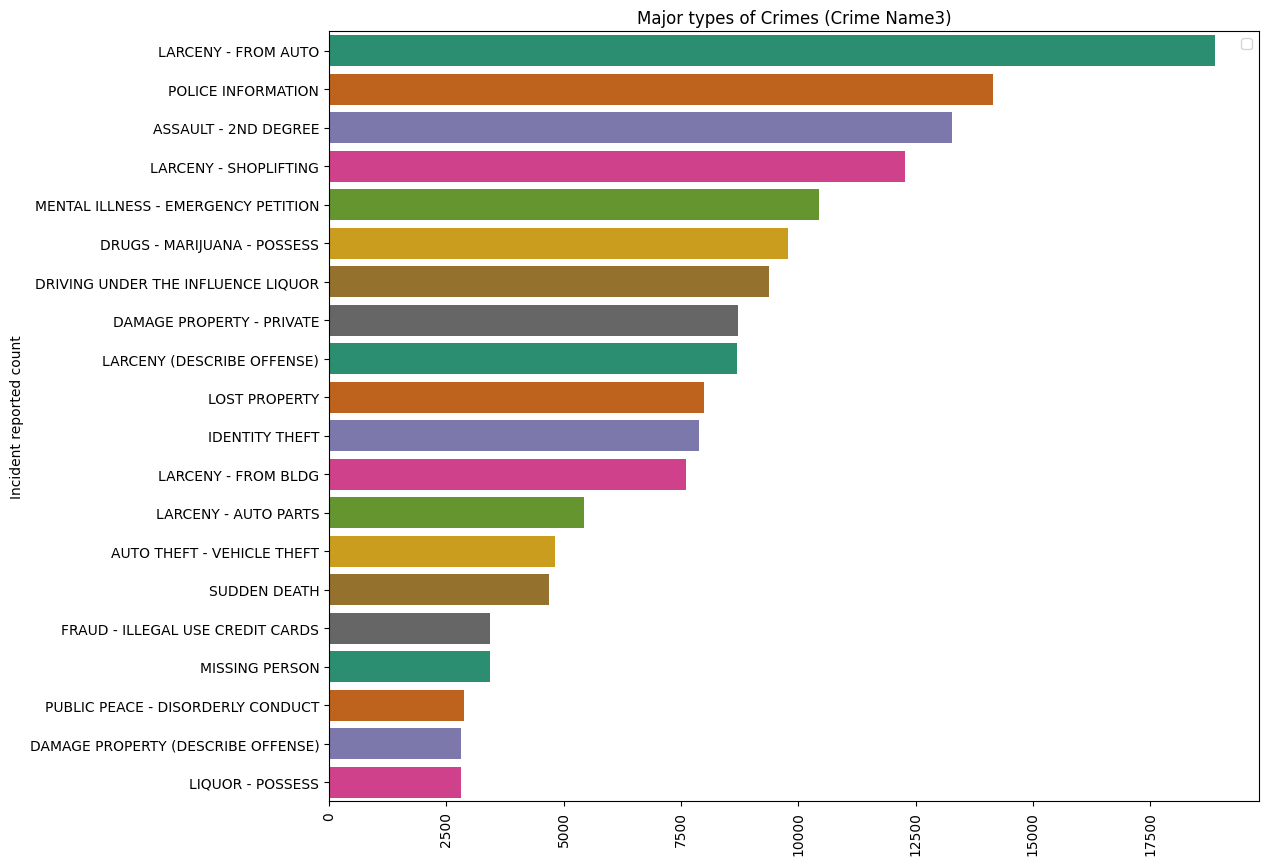

In [ ]:
# plot the type of crime name1 in each year

plt.figure(figsize=(12,10), dpi = 100) #bar
plt.xticks(rotation = 90)
plt.ylabel('Incident reported count')
plt.title("Major types of Crimes (Crime Name3)")
plt.legend()
sns.barplot(x=a.values, y=a.index, data= df, palette='Dark2');
#sns.scatterplot(data=a)%%=%%+%%


#plt.xticks(rotation=90)



INFERENCE:<br>


<ipython-input-144-084a3d5edd47>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly = df.groupby(df['Start_Date_Time'].dt.year)[['Crime Name3', 'Victims']].sum()


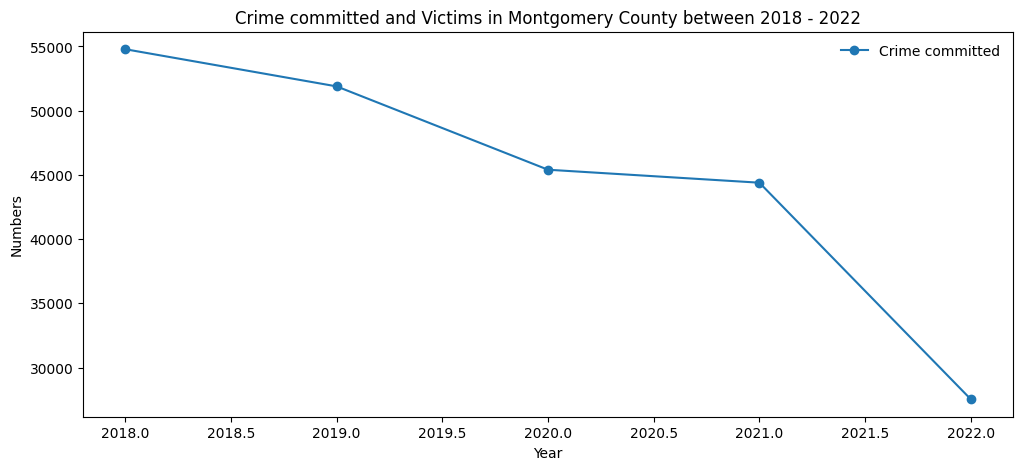

In [ ]:
# crime yearly trend line
# victims yearly trend line

# using a query to get the crime and victims total
yearly = df.groupby(df['Start_Date_Time'].dt.year)[['Crime Name3', 'Victims']].sum()
# plot the figure
yearly.plot(style=['-o', '--o'], figsize=(12, 5))
# set the figure
plt.title('Crime committed and Victims in Montgomery County between 2018 - 2022')
plt.xlabel('Year')
plt.ylabel('Numbers')
plt.legend(['Crime committed', 'Victims'], frameon=False)

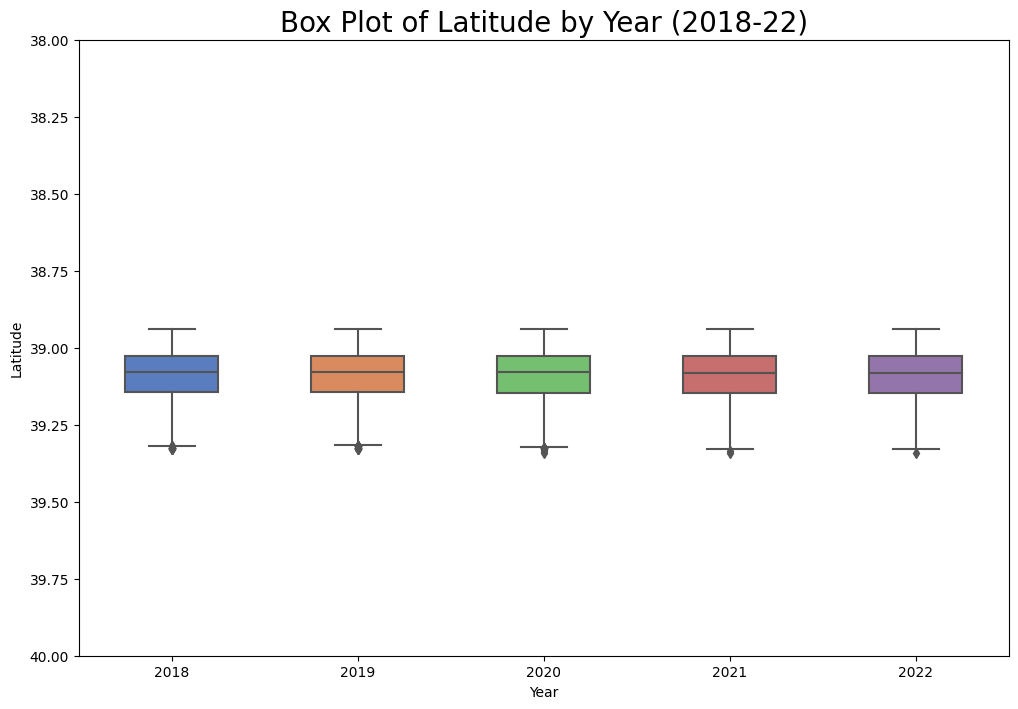

In [ ]:

#bocplot for lat(wip )
plt.figure(figsize=(12, 8))
sns.boxplot(y='Latitude', x='Year', data=df.groupby(['Year', 'Latitude']).size().reset_index(name='Count'),
            palette='muted', width=0.5)

plt.title('Box Plot of Latitude by Year (2018-22)', fontsize=20)
plt.xlabel('Year')
plt.ylim(40,38)
plt.ylabel('Latitude')
plt.show()


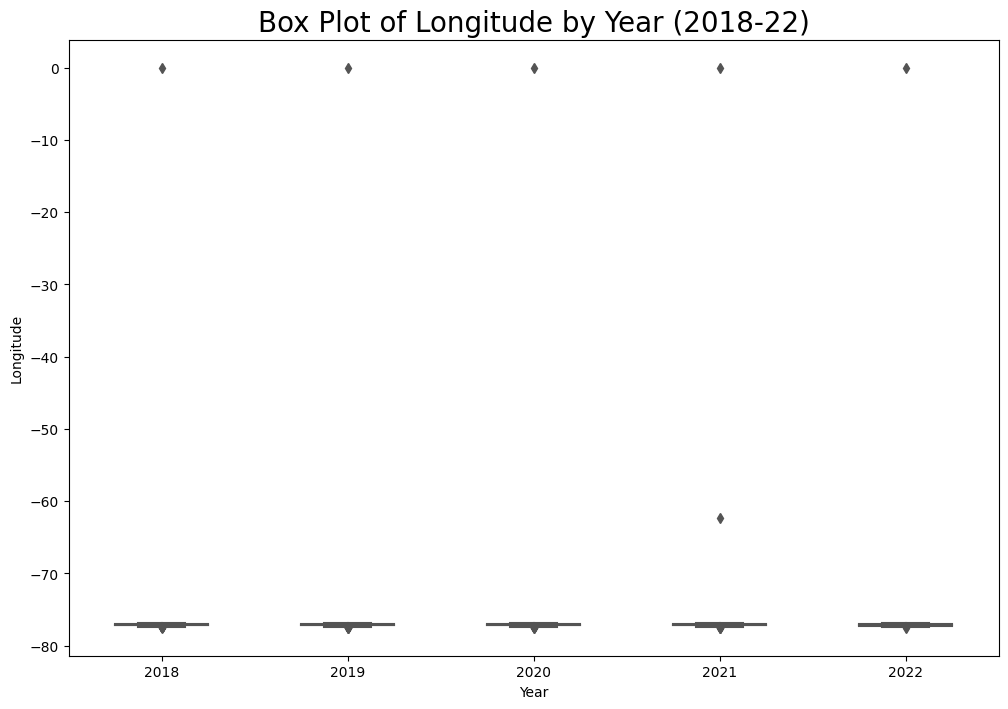

In [ ]:
#boxplot for lat(wip )
plt.figure(figsize=(12, 8))
sns.boxplot(y='Longitude', x='Year', data=df.groupby(['Year', 'Longitude']).size().reset_index(name='Count'),
            palette='muted', width=0.5)

plt.title('Box Plot of Longitude by Year (2018-22)', fontsize=20)
plt.xlabel('Year')
#plt.ylim(40,38)
plt.ylabel('Longitude')
plt.show()


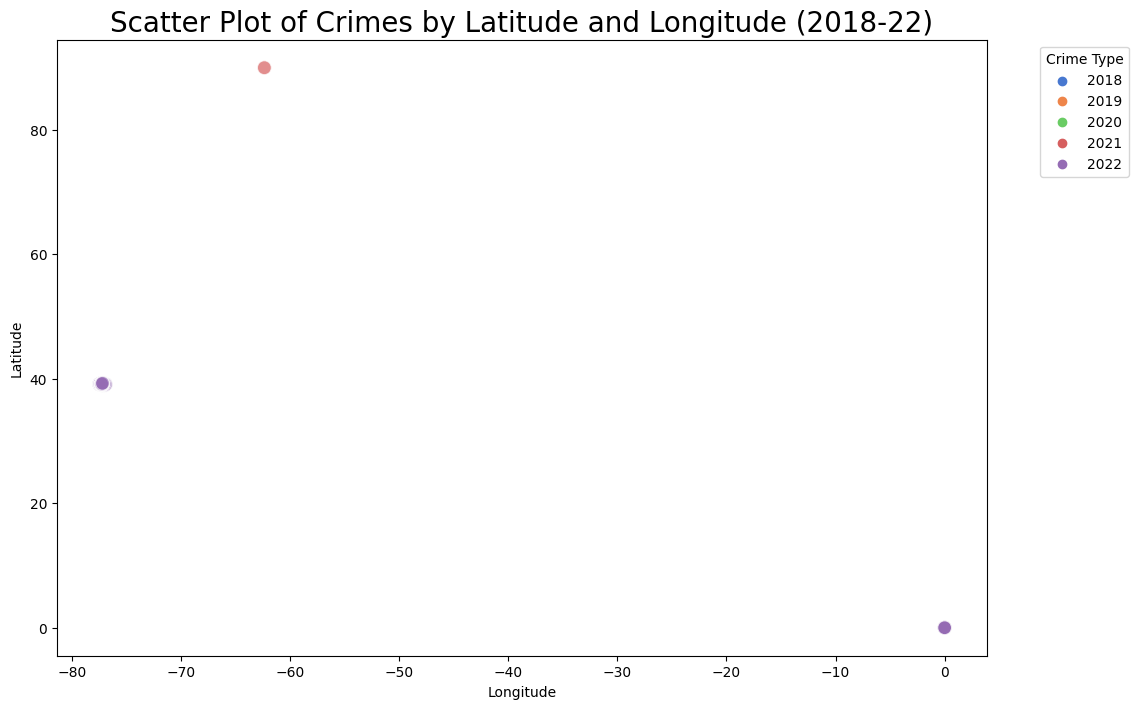

In [ ]:
#scatter for lat(wip )


plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Year', data=df.groupby(['Year', 'Crime Name3', 'Latitude', 'Longitude']).size().reset_index(name='Count'),
                palette='muted', s=100, alpha=0.7)

plt.title('Scatter Plot of Crimes by Latitude and Longitude (2018-22)', fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.ylim(40,36)
#plt.xlim(-76,-80)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218753 entries, 0 to 306092
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Incident ID             218753 non-null  string         
 1   Offence Code            218753 non-null  string         
 2   CR Number               218753 non-null  string         
 3   NIBRS Code              218753 non-null  object         
 4   Victims                 218753 non-null  int64          
 5   Crime Name1             218753 non-null  object         
 6   Crime Name2             218753 non-null  object         
 7   Crime Name3             218753 non-null  object         
 8   Police District Name    218753 non-null  object         
 9   Block Address           197693 non-null  object         
 10  City                    218753 non-null  object         
 11  State                   218753 non-null  object         
 12  Zip Code        

In [ ]:
df['City'].describe()

count            218753
unique               50
top       SILVER SPRING
freq              75253
Name: City, dtype: object

In [ ]:
df['Incident ID'].describe()

count        218753
unique       200675
top       201189600
freq              8
Name: Incident ID, dtype: object

#**PART 2: EDA**
<br>



#1.What are the major crimes and their trend over the period?

##Grouped Lineplot

By visualization COVID influence over the taken time period can be compared

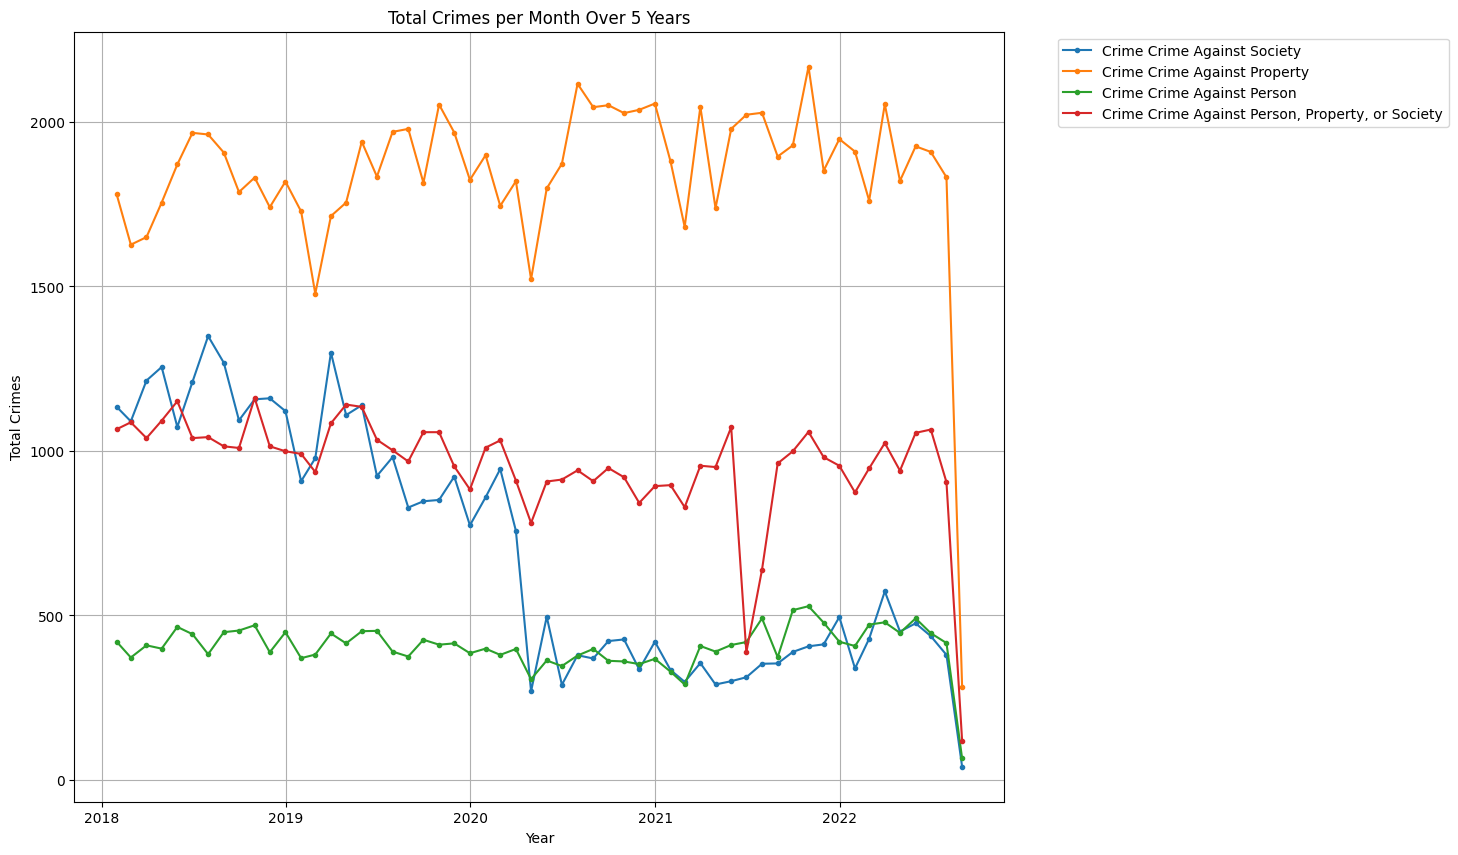

In [ ]:
'''

PREVIOUS CODE
# Convert 'Start_Date_Time' to datetime format
#create a copy
df['Start_Date_Time'] = pd.to_datetime(df['Start_Date_Time'])

# Extract year and month from the 'Start_Date_Time'
df['Year'] = df['Start_Date_Time'].dt.year
df['Month'] = df['Start_Date_Time'].dt.month

# Group by crime type and year to get the count
crime_trend = df.groupby(['Crime Name1', 'Year']).size().reset_index(name='Count')

# Pivot the table for better visualization
pivot_table = crime_trend.pivot(index='Year', columns='Crime Name1', values='Count').fillna(0)

# Plot the trend
plt.figure(figsize=(12, 8))
sns.lineplot(data=pivot_table, marker='o', dashes=False)

plt.title('Crime Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

# Move the legend outside the plot
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set x-axis ticks as integers
plt.xticks(rotation=45, ha='right')
plt.xticks([int(x) for x in plt.xticks()[0]])

plt.tight_layout()  # Ensures the legend does not overlap with the plot
plt.show()
'''

df1 = df.copy()
df1 = df1[['Start_Date_Time', 'Crime Name1', 'Incident ID']].groupby(['Start_Date_Time', 'Crime Name1']).count()
df1.reset_index(level='Crime Name1', inplace=True)
crimes = df['Crime Name1'].unique()
plt.figure(figsize = (12,10))
for crime in crimes:
    crime_data = df1[df1['Crime Name1'] == crime].resample('M').sum(numeric_only=True)
    plt.plot(crime_data.index, crime_data['Incident ID'], marker='o', label=f'Crime {crime}', markersize = 3)

plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.title('Total Crimes per Month Over 5 Years')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

##Grouped BarPlot

This type of visualization allows you to compare the number of incidents for each major crime category in each year more directly.

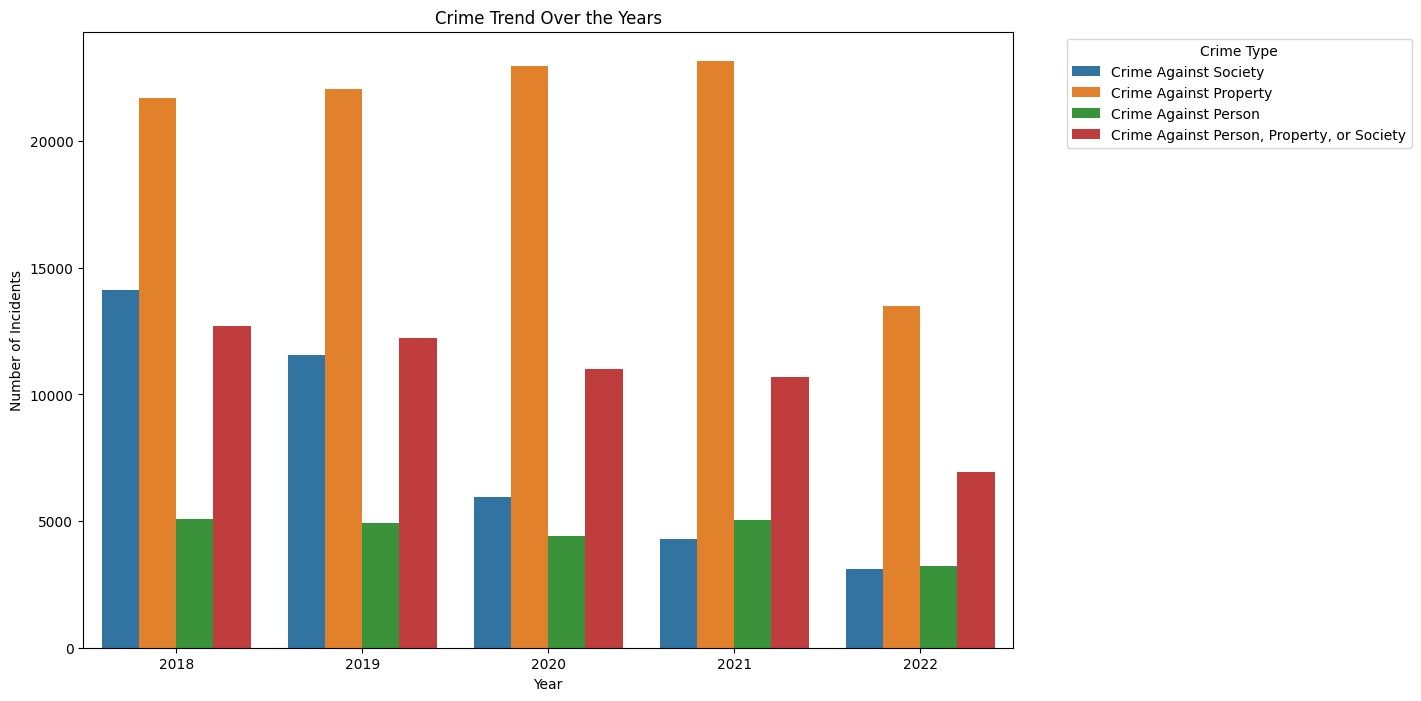

In [ ]:

df['Start_Date_Time'] = pd.to_datetime(df['Start_Date_Time'])

# Extract year from the 'Start_Date_Time'
df['Year'] = df['Start_Date_Time'].dt.year


# Plot the bar plot
plt.figure(figsize=(12, 8))
sns.countplot(x = 'Year',data=df, hue='Crime Name1')
plt.title('Crime Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.show()

#2.How responsive is police in each district?

#Barplot
 The Response_Time is converted to timedelta format, and the average response time is calculated for each city.

Bar plot is suitable as it enables straightforward comparison of average response times across cities, providing a clear and concise representation for easy interpretation and quantitative analysis.

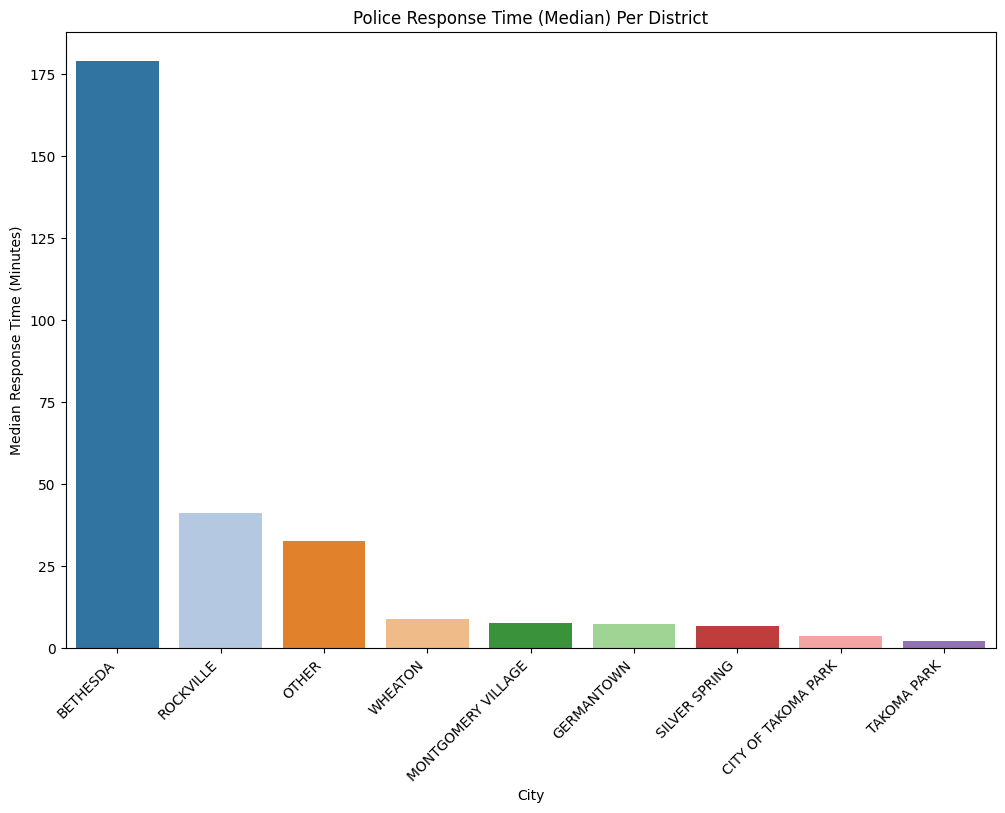

In [ ]:
# Copy the DataFrame
df2 = df.copy()

# Group by city and calculate the median response time
median_response_time = df2.groupby('Police District Name')['Response_Time'].median()

# Convert timedelta to seconds for better readability
median_response_time_seconds = median_response_time.dt.total_seconds()

# Sort the data in descending order by median response time
median_response_time_sorted = median_response_time_seconds.sort_values(ascending=False)

# Plot the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=median_response_time_sorted.index, y=median_response_time_sorted.values/60, palette='tab20')
plt.title('Police Response Time (Median) Per District')
plt.xlabel('City')
plt.ylabel('Median Response Time (Minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
df['Response_TimeDelta'] = pd.to_timedelta(df['Response_Time'])

Boxplot

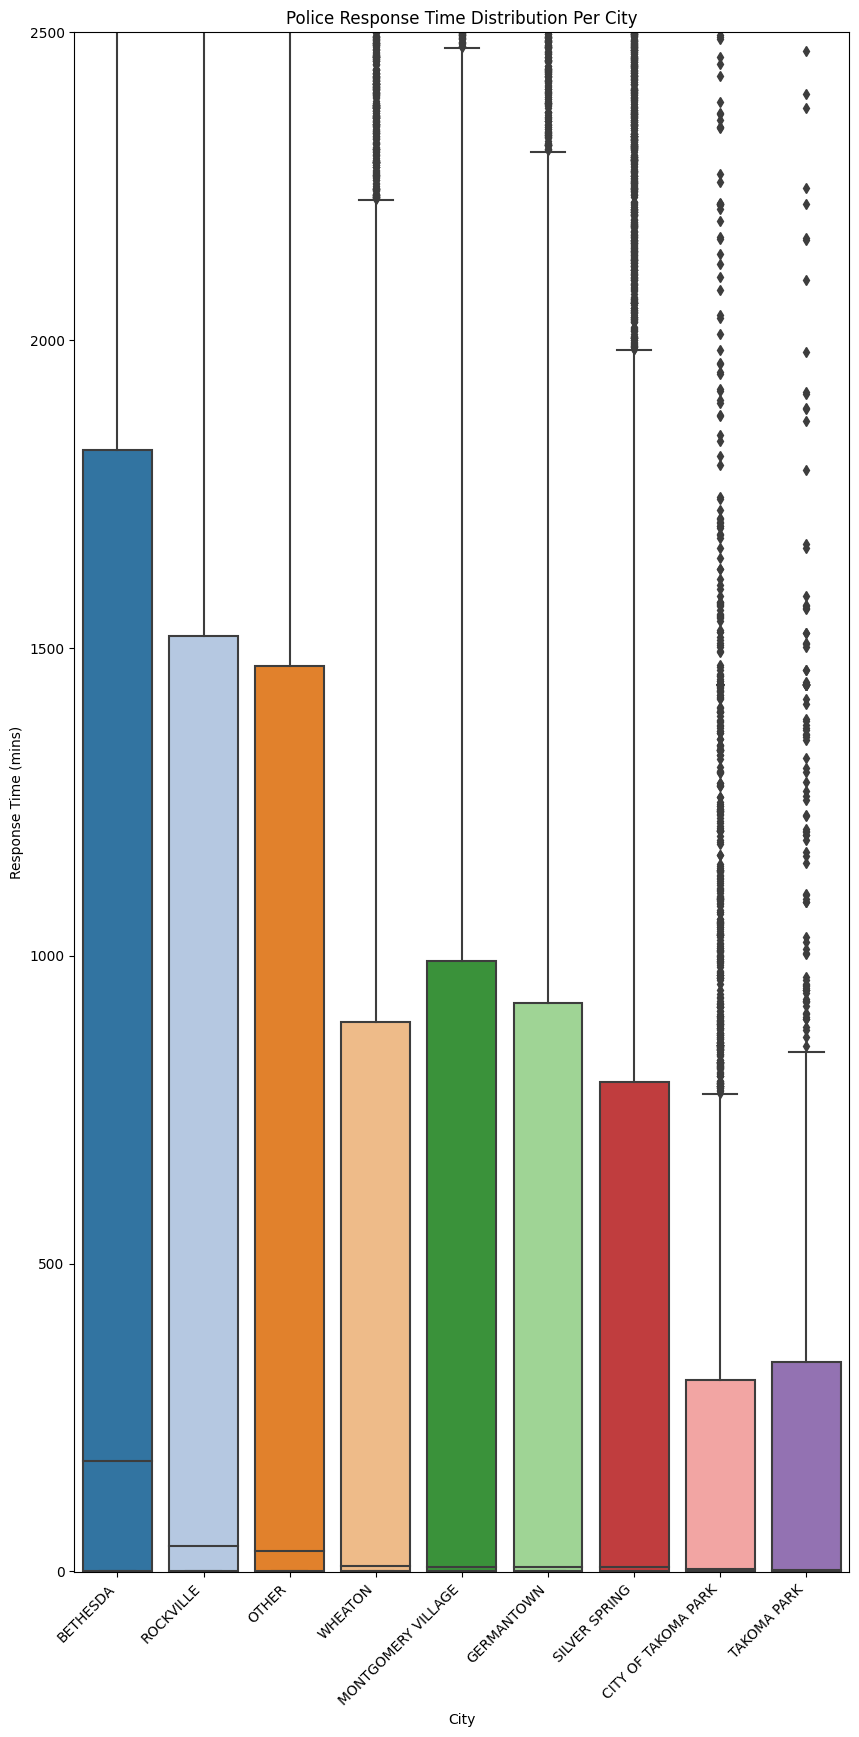

In [ ]:
# Copy the DataFrame
df2 = df.copy()

# Calculate median response time per city
median_response_time = df2.groupby('Police District Name')['Response_TimeDelta'].median()

# Convert timedelta to seconds for better readability
median_response_time_seconds = median_response_time.dt.total_seconds()

# Sort the data in ascending order by median response time
median_response_time_sorted = median_response_time_seconds.sort_values(ascending=False)

# Plot the box plot with sorted cities
plt.figure(figsize=(10, 20))
sns.boxplot(x='Police District Name', y=df2['Response_TimeDelta'].dt.total_seconds()/60,
            data=df2, order=median_response_time_sorted.index, palette='tab20')
plt.title('Police Response Time Distribution Per City')
plt.xlabel('City')
plt.ylabel('Response Time (mins)')

# Set a custom y-axis limit to better visualize the distribution
plt.ylim(-1, 2500)  # Adjust the upper limit as needed

plt.xticks(rotation=45, ha='right')
plt.show()



---
Q3. Which district requires more police attention based on crime rates?


---





<ipython-input-156-82c7e2e32681>:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='horizontal')


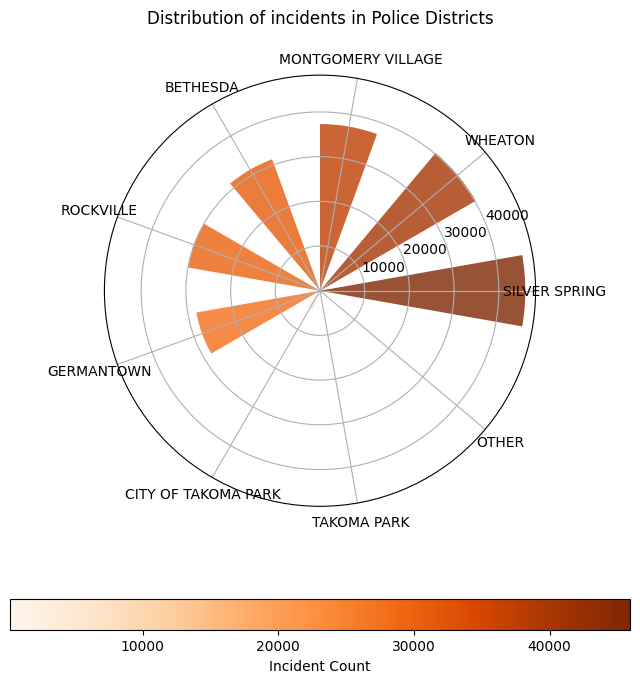

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df_police=df.copy()
# Assuming you have district_counts DataFrame
district_counts = df_police['Police District Name'].value_counts().reset_index()
district_counts.columns = ['Police District Name', 'Incident Count']

# Normalize the Incident Count values for coloring
norm = plt.Normalize(district_counts['Incident Count'].min(), district_counts['Incident Count'].max())
colors = plt.cm.Oranges(norm(district_counts['Incident Count']))

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot the radial bar chart with custom colors
theta = np.linspace(0.0, 2 * np.pi, len(district_counts), endpoint=False)
width = np.pi / len(district_counts)

bars = ax.bar(theta, district_counts['Incident Count'], width=width, align="center", alpha=0.8, color=colors)

# Adding labels
ax.set_xticks(theta)
ax.set_xticklabels(district_counts['Police District Name'])

# Adding a colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.Oranges, norm=norm)
sm.set_array([])  # You need to set a dummy array for the scalar mappable
cbar = plt.colorbar(sm, orientation='horizontal')
cbar.set_label('Incident Count')

plt.title('Distribution of incidents in Police Districts\n')
plt.show()


In [ ]:
df9=df.copy()
df_district = df9[(df9['Longitude']!=0.0) | (df9['Latitude']!=0.0)]


In [ ]:
df_district[['Longitude','Incident ID']].sort_values(by='Longitude'  ,ascending = False)

Longitude Incident ID
304740 -62.372081   201320282
269553 -76.905354   201273527
24920  -76.908100   201369232
50308  -76.909000   201367790
7364   -76.909000   201367792
...           ...         ...
240724 -77.516753   201245295
203713 -77.516753   201191193
185807 -77.516753   201173095
241357 -77.516753   201240129
83102  -77.516753   201221324

[211783 rows x 2 columns]

In [ ]:
df_district = df_district.drop(df_district[df_district['Incident ID'] == '201320282'].index)


In [ ]:
df_district.columns

Index(['Incident ID', 'Offence Code', 'CR Number', 'NIBRS Code', 'Victims',
       'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name',
       'Block Address', 'City', 'State', 'Zip Code', 'Place', 'Sector', 'Beat',
       'Address Number', 'Street Name', 'Street Type', 'Start_Date_Time',
       'Latitude', 'Longitude', 'Police District Number', 'Dispatch_Date_Time',
       'Response_Time', 'Year', 'Response_TimeDelta'],
      dtype='object')

In [ ]:
df_district.shape

(211782, 27)

In [ ]:
df_district['Latitude'].value_counts()

39.037367    1579
39.198413    1195
39.022084     752
39.150670     640
39.111781     639
             ... 
39.074280       1
39.050893       1
39.079170       1
38.995465       1
39.122271       1
Name: Latitude, Length: 40288, dtype: int64

In [ ]:
df_district[['Longitude','Latitude']]


Longitude   Latitude
0      -77.265619  39.177744
3      -77.218189  39.147954
4      -77.096561  38.966174
5      -77.096561  38.966174
12     -77.156818  39.083781
...           ...        ...
306055 -77.272630  39.232387
306058 -77.076945  39.156299
306084 -77.201179  39.100237
306086 -77.097909  39.122271
306092 -77.022915  38.985813

[211782 rows x 2 columns]

In [ ]:
df_district['Longitude'].value_counts()

-77.051662    1579
-77.244946    1195
-77.147416     752
-77.204063     640
-77.235281     639
              ... 
-77.219297       1
-77.043235       1
-77.174809       1
-77.146193       1
-77.097909       1
Name: Longitude, Length: 35665, dtype: int64

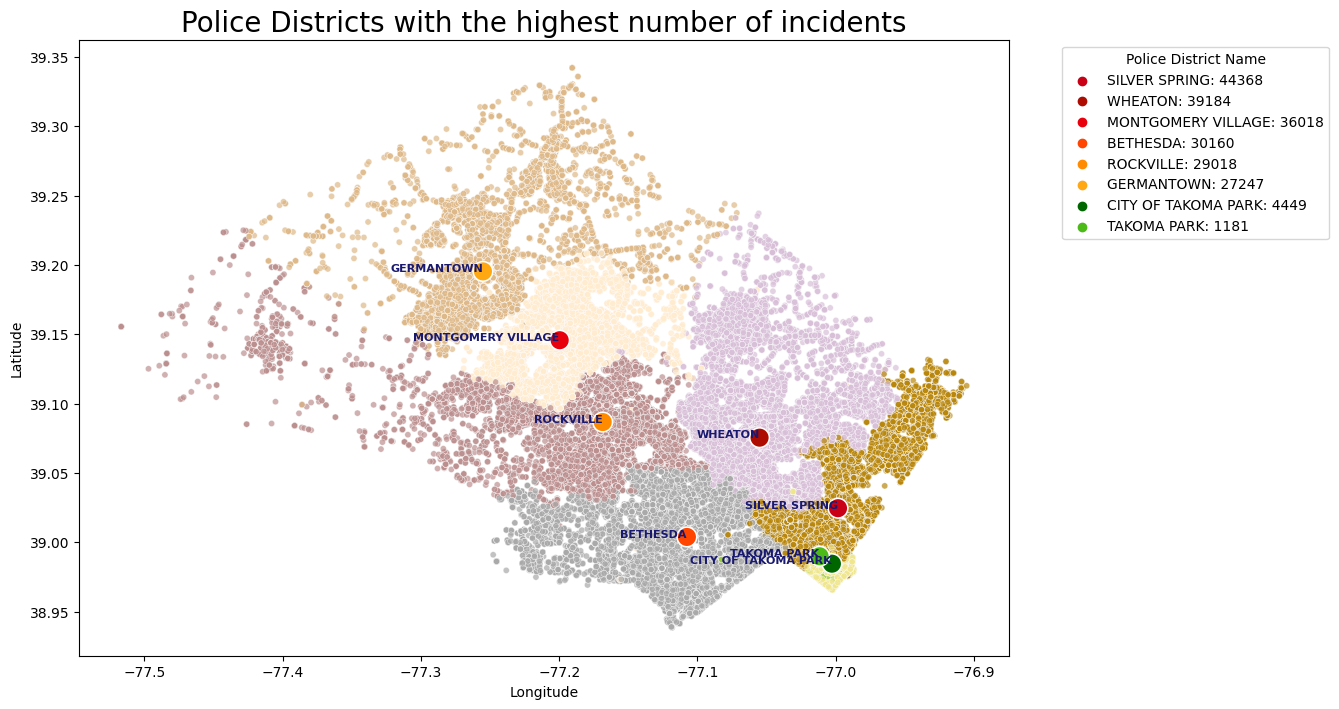

In [ ]:

# Filter the DataFrame based on the specified range
latitude_range = (0, 40)
longitude_range = (-79, -75)

filtered_df = df_district[(df_district['Latitude'].between(*latitude_range)) & (df_district['Longitude'].between(*longitude_range))]

new_df = filtered_df[filtered_df['Police District Name'] != 'OTHER']
# Calculate count and average of Latitude and Longitude for each Police District Name
district_stats = new_df.groupby('Police District Name').agg(
    IncidentCount=('Incident ID', 'count'),
    AvgLatitude=('Latitude', 'mean'),
    AvgLongitude=('Longitude', 'mean')
).reset_index()

district_stats = district_stats.sort_values(by='IncidentCount', ascending=False)


palette = ["#DEB887","#FFEBCD","#A9A9A9","#BC8F8F","#B8860B", "#D8BFD8", "#F0E68C","#9ACD32"]

palette_label=["#c90016", "#ae0c00","#e8000d","#ff4500","#ff8c00","#ffa812","#006600","#4CBB17"]
plt.figure(figsize=(12, 8))

# Plot all points without labels
sns.scatterplot(x='Longitude', y='Latitude', hue='Police District Name',palette=palette, data=new_df, s=20, alpha=0.7,legend=False)

# Plot points with the highest incident counts
scatter = sns.scatterplot(x='AvgLongitude', y='AvgLatitude', hue='Police District Name', data=district_stats, palette=palette_label, s=200, alpha=1, marker='o', legend=True)

# Annotate the points with the highest incident counts
for i, row in district_stats.iterrows():
    plt.text(row['AvgLongitude'], row['AvgLatitude'], f"{row['Police District Name']}", fontsize=8, color='midnightblue', weight='bold', ha='right', va='baseline')

# Adjust the legend to show only color and police district name
handles, labels = scatter.get_legend_handles_labels()
legend_labels = [f"{label}: {count}" for label, count in zip(labels, district_stats['IncidentCount'])]
plt.legend(title='Police District Name', bbox_to_anchor=(1.05, 1), loc='upper left', handles=handles, labels=legend_labels)

plt.title('Police Districts with the highest number of incidents', fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
district_stats

Police District Name  IncidentCount  AvgLatitude  AvgLongitude
5        SILVER SPRING          44368    39.024577    -76.998366
7              WHEATON          39184    39.075427    -77.055093
3   MONTGOMERY VILLAGE          36018    39.145689    -77.199641
0             BETHESDA          30160    39.003854    -77.107636
4            ROCKVILLE          29018    39.086680    -77.168532
2           GERMANTOWN          27247    39.195296    -77.255131
1  CITY OF TAKOMA PARK           4449    38.984580    -77.002780
6          TAKOMA PARK           1181    38.989919    -77.011686



---
Q4. Which are 'Place' that are hot spots of crimes?


---





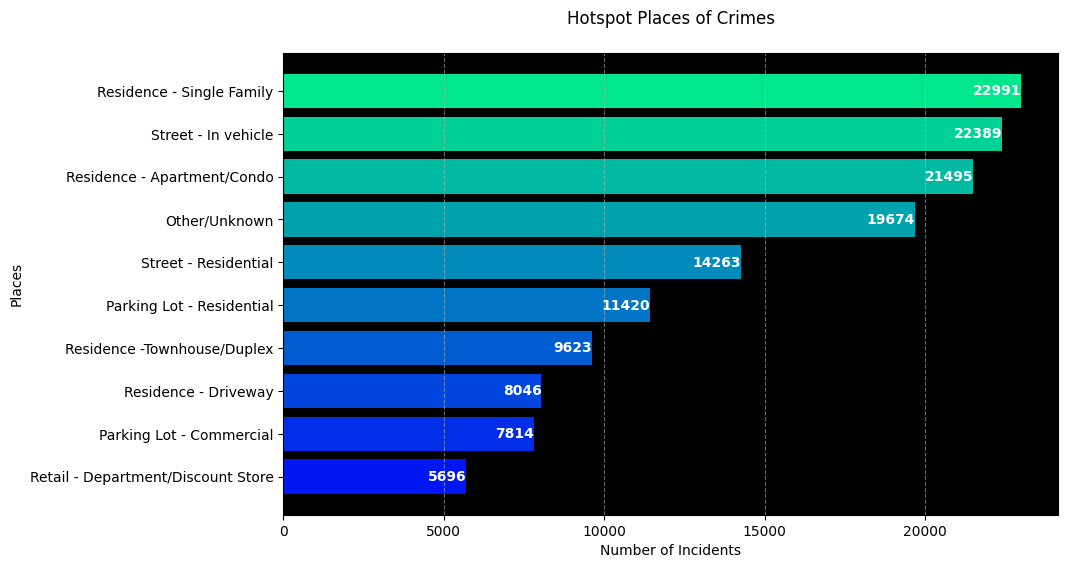

In [ ]:
df_hotspot = df.copy()


places_counts = df_hotspot['Place'].value_counts().reset_index()
places_counts.columns = ['Places', 'Incident_Count']

# Sort the DataFrame by 'Incident_Count' in descending order
places_counts_sorted = places_counts.sort_values(by='Incident_Count', ascending=True)  # Changed to ascending=True

# Select the top 10 rows
top_10_places = places_counts_sorted.tail(10)  # Changed to tail(10)

# Set up a seaborn color palette for the colormap
palette = sns.color_palette("winter", len(top_10_places))

plt.figure(figsize=(10, 6))  # Use plt.figure to create a single figure

# Set background color
plt.gca().set_facecolor('black')  # Use plt.gca() to get the current Axes instance

# Create horizontal bar chart with varying colors
bars = plt.barh(top_10_places['Places'], top_10_places['Incident_Count'], color=palette)

# Add data values on top of the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}',
             va='center', ha='right', color='white', weight='bold', fontsize=10)

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Set labels and title
plt.xlabel('Number of Incidents')
plt.ylabel('Places')
plt.title('Hotspot Places of Crimes\n')

# Show the plot
plt.show()

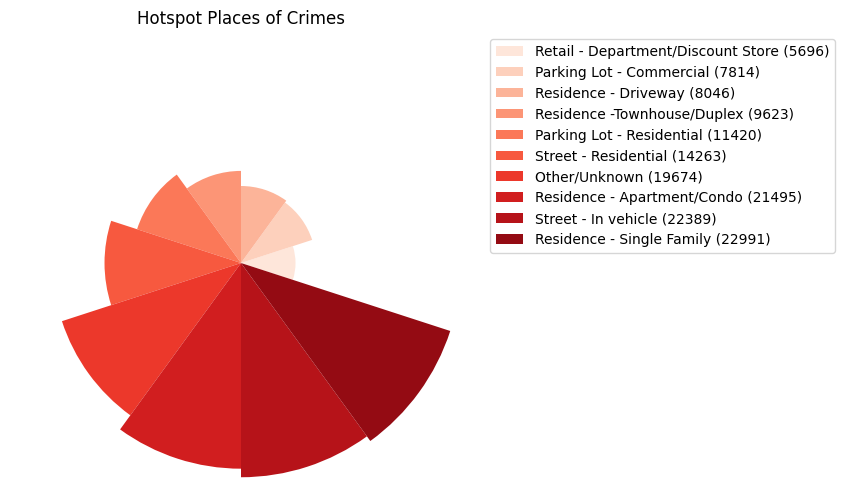

In [ ]:


places_counts = df_hotspot['Place'].value_counts().reset_index()
places_counts.columns = ['Places', 'Incident_Count']

# Sort the DataFrame by 'Incident_Count' in descending order
places_counts_sorted = places_counts.sort_values(by='Incident_Count', ascending=True)  # Changed to ascending=True

# Select the top 10 rows
top_10_places = places_counts_sorted.tail(10)  # Changed to tail(10)

# Set up a seaborn color palette for the colormap
palette = sns.color_palette("Reds", len(top_10_places))

# Plotting code
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

# Create Nightingale chart with varying colors
theta = np.linspace(0, 2*np.pi, len(top_10_places), endpoint=False)
width = 2*np.pi / len(top_10_places)  # Width of each sector

bars = ax.bar(theta, top_10_places['Incident_Count'], width=width, color=palette)

# Hide grid lines for drawing angles
ax.xaxis.grid(False)

# Hide circular border
ax.spines['polar'].set_visible(False)

# Hide radial axis labels and ticks
ax.set_xticklabels([])
ax.set_xticks([])

# Hide radial grid lines
ax.set_yticklabels([])
ax.set_yticks([])

# Set labels and title
plt.title('Hotspot Places of Crimes')

# Create a legend for places
legend_labels = [f"{place} ({incident_count})" for place, incident_count in zip(top_10_places['Places'], top_10_places['Incident_Count'])]
ax.legend(bars, legend_labels, loc='upper right', bbox_to_anchor=(1.8, 1))

# Show the plot
plt.show()





---


***Q5.What are the major drug cases in different 'Place' in different cities?***

---

Steps:
1. Find the list of drug related crimes.
2. Find the top 10 type of drug crimes.
3. Find the top 10 cities with the above type of drug crimes.
4. Find the "Places" in the above cities with major drug crimes.

In [ ]:
drug_crimes_lst = [col for col in df['Crime Name3'].unique() if 'DRUG' in col]
drug_crimes_lst


#create a mini df with drug entres
df_drugs = df["Crime Name3"].isin(drug_crimes_lst)
df_d = df[df_drugs]

#df_d['Incident ID'] = df_d['Incident ID'].astype('int64')

In [ ]:
drug_crimes = df_d.groupby(['Place', 'Crime Name3']).size().reset_index(name='Incident Count')

drug_crimes = df_d.groupby(['Place', 'Crime Name3'])['Incident ID'].nunique().reset_index(name='Incident Count')

top_places_overall = drug_crimes.groupby('Place')['Incident Count'].sum().nlargest(10).index

filtered_drug_crimes = pd.DataFrame()

for place in top_places_overall:
    top_crimes_for_place = drug_crimes[drug_crimes['Place'] == place].nlargest(5, 'Incident Count')
    filtered_drug_crimes= pd.concat([filtered_drug_crimes, top_crimes_for_place])




In [ ]:
filtered_drug_crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 670 to 474
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Place           50 non-null     object
 1   Crime Name3     50 non-null     object
 2   Incident Count  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


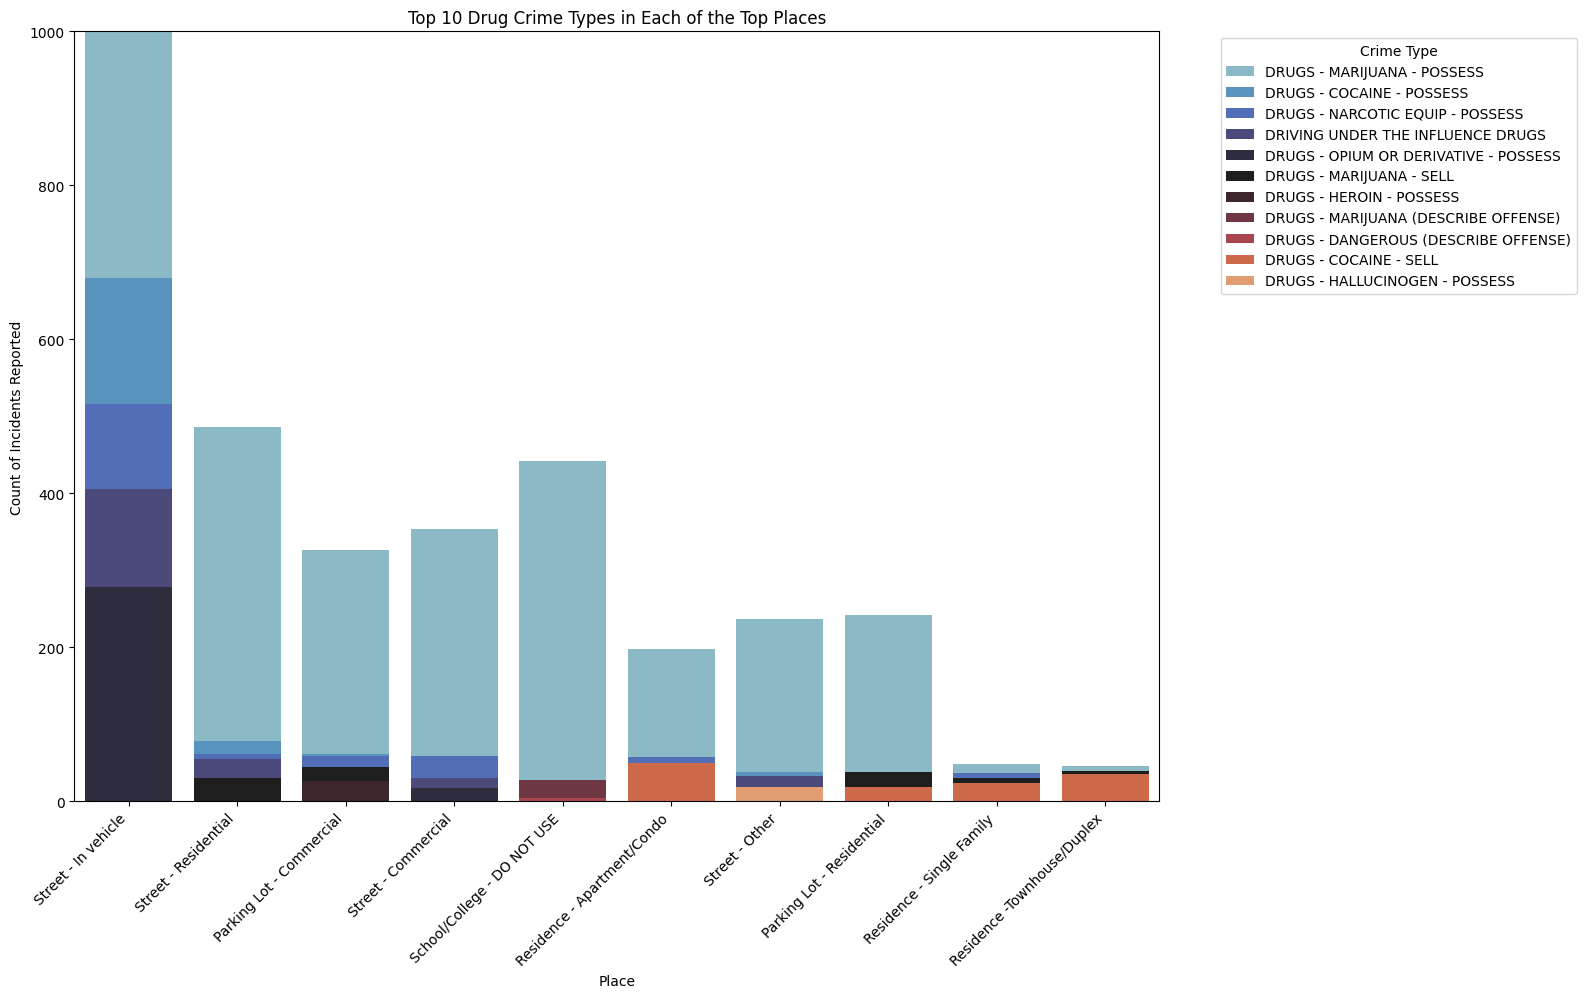

In [ ]:
plt.figure(figsize=(14, 10))

# Use barplot with dodge=False to create a diverging bar chart
sns.barplot(x='Place', y='Incident Count', hue='Crime Name3', data=filtered_drug_crimes, palette='icefire', dodge=False)

plt.title(f'Top 10 Drug Crime Types in Each of the Top Places')
plt.xlabel('Place')
plt.ylabel('Count of Incidents Reported')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0,1000)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
import plotly.express as px

# Assuming 'filtered_drug_crimes' contains the necessary data
plt.figure(figsize=(18, 14))
fig = px.treemap(filtered_drug_crimes,
                 path=['Place', 'Crime Name3'],
                 values='Incident Count',
                 color='Incident Count',
                 color_continuous_scale='viridis',  # Replace with a valid color scale
                 title='Top 10 Drug Crime Types in Each of the Top Places',
                 custom_data=['Incident Count'])  #err in printing value directly without hovering

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40),
                  xaxis=dict(tickangle=-45),
                  legend=dict(title='Crime Type', x=1, y=1, traceorder='normal'))

fig.show()


<Figure size 1800x1400 with 0 Axes>




---


Q6. How did the reforms and programs for the rising issue of illegal weapons in 2020 affect the crime rates related to weapon?




---



In [ ]:
crimes_lst_weapon = [col for col in df['Crime Name3'].unique() if 'WEAPON -' in col]
crimes_lst_weapon

['WEAPON - FIRING',
 'WEAPON - CONCEALED',
 'WEAPON - POSSESSION',
 'WEAPON - EXPLOSIVES - POSSESSING',
 'WEAPON - THREAT TO BOMB',
 'WEAPON - INCENDIARY DEVICE - USING',
 'WEAPON - INCENDIARY DEVICE - POSSESS',
 'WEAPON - EXPLOSIVES - USING',
 'WEAPON - THREAT TO BURN',
 'WEAPON - SELLING',
 'WEAPON - EXPLOSIVES - TRANSPORTING',
 'WEAPON - ALTERING IDENTIFICATION ON']

In [ ]:
#create a mini df with weapon entres
df_weapon = df["Crime Name3"].isin(crimes_lst_weapon)
df1 = df[df_weapon]
df1.head(10)

Incident ID Offence Code  CR Number NIBRS Code  Victims  \
34     201285345         5213  200016501        520        1   
237    201237403         5202  190019615        520        1   
327    201326772         5213  210013327        520        1   
334    201327289         5213  210013980        520        1   
369    201327203         5213  210013861        520        1   
490    201331130         5202  210018496        520        1   
536    201331154         5213  210018668        520        1   
833    201332787         5213  210020540        520        1   
863    201337618         5213  210026555        520        1   
1175   201343651         5213  210034084        520        1   

                Crime Name1            Crime Name2         Crime Name3  \
34    Crime Against Society  Weapon Law Violations     WEAPON - FIRING   
237   Crime Against Society  Weapon Law Violations  WEAPON - CONCEALED   
327   Crime Against Society  Weapon Law Violations     WEAPON - FIRING   
334   Crime Against Society  Weapon Law Violations     WEAPON - FIRING   
369   Crime Against Society  Weapon Law Violations     WEAPON - FIRING   
490   Crime Against Society  Weapon Law Violations  WEAPON - CONCEALED   
536   Crime Against Society  Weapon Law Violations     WEAPON - FIRING   
833   Crime Against Society  Weapon Law Violations     WEAPON - FIRING   
863   Crime Against Society  Weapon Law Violations     WEAPON - FIRING   
1175  Crime Against Society  Weapon Law Violations     WEAPON - FIRING   

     Police District Name            Block Address  ...  Street Name  \
34          SILVER SPRING    13900 BLK  CASTLE BLV  ...       CASTLE   
237               WHEATON  14100 BLK  GRAND PRE RD  ...    GRAND PRE   
327               WHEATON      4300 BLK  ROBERT CT  ...       ROBERT   
334    MONTGOMERY VILLAGE     300 BLK N SUMMIT AVE  ...       SUMMIT   
369         SILVER SPRING                      NaN  ...  ASTON MANOR   
490             ROCKVILLE     100 BLK  ESWORTHY PL  ...     ESWORTHY   
536         SILVER SPRING                      NaN  ...         WEST   
833               WHEATON    4200 BLK  IVY GLEN RD  ...     IVY GLEN   
863    MONTGOMERY VILLAGE      8600 BLK  KELSO TER  ...        KELSO   
1175              WHEATON   12300 BLK  DALEWOOD DR  ...     DALEWOOD   

     Street Type     Start_Date_Time   Latitude  Longitude  \
34           BLV 2020-04-20 00:03:00  39.084290 -76.941400   
237           RD 2019-04-26 16:28:00  39.086867 -77.073922   
327           CT 2021-04-09 21:15:00  39.058954 -77.086007   
334          AVE 2021-04-14 15:19:00  39.145812 -77.192526   
369           DR 2021-04-13 21:18:00  39.077265 -76.938460   
490           PL 2021-05-16 23:07:00  39.064600 -77.281795   
536          HWY 2021-05-18 00:10:00  38.993583 -77.032308   
833           RD 2021-05-30 22:55:00  39.045461 -77.081889   
863          TER 2021-07-10 15:08:00  39.154300 -77.175691   
1175          DR 2021-08-31 18:32:00  39.057350 -77.069700   

     Police District Number  Dispatch_Date_Time   Response_Time  Year  \
34                       3D 2020-04-20 00:03:11 0 days 00:00:11  2020   
237                      4D 2019-04-26 16:28:26 0 days 00:00:26  2019   
327                      4D 2021-04-09 21:15:49 0 days 00:00:49  2021   
334                      6D 2021-04-14 15:19:06 0 days 00:00:06  2021   
369                      3D 2021-04-13 21:18:28 0 days 00:00:28  2021   
490                      1D 2021-05-16 23:07:06 0 days 00:00:06  2021   
536                      3D 2021-05-18 00:10:34 0 days 00:00:34  2021   
833                      4D 2021-05-30 22:55:40 0 days 00:00:40  2021   
863                      6D 2021-07-10 15:08:15 0 days 00:00:15  2021   
1175                     4D 2021-08-31 18:32:37 0 days 00:00:37  2021   

     Response_TimeDelta  
34      0 days 00:00:11  
237     0 days 00:00:26  
327     0 days 00:00:49  
334     0 days 00:00:06  
369     0 days 00:00:28  
490     0 days 00:00:06  
536     0 days 00:00:34

In [ ]:
df1['month']=df1['Start_Date_Time'].dt.month
df1['Year']=df1['Start_Date_Time'].dt.year

As there are outliers in code where some latitude and longitudes are (0,0) and consist of 3.5% of the data. Hence, they are removed from the data frame.

In [ ]:
df2 = df1[(df1['Longitude']!=0.0) | (df1['Latitude']!=0.0)]

#df1['Longitude'].sort_values(ascending = False).head(20)

df_before = df2[(df2['Year']<2020)]
df_after = df2[(df2['Year']>=2020)]

df_after["Year"].unique()
df_before["Year"].unique()

array([2019, 2018])

In [ ]:
df_before[df_before["Crime Name3"]=="WEAPON - POSSESSION"]

Incident ID Offence Code  CR Number NIBRS Code  Victims  \
9478     201263578         5212  190052863        520        1   
9989     201222981         5212  190002221        520        1   
16460    201263513         5212  190052865        520        1   
16625    201183042         5212  180017514        520        1   
21836    201265697         5212  190055392        520        1   
...            ...          ...        ...        ...      ...   
245525   201237726         5212  190020479        520        1   
245531   201243614         5212  190026895        520        1   
246782   201252482         5212  190038754        520        1   
254339   201255552         5212  190042679        520        1   
271263   201273416         5212  190061163        520        1   

                  Crime Name1            Crime Name2          Crime Name3  \
9478    Crime Against Society  Weapon Law Violations  WEAPON - POSSESSION   
9989    Crime Against Society  Weapon Law Violations  WEAPON - POSSESSION   
16460   Crime Against Society  Weapon Law Violations  WEAPON - POSSESSION   
16625   Crime Against Society  Weapon Law Violations  WEAPON - POSSESSION   
21836   Crime Against Society  Weapon Law Violations  WEAPON - POSSESSION   
...                       ...                    ...                  ...   
245525  Crime Against Society  Weapon Law Violations  WEAPON - POSSESSION   
245531  Crime Against Society  Weapon Law Violations  WEAPON - POSSESSION   
246782  Crime Against Society  Weapon Law Violations  WEAPON - POSSESSION   
254339  Crime Against Society  Weapon Law Violations  WEAPON - POSSESSION   
271263  Crime Against Society  Weapon Law Violations  WEAPON - POSSESSION   

       Police District Name                Block Address  ... Street Type  \
9478             GERMANTOWN          27100 BLK  RIDGE RD  ...          RD   
9989     MONTGOMERY VILLAGE         1  BLK  HIGHLAND AVE  ...         AVE   
16460         SILVER SPRING          1000 BLK  SPRING ST  ...          ST   
16625    MONTGOMERY VILLAGE                          NaN  ...          RD   
21836         SILVER SPRING                          NaN  ...         AVE   
...                     ...                          ...  ...         ...   
245525        SILVER SPRING    8700 BLK  PINEY BRANCH RD  ...          RD   
245531        SILVER SPRING                          NaN  ...         AVE   
246782        SILVER SPRING         1300 BLK  FENWICK LA  ...          LA   
254339   MONTGOMERY VILLAGE  9900 BLK  MEDICAL CENTER DR  ...          DR   
271263   MONTGOMERY VILLAGE                          NaN  ...         AVE   

           Start_Date_Time   Latitude  Longitude Police District Number  \
9478   2019-11-02 23:13:00  39.300070 -77.199607                     5D   
9989   2019-01-15 07:24:00  39.146615 -77.200079                     6D   
16460  2019-11-02 22:56:00  38.999017 -77.026243                     3D   
16625  2018-04-10 22:10:00  39.159982 -77.216138                     6D   
21836  2019-11-16 21:52:00  39.015335 -76.977869                     3D   
...                    ...        ...        ...                    ...   
245525 2019-05-01 17:04:22  38.998869 -76.998236                     3D   
245531 2019-06-05 15:39:29  39.015335 -76.977869                     3D   
246782 2019-08-14 05:06:51  38.998266 -77.030667                     3D   
254339 2019-09-05 22:51:11  39.096616 -77.199322                     6D   
271263 2019-12-19 15:50:36  39.147128 -77.198546                     6D   

        Dispatch_Date_Time   Response_Time  Year Response_TimeDelta month  
9478                   NaT 0 days 00:00:51  2019    0 days 00:00:51    11  
9989   2019-01-15 07:24:13 0 days 00:00:13  2019    0 days 00:00:13     1  
16460                  NaT 0 days 00:00:51  2019    0 days 00:00:51    11  
16625  2018-04-10 22:15:24 0 days 00:05:24  2018    0 days 00:05:24     4  
21836                  NaT 0 days 00:00:51  2019    0 days 00:00:51    11  
...    

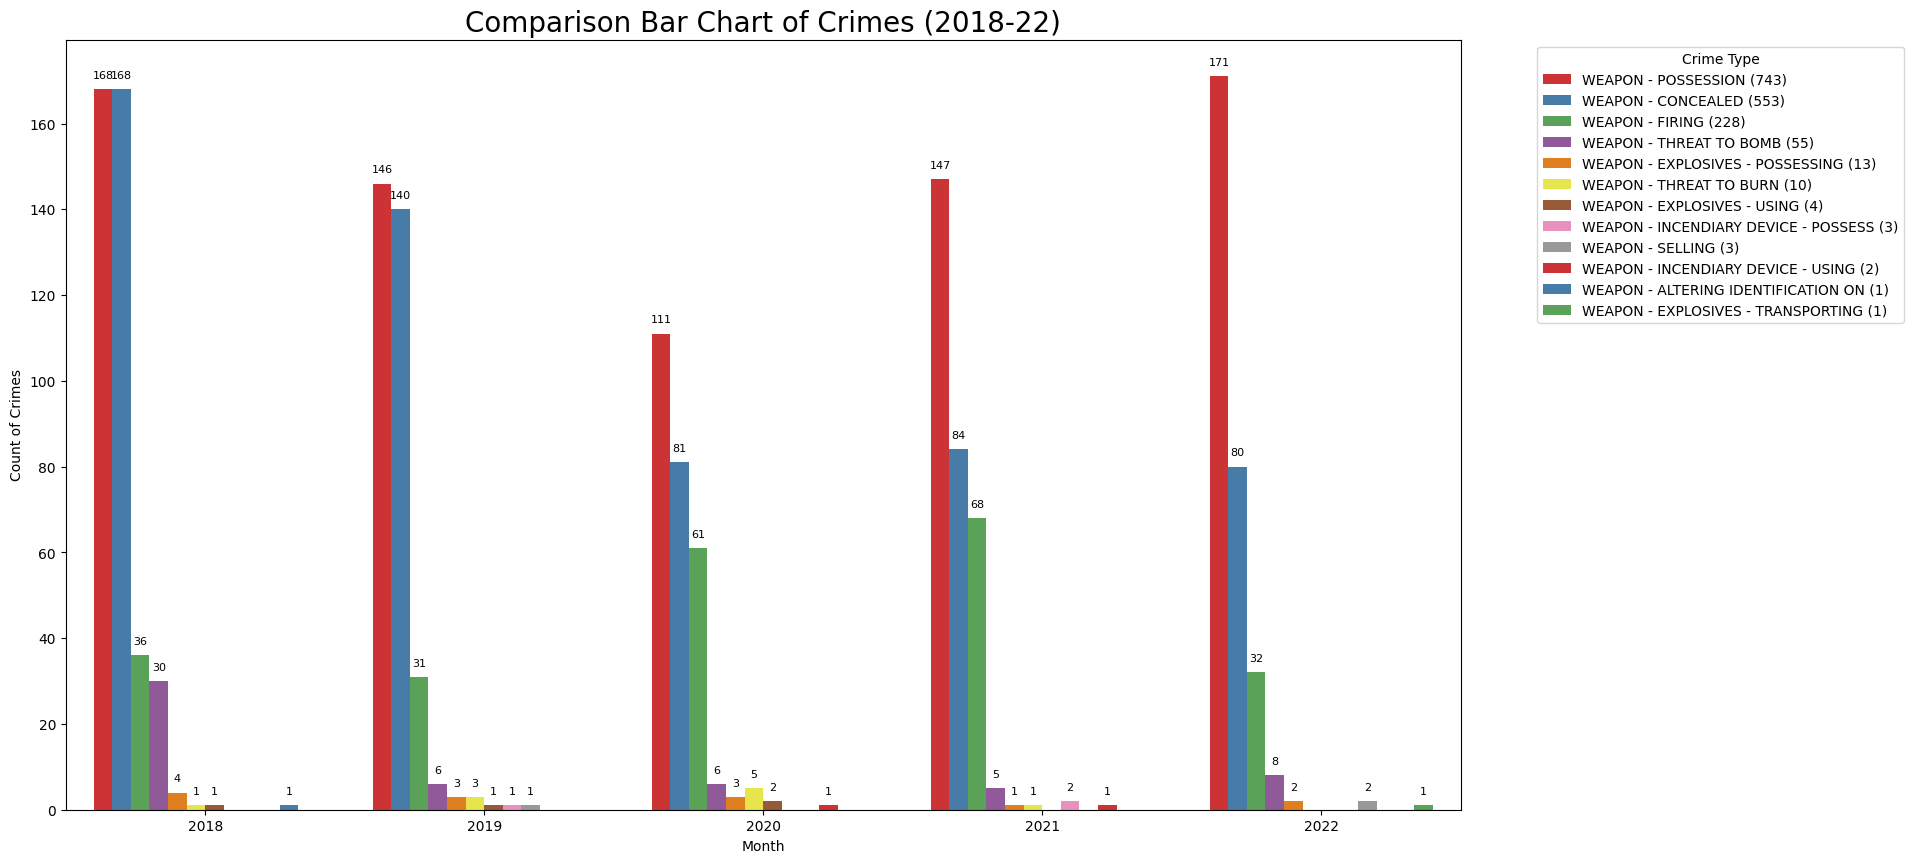

In [ ]:
grouped_data = df1.groupby(['Year', 'Crime Name3']).size().reset_index(name='Count')

# Sort the grouped_data by total count in descending order
sorted_data = grouped_data.groupby('Crime Name3')['Count'].sum().sort_values(ascending=False).index
grouped_data['Crime Name3'] = pd.Categorical(grouped_data['Crime Name3'], categories=sorted_data, ordered=True)
grouped_data = grouped_data.sort_values('Crime Name3')

plt.figure(figsize=(18, 10))
ax = sns.barplot(x='Year', y='Count', hue='Crime Name3', data=grouped_data,
                 palette='Set1')

# Add values above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Set title and labels
plt.title('Comparison Bar Chart of Crimes (2018-22)', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count of Crimes')

handles, labels = ax.get_legend_handles_labels()
legend_labels = [f'{label} ({grouped_data[grouped_data["Crime Name3"] == label]["Count"].sum():.0f})' for label in labels]
ax.legend(handles, legend_labels, title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


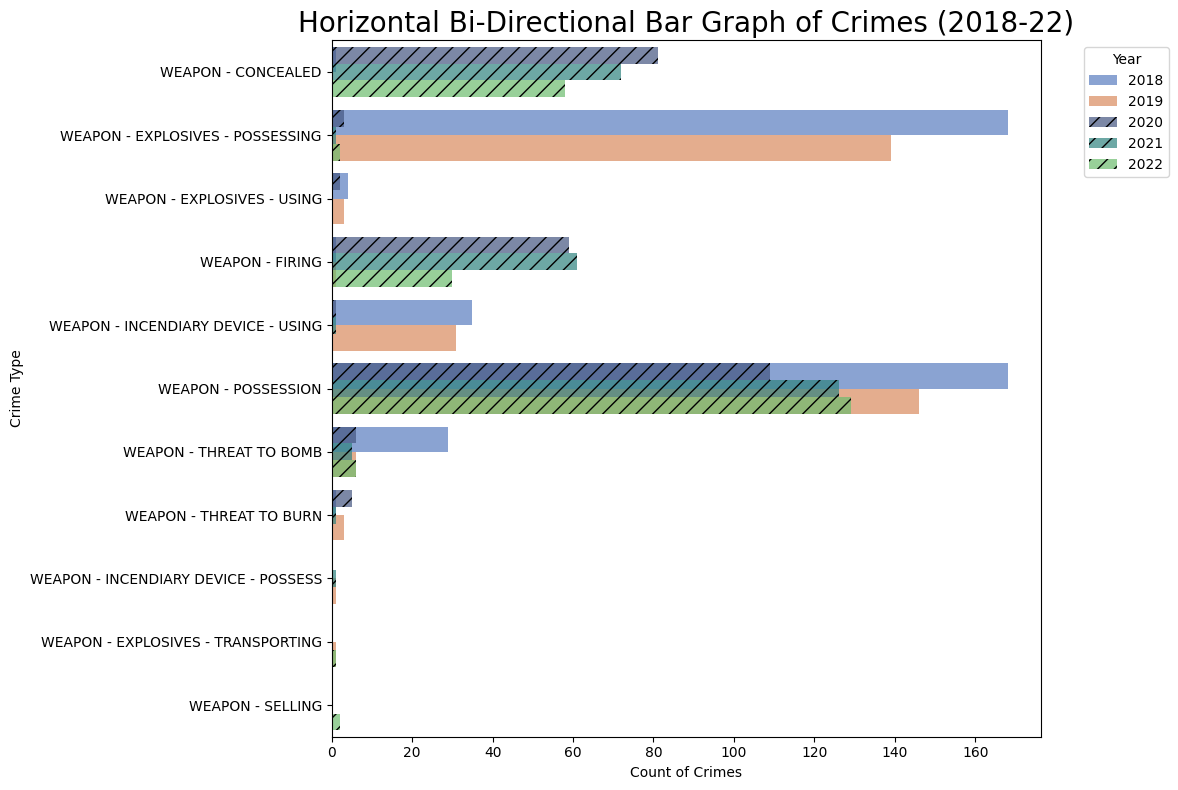

In [ ]:
 # Create unique color palettes for each dataframe
palette_before = sns.color_palette('muted', n_colors=len(df_before['Year'].unique()))
palette_after = sns.color_palette('viridis', n_colors=len(df_after['Year'].unique()))

# Create a figure
plt.figure(figsize=(12, 8))

# Plot bars for the first dataframe (df_before)
sns.barplot(x='Count', y='Crime Name3', hue='Year', data=df_before.groupby(['Year','Crime Name3']).size().reset_index(name='Count'),
            palette=palette_before, alpha=0.7, errorbar=None, orient='h')

# Plot bars for the second dataframe (df_after) in opposite direction
sns.barplot(x='Count_1', y='Crime Name3', hue='Year', data=df_after.groupby(['Year',  'Crime Name3']).size().reset_index(name='Count_1'),
            palette=palette_after, alpha=0.7, errorbar=None, hatch='//', orient='h')

# Set title and labels
plt.title('Horizontal Bi-Directional Bar Graph of Crimes (2018-22)', fontsize=20)
plt.xlabel('Count of Crimes')
plt.ylabel('Crime Type')

# Add a legend
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()



---
Q7. Which city where most people went missing?


---





In [ ]:
df_missing=df.copy()
missing_person_df = df_missing[df_missing['Crime Name3'] == 'MISSING PERSON']
missing_person_df=missing_person_df[missing_person_df['City']!='OTHER']




In [ ]:
df_missing['City'].value_counts()

SILVER SPRING         75253
GAITHERSBURG          31941
ROCKVILLE             30498
GERMANTOWN            21452
BETHESDA              15280
TAKOMA PARK            6543
MONTGOMERY VILLAGE     6410
POTOMAC                4718
CHEVY CHASE            4706
DERWOOD                4110
KENSINGTON             3557
OLNEY                  3242
BURTONSVILLE           2707
CLARKSBURG             2311
DAMASCUS               1834
BOYDS                  1449
BROOKEVILLE             669
POOLESVILLE             656
SANDY SPRING            303
ASHTON                  275
DICKERSON               217
CABIN JOHN              167
SPENCERVILLE             96
MOUNT AIRY               67
GLEN ECHO                60
BRINKLOW                 44
LAUREL                   35
BARNESVILLE              33
BEALLSVILLE              28
BELTSVILLE               18
GARRETT PARK             16
HYATTSVILLE              14
WASHINGTON GROVE         13
HIGHLAND                  8
WHEATON                   5
WOODBINE            

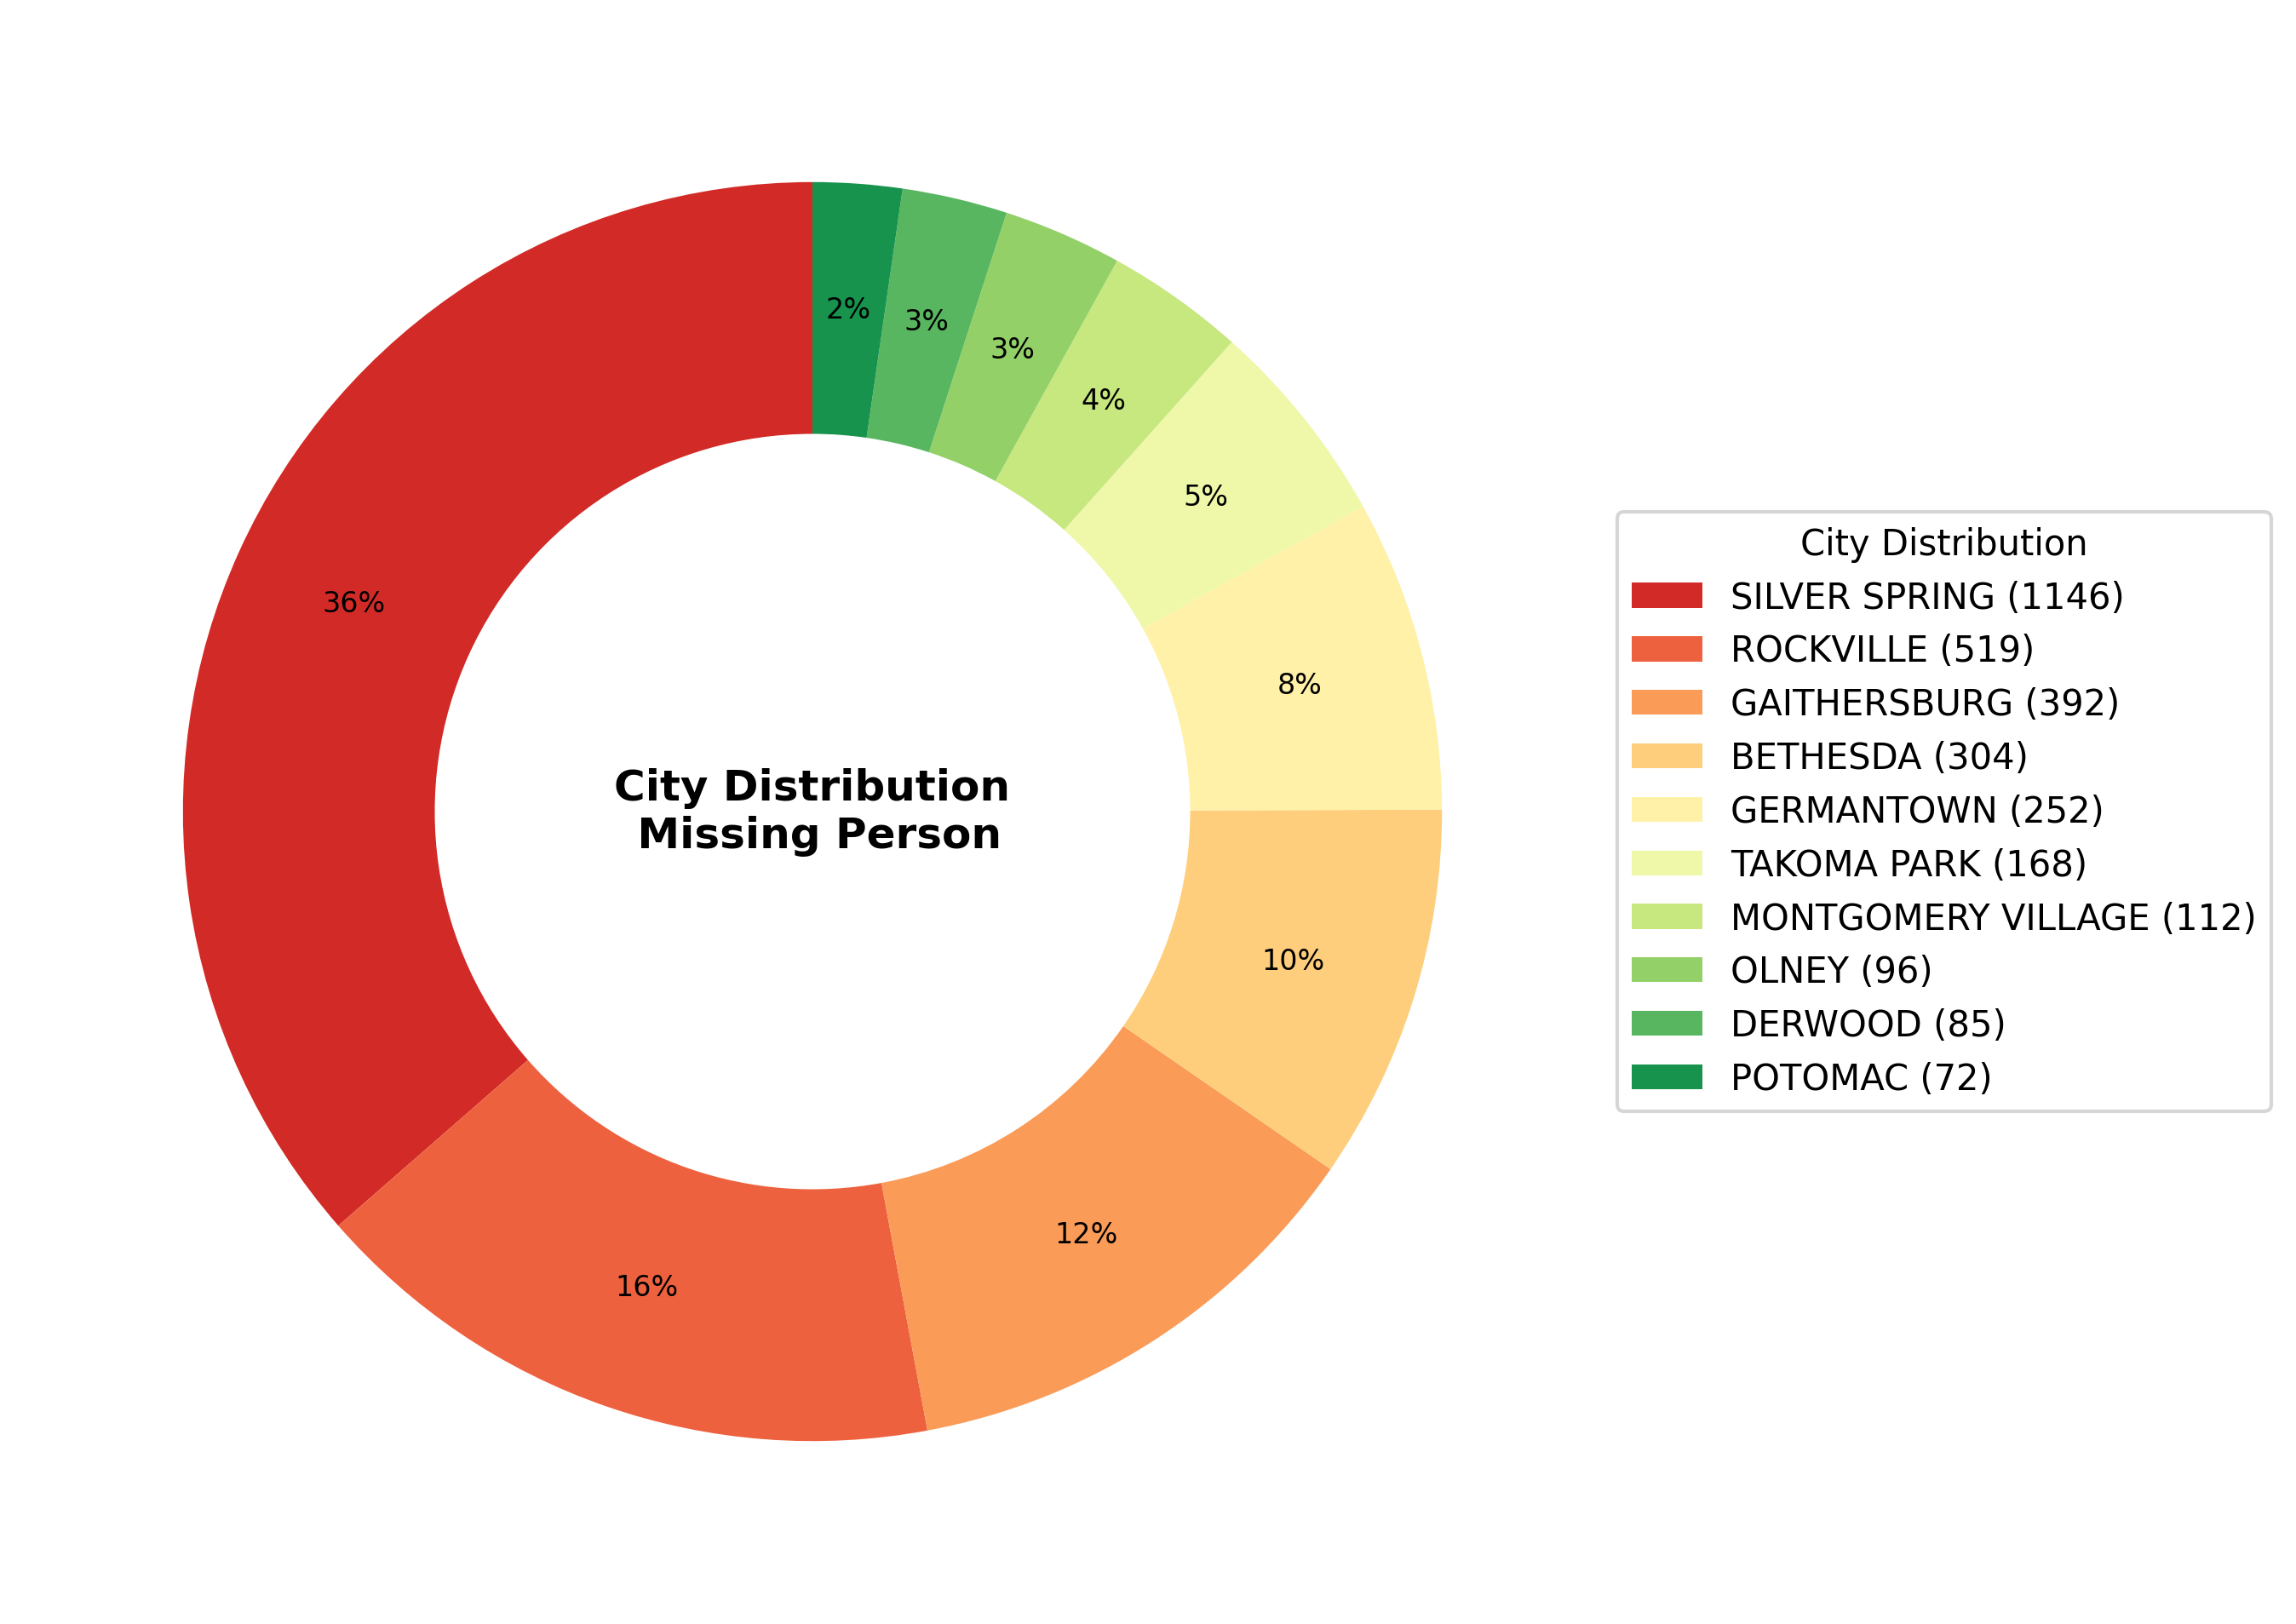

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for 'Missing Person' entries
missing_person_counts = df_missing[df_missing['Crime Name3'] == 'MISSING PERSON']

# Remove entries where the city is 'OTHER'
missing_person_counts = missing_person_counts[missing_person_counts['City'] != 'OTHER']

# Get the top 10 cities based on the count of incidents
# Count incidents for each city
city_incident_counts = missing_person_counts.groupby('City')['Incident ID'].count().reset_index()
city_incident_counts=city_incident_counts.sort_values(by='Incident ID',ascending=False)
top_n_cities = 10
top_cities = city_incident_counts.head(top_n_cities)

# Define a list of dis
# Sort the DataFrame by incident counts in ascending order
#top_cities = top_cities.sort_values(by='Incident ID', ascending=False)

# Set a custom color palette (you can choose from other seaborn palettes or provide your own list of colors)
colors = sns.color_palette("RdYlGn", 10)

# Plot a donut chart for the top 10 cities with percentages
plt.figure(figsize=(10, 8), dpi=300)  # Adjust the figure size and DPI as needed

# Plot the pie chart with labels showing percentages
wedges, text, autotext = plt.pie(
    top_cities['Incident ID'],
    autopct='%1.f%%',  # Display percentage format with a single digit
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4),
    textprops=dict(color="black", fontsize=8),  # Set label text color to white
    pctdistance=0.80  # Adjust the distance of percentage labels from the center
)

# Create a white circle in the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.2, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add text to the center
plt.text(0, 0, 'City Distribution\n Missing Person', ha='center', va='center', fontsize=12, fontweight='bold', color='black')

# Create a custom legend without bullet points
legend_labels = [f'{city} ({count})' for city, count in zip(top_cities['City'], top_cities['Incident ID'])]

# Add the legend outside the pie chart
plt.legend(wedges, legend_labels, title='City Distribution', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))



plt.show()


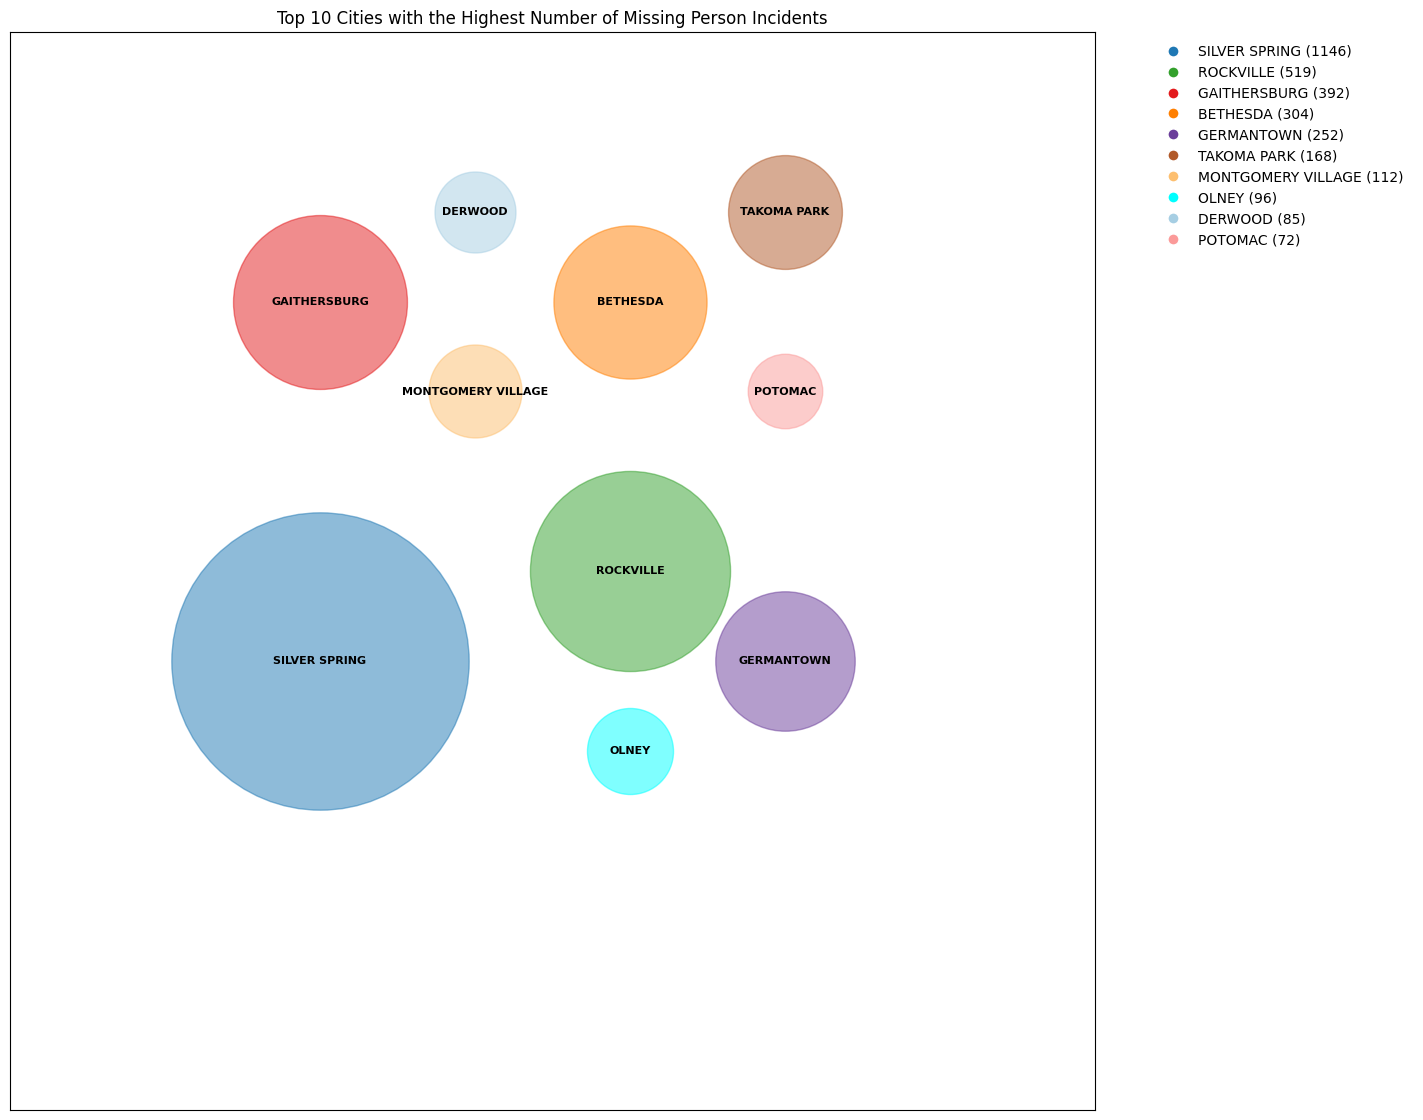

In [ ]:
missing_person_df = df[df['Crime Name3'] == 'MISSING PERSON']

value_counts_missing_person = missing_person_df['Crime Name3'].value_counts()

value_counts_missing_person

incident_counts = df.groupby(['Crime Name3', 'City'])['Incident ID'].count().reset_index()

# Filter the DataFrame for 'Missing Person' entries
missing_person_counts = incident_counts[incident_counts['Crime Name3'] == 'MISSING PERSON']

# Sort the DataFrame by the number of incidents in descending order
missing_person_counts = missing_person_counts.sort_values(by='Incident ID', ascending=False)

# Set a random seed for reproducibility
np.random.seed(42)

# Limit to the top N cities (adjust N as needed)
top_n_cities = 10
top_cities = missing_person_counts.head(top_n_cities)

# Define a list of distinct colors
distinct_colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#b15928', '#fdbf6f', '#00ffff', '#a6cee3', '#fb9a99']

# Manually set positions for each city
positions = {
    'SILVER SPRING': (2, 5),
    'ROCKVILLE': (4, 6),
    'GAITHERSBURG': (2, 9),
    'BETHESDA': (4, 9),
    'GERMANTOWN': (5, 5),
    'TAKOMA PARK': (5, 10),
    'MONTGOMERY VILLAGE': (3, 8),
    'OLNEY': (4, 4),
    'DERWOOD': (3, 10),
    'POTOMAC': (5, 8),
}

# Set a larger figure size
plt.figure(figsize=(14, 14))

# Plot bubbles for each city with a predefined distinct color
for i, (city, incidents) in enumerate(zip(top_cities['City'], top_cities['Incident ID'])):
    # Use the manually set positions
    x, y = positions[city]

    # Calculate the size of the bubble based on the number of incidents
    bubble_size = incidents * 40  # Adjust the multiplier as needed

    # Use a distinct color from the list
    distinct_color = distinct_colors[i % len(distinct_colors)]
    plt.scatter(x, y, s=bubble_size, alpha=0.5, label=f'{city}\n({incidents} incidents)', color=distinct_color)

    # Add text label
    plt.text(x, y, city, ha='center', va='center', fontsize=8, fontweight='bold', color='black')

# Set the limits to ensure all bubbles are within the visible range
plt.xlim(0, 7)
plt.ylim(0, 12)

# Hide x and y axis ticks and labels
plt.xticks([])
plt.yticks([])

# Create a legend without circles
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=distinct_colors[i % len(distinct_colors)], markersize=8) for i in range(len(top_cities))]

# Shift the legend to the right
plt.legend(legend_labels, [f'{city} ({incidents}) ' for city, incidents in zip(top_cities['City'], top_cities['Incident ID'])],
           loc='upper right', bbox_to_anchor=(1.3, 1), frameon=False)

plt.title(f'Top {top_n_cities} Cities with the Highest Number of Missing Person Incidents')

# Save the plot as an image with higher DPI (adjust the file format and DPI as needed)
plt.savefig('missing_person_bubble_chart_distinct_colors.png', bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()



---
Q8. What are the seasonal trends in the different "fraud" cases?


---





2018 0.0
2019 0.03498542274052478
2020 1.0
2021 0.6239067055393586
2022 0.24829931972789104


<ipython-input-185-e1e181159dee>:46: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



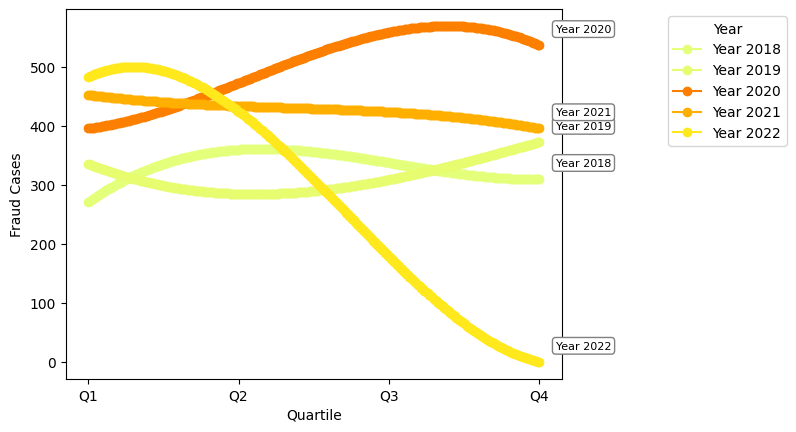

In [ ]:
df_fraud=df.copy()
from scipy.interpolate import make_interp_spline

df_fraud['Start_Date_Time_date']=df_fraud['Start_Date_Time'].dt.date
# Assuming 'Start_Date_Time_date' is in datetime format
df_fraud['Start_Date_Time_date'] = pd.to_datetime(df_fraud['Start_Date_Time_date'])
df_fraud['Year'] = df_fraud['Start_Date_Time_date'].dt.year

df_fraud['Month'] = df_fraud['Start_Date_Time_date'].dt.month_name()

# Filter rows where 'Crime Name3' starts with 'FRAUD -'
fraud_df = df_fraud[df_fraud['Crime Name3'].str.startswith('FRAUD -')]

# Extract the month from the date
fraud_df['Month'] = fraud_df['Start_Date_Time_date'].dt.month

# Define a function to assign quartiles based on months
def assign_quartile(month):
    if 1 <= month <= 3:
        return 'Q1'
    elif 4 <= month <= 6:
        return 'Q2'
    elif 7 <= month <=9 :
        return 'Q3'
    elif 10 <= month <=12:
        return 'Q4'


# Apply the function to create a new column 'Quartile'
fraud_df['Quartile'] = fraud_df['Month'].apply(assign_quartile)

# Assuming you have a DataFrame named fraud_df
fraud_counts = fraud_df.groupby(['Year','Month','Quartile'])['Crime Name3'].count().reset_index(name='Fraud_Cases')

quartile_sum = fraud_counts.groupby(['Year', 'Quartile'])['Fraud_Cases'].sum().reset_index(name='Total_Fraud_Cases')


import numpy as np
# Calculate the mean fraud cases for each year
mean_cases = quartile_sum.groupby('Year')['Total_Fraud_Cases'].mean()

# Normalize mean cases to the range [0, 1] for colormap
normalized_mean = (mean_cases - mean_cases.min()) / (mean_cases.max() - mean_cases.min())

# Define a colormap (you can choose any colormap you like)
colormap = plt.cm.get_cmap('Wistia')

for year in quartile_sum['Year'].unique():
    year_data = quartile_sum[quartile_sum['Year'] == year]

    # Fill missing values with 0
    count_values = year_data.set_index('Quartile')['Total_Fraud_Cases'].reindex(['Q1', 'Q2', 'Q3', 'Q4']).fillna(0)

    # Increase the number of points for a smoother curve
    x_smooth = np.linspace(0, len(count_values) - 1, 300)
    spline = make_interp_spline(range(len(count_values)), count_values, k=3)
    y_smooth = spline(x_smooth)

    # Get color based on normalized mean cases
    print(year,normalized_mean[year])
    color = colormap(normalized_mean[year])

    # Plot the interpolated spline with gradient color
    plt.plot(x_smooth, y_smooth, marker='o', label=f'Year {year}', color=color)

    # Annotate the last point of the line with the year
    plt.annotate(
        f'Year {year}',
        (x_smooth[-1], y_smooth[-1]),
        textcoords="offset points",
        xytext=(12, 8),  # Adjust the offset for x and y to move the label
        ha='left',
        va='bottom',
        fontsize=8,  # Adjust the font size for better visibility
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white')  # Add a white background box for better contrast
    )

# Add labels and legend
plt.xlabel('Quartile')
plt.ylabel('Fraud Cases')
plt.xticks(range(len(['Q1', 'Q2', 'Q3', 'Q4'])), ['Q1', 'Q2', 'Q3', 'Q4'])  # Set x-axis ticks and labels
plt.legend(title='Year', bbox_to_anchor=(1.2, 1), loc='upper left')

# Show the plot
plt.show()


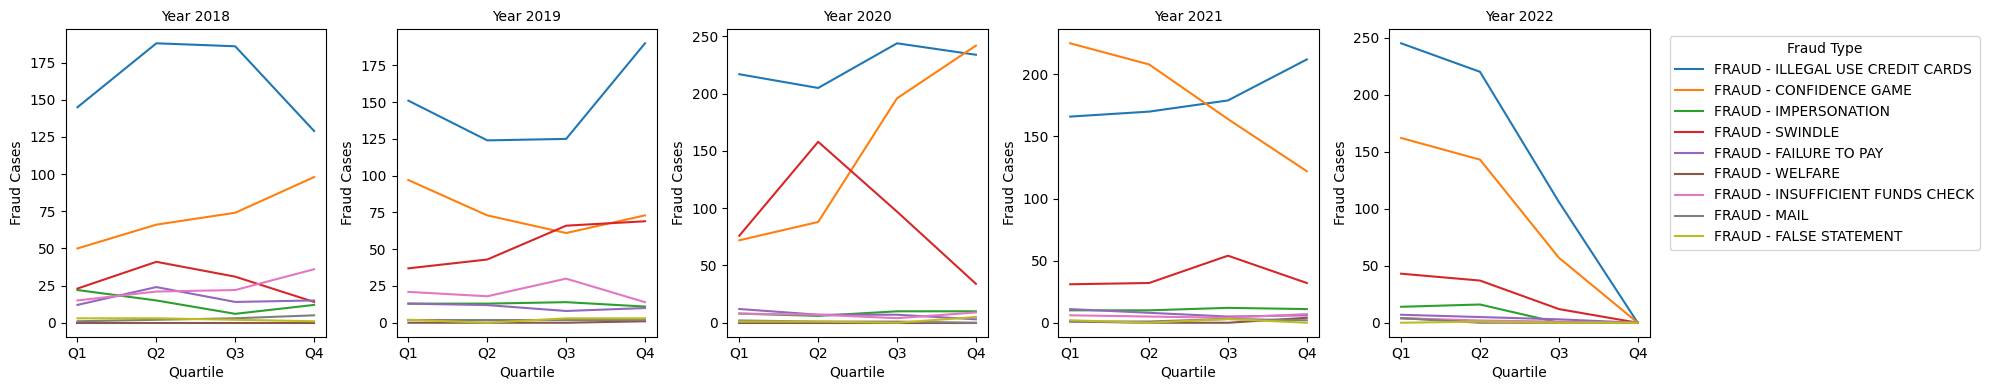

In [ ]:
from scipy.interpolate import make_interp_spline
from matplotlib.lines import Line2D

# Assume you have these imports
# fraud_df, plt.subplots, plt.tight_layout

# Define a list of fraud types
fraud_types = fraud_df['Crime Name3'].unique()

# Calculate the occurrences of each fraud type in each quartile and across years
fraud_counts = fraud_df.groupby(['Year', 'Quartile', 'Crime Name3']).size().reset_index(name='Fraud_Cases')

# Define a seaborn color palette
palette = sns.color_palette("tab10", n_colors=len(fraud_types))

# Get unique years
years = fraud_counts['Year'].unique()

# Set the number of rows and columns for the subplot grid
num_rows = 1
num_cols = 5

# Create a subplot grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 4), sharex=False)  # Adjust figsize as needed

# Flatten the axs array to make it easier to iterate
axs_flat = axs.flatten()

# List to store legend handles
legend_handles = []

# Iterate through each year
for i, year in enumerate(years):
    # Filter data for the current year
    year_data = fraud_counts[fraud_counts['Year'] == year]

    # Set up a new plot for each year
    ax = axs_flat[i]

    # Plotting
    for j, fraud_type in enumerate(fraud_types):
        # Filter data for the current fraud type
        fraud_type_data = year_data[year_data['Crime Name3'] == fraud_type]

        # Fill missing values with 0
        count_values = fraud_type_data.set_index('Quartile')['Fraud_Cases'].reindex(['Q1', 'Q2', 'Q3', 'Q4']).fillna(0)

        # Use explicit x-values
        x_smooth = np.arange(len(count_values))

        # Get color from the seaborn palette
        color = palette[j]

        # Plot the data with the palette color
        line, = ax.plot(x_smooth, count_values, label=f'{fraud_type}', color=color)

        # Add the line handle to the legend_handles list
        legend_handles.append(line)

    # Add labels
    ax.set_title(f'Year {year}', size=10)
    ax.set_ylabel('Fraud Cases')
    ax.set_xlabel('Quartile')
    ax.set_xticks(x_smooth)
    ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

# Create a custom legend using the handles list
legend_labels = [fraud_type for fraud_type in fraud_types]
plt.legend(legend_handles, legend_labels, title='Fraud Type', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

# Adjust layout
plt.tight_layout()
plt.show()


#9.Most dangrous or accident prone streets where drinking and driving happens as per time

#Heat map

#Heatmap for day and night

In [ ]:
#df_dn = df.copy()
#df_dn[['Street Name','City']]

#group Bar Plot

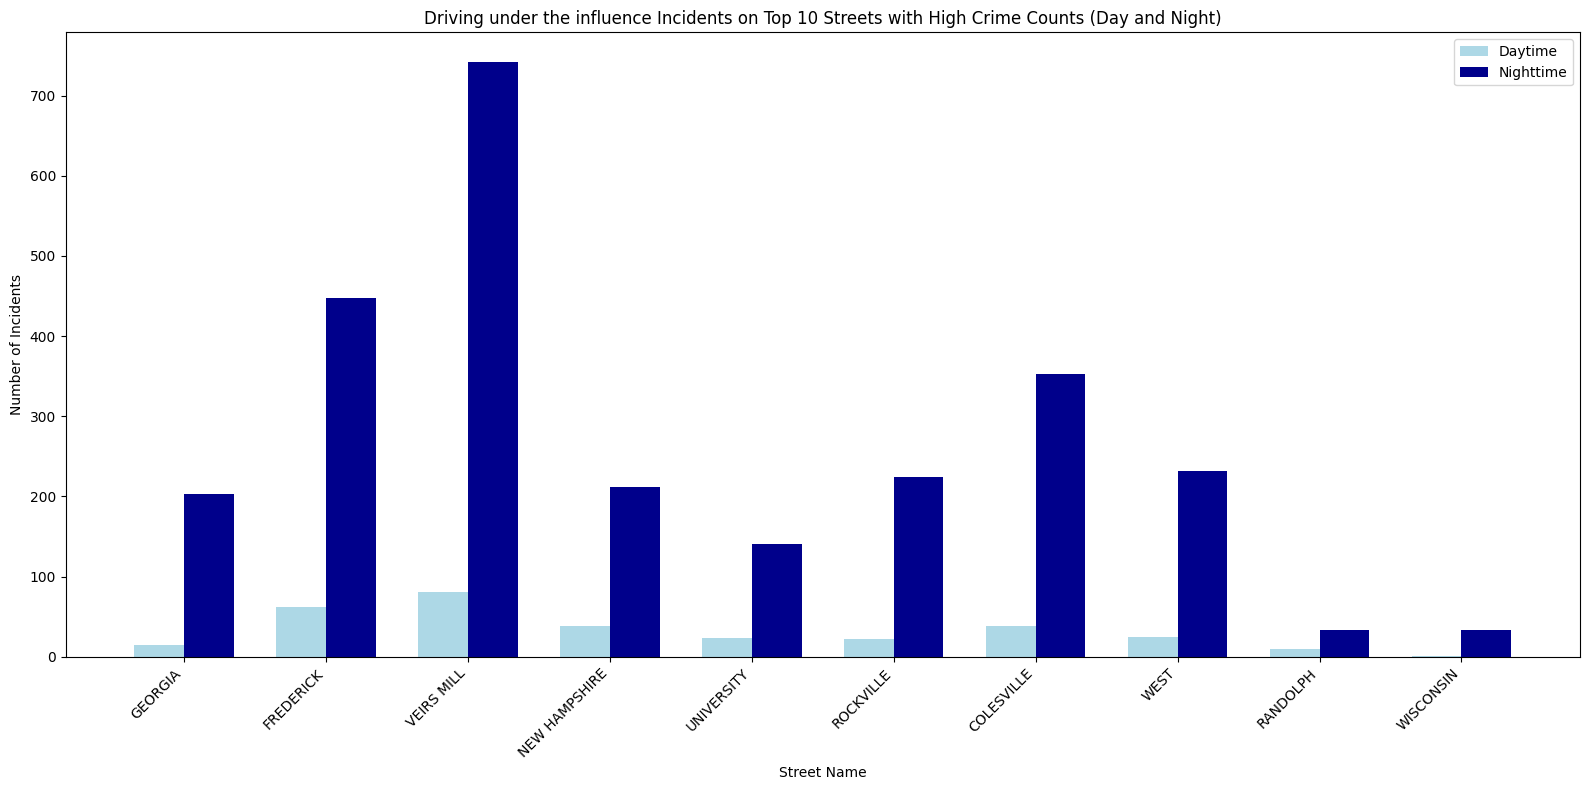

In [ ]:
# Extract hour of the day
df['Hour'] = df['Start_Date_Time'].dt.hour

# Filter data for drinking and driving incidents
dui_incidents = df[df['Crime Name2'] == 'Driving Under the Influence']

# Get the top 10 streets with the highest overall crime counts
top_streets = df['Street Name'].value_counts().nlargest(10).index

# Filter data for the top 10 streets
dui_top_streets = dui_incidents[dui_incidents['Street Name'].isin(top_streets)]

# Group data by street and hour for day and night
day_hourly_counts = dui_top_streets[dui_top_streets['Hour'].between(6, 18)].groupby(['Street Name', 'Hour']).size().unstack(fill_value=0)
night_hourly_counts = dui_top_streets[~dui_top_streets['Hour'].between(6, 18)].groupby(['Street Name', 'Hour']).size().unstack(fill_value=0)

# Sum the counts for each street
day_street_counts = day_hourly_counts.sum(axis=1)
night_street_counts = night_hourly_counts.sum(axis=1)

# Plotting
plt.figure(figsize=(16, 8))

bar_width = 0.35
index = range(len(top_streets))

plt.bar(index, day_street_counts, width=bar_width, color='lightblue', label='Daytime')
plt.bar([i + bar_width for i in index], night_street_counts, width=bar_width, color='darkblue', label='Nighttime')

plt.title('Driving under the influence Incidents on Top 10 Streets with High Crime Counts (Day and Night)')
plt.xlabel('Street Name')
plt.ylabel('Number of Incidents')
plt.xticks([i + bar_width / 2 for i in index], top_streets, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

#Grouped Barplot

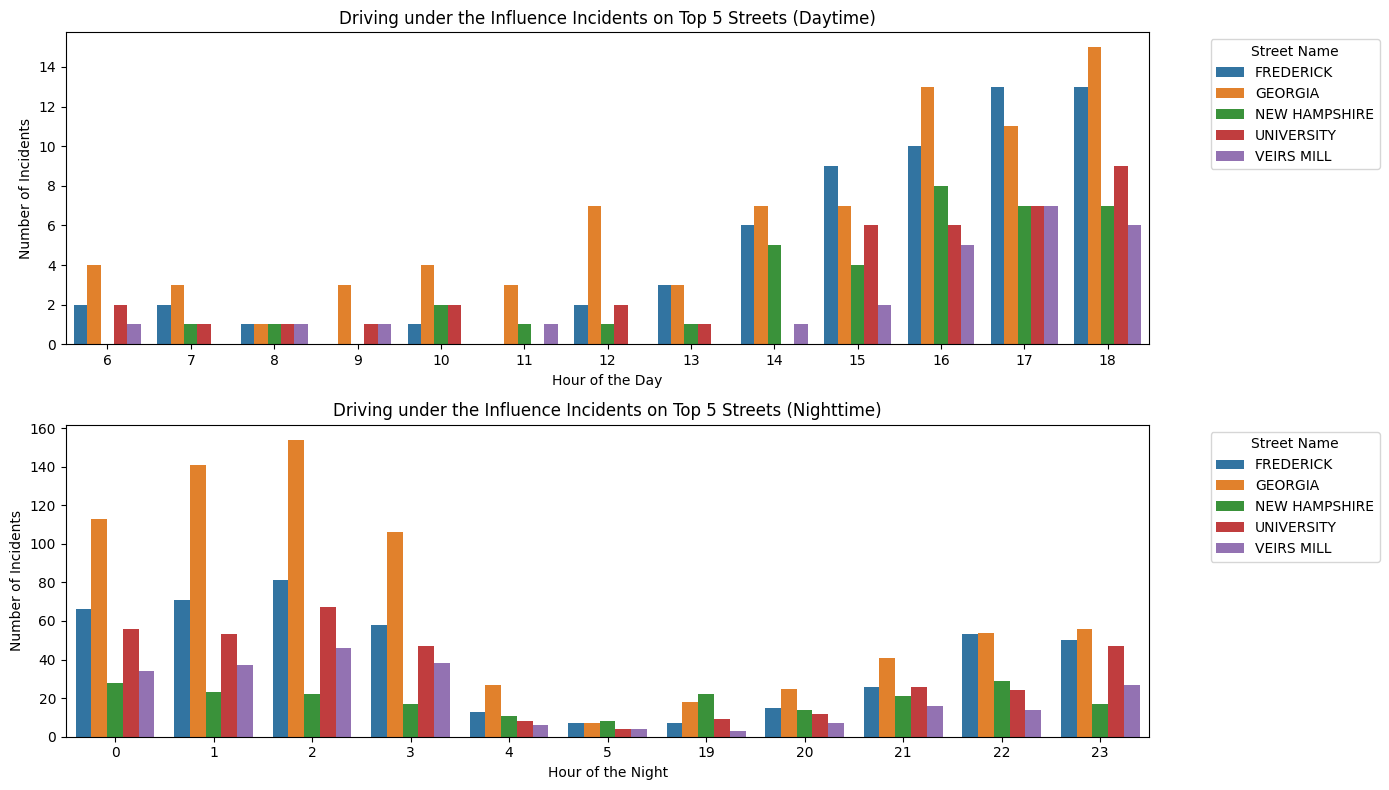

In [ ]:
# Create a copy of the DataFrame
dp_1 = df.copy()

# Extract hour of the day
dp_1['Hour'] = dp_1['Start_Date_Time'].dt.hour

# Filter data for drinking and driving incidents
dui_incidents = dp_1[dp_1['Crime Name2'] == 'Driving Under the Influence']

# Get the top 10 streets with the highest overall crime counts
top_streets = dp_1['Street Name'].value_counts().nlargest(5).index

# Sort the top streets by the total number of incidents
top_streets_sorted = dui_incidents[dui_incidents['Street Name'].isin(top_streets)]['Street Name'].value_counts().nlargest(10).index

# Filter data for the top 10 streets
dui_top_streets = dui_incidents[dui_incidents['Street Name'].isin(top_streets_sorted)]

# Group data by street and hour for day and night
day_hourly_counts = dui_top_streets[dui_top_streets['Hour'].between(6, 18)].groupby(['Street Name', 'Hour']).size().unstack(fill_value=0)
night_hourly_counts = dui_top_streets[~dui_top_streets['Hour'].between(6, 18)].groupby(['Street Name', 'Hour']).size().unstack(fill_value=0)

# Sum the counts for each street
day_street_counts = day_hourly_counts.sum(axis=1)
night_street_counts = night_hourly_counts.sum(axis=1)

# Create separate DataFrames for day and night incidents
df_day = pd.DataFrame(day_hourly_counts.stack(), columns=['Incident Count']).reset_index()
df_night = pd.DataFrame(night_hourly_counts.stack(), columns=['Incident Count']).reset_index()

# Plotting
plt.figure(figsize=(14, 8))

# Daytime plot
plt.subplot(2, 1, 1)
sns.barplot(x='Hour', y='Incident Count', hue='Street Name', data=df_day, palette='tab10')
plt.title('Driving under the Influence Incidents on Top 5 Streets (Daytime)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.legend(title='Street Name', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()

# Nighttime plot
plt.subplot(2, 1, 2)
sns.barplot(x='Hour', y='Incident Count', hue='Street Name', data=df_night, palette='tab10')
plt.title('Driving under the Influence Incidents on Top 5 Streets (Nighttime)')
plt.xlabel('Hour of the Night')
plt.ylabel('Number of Incidents')
plt.legend(title='Street Name', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()

plt.show()

# Heatmap

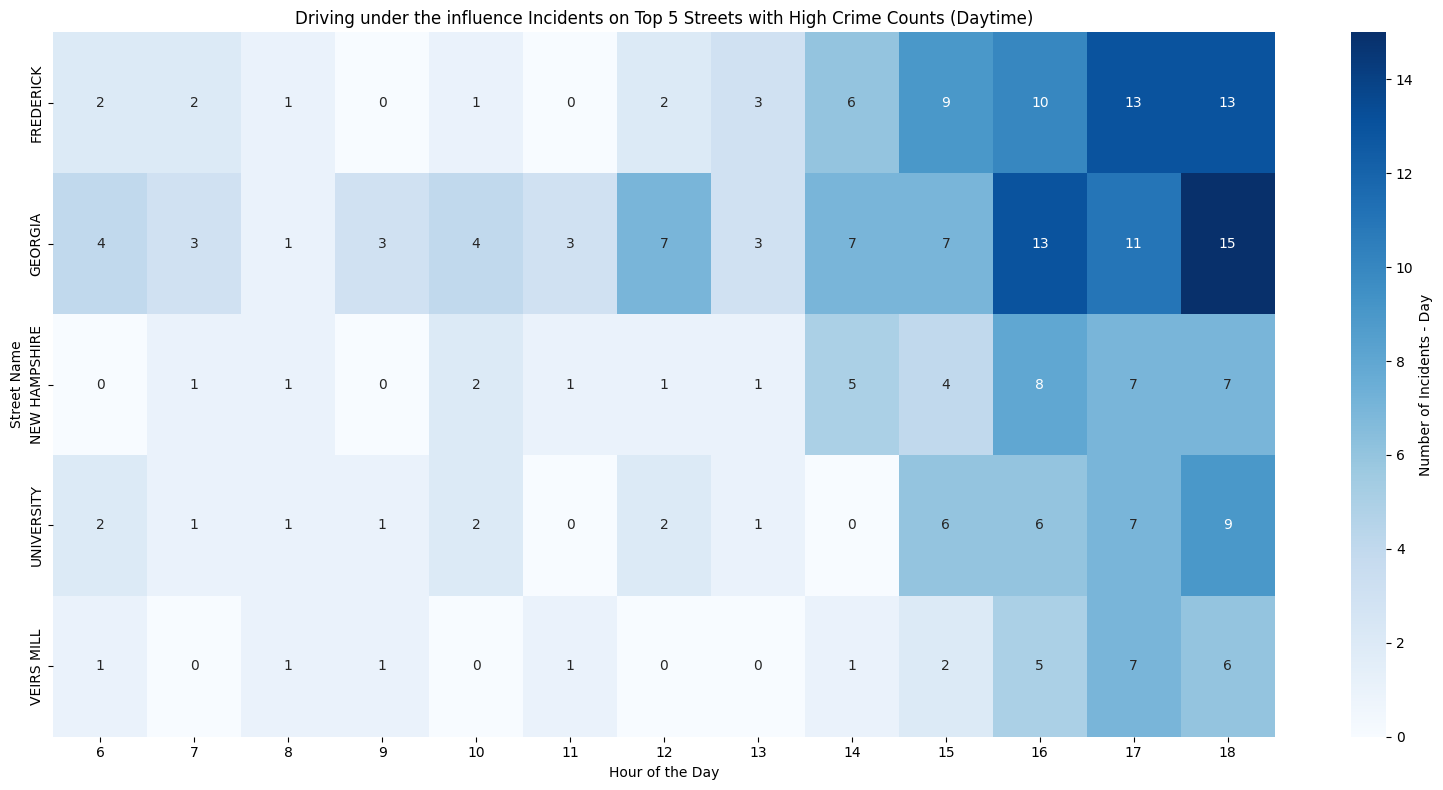

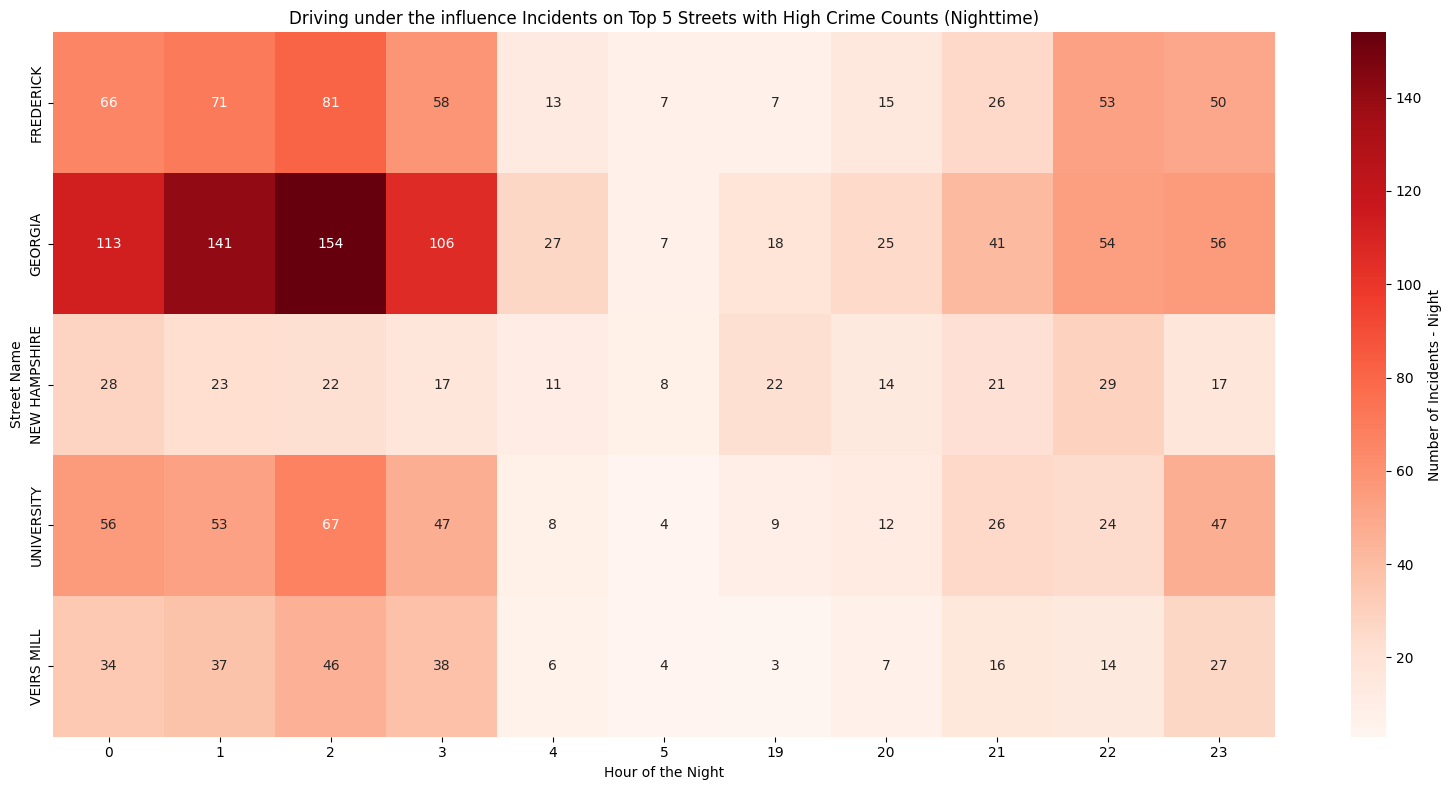

In [ ]:

# Plotting
plt.figure(figsize=(16, 8))

# Combine day and night data for each street
combined_hourly_counts = day_hourly_counts.add(night_hourly_counts, fill_value=0)


# Create heatmaps for day and night
sns.heatmap(day_hourly_counts, cmap='Blues', annot=True, fmt='g', cbar_kws={'label': 'Number of Incidents - Day'})
plt.title('Driving under the influence Incidents on Top 5 Streets with High Crime Counts (Daytime)')
plt.xlabel('Hour of the Day')
plt.ylabel('Street Name')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))
sns.heatmap(night_hourly_counts, cmap='Reds', annot=True, fmt='g', cbar_kws={'label': 'Number of Incidents - Night'})
plt.title('Driving under the influence Incidents on Top 5 Streets with High Crime Counts (Nighttime)')
plt.xlabel('Hour of the Night')
plt.ylabel('Street Name')
plt.tight_layout()
plt.show()


# Q10

In [ ]:
dd = df.copy()

In [ ]:
crimes_lst = [col for col in dd['Crime Name3'].unique() if 'LARCENY' in col]
crimes_lst

['LARCENY - SHOPLIFTING',
 'LARCENY - FROM AUTO',
 'LARCENY - FROM BLDG',
 'LARCENY - FROM YARDS',
 'LARCENY (DESCRIBE OFFENSE)',
 'LARCENY - POSTAL',
 'LARCENY - AUTO PARTS',
 'LARCENY - POCKET PICKING',
 'LARCENY - FROM BANKING-TYPE INST',
 'LARCENY - PURSE SNATCHING - NO FORCE',
 'LARCENY - FROM SHIPMENT',
 'LARCENY - FROM MALLS',
 'LARCENY - FROM COIN MACHINE',
 'LARCENY - THEFT OF US GOVERNMENT PROPERTY',
 'LARCENY - FROM INTERSTATE SHIPMENT']

In [ ]:
#create a mini df with larceny entries
dd_larceny = dd["Crime Name3"].isin(crimes_lst)
dd1 = dd[dd_larceny]
dd1.head(10)

Incident ID Offence Code  CR Number NIBRS Code  Victims  \
50    201277830         2303  200007619        23C        1   
53    201346532         2305  210037745        23F        1   
92    201272090         2303  200000312        23C        1   
103   201276543         2305  200005949        23F        1   
105   201274382         2308  200003258        23D        1   
109   201278559         2303  200008550        23C        1   
110   201292346         2305  200023471        23F        1   
113   201294379         2303  200027059        23C        1   
118   201295195         2303  200028027        23C        1   
121   201338413         2309  210027553        23H        1   

                Crime Name1               Crime Name2            Crime Name3  \
50   Crime Against Property               Shoplifting  LARCENY - SHOPLIFTING   
53   Crime Against Property  Theft From Motor Vehicle    LARCENY - FROM AUTO   
92   Crime Against Property               Shoplifting  LARCENY - SHOPLIFTING   
103  Crime Against Property  Theft From Motor Vehicle    LARCENY - FROM AUTO   
105  Crime Against Property       Theft from Building    LARCENY - FROM BLDG   
109  Crime Against Property               Shoplifting  LARCENY - SHOPLIFTING   
110  Crime Against Property  Theft From Motor Vehicle    LARCENY - FROM AUTO   
113  Crime Against Property               Shoplifting  LARCENY - SHOPLIFTING   
118  Crime Against Property               Shoplifting  LARCENY - SHOPLIFTING   
121  Crime Against Property         All other Larceny   LARCENY - FROM YARDS   

    Police District Name             Block Address  ... Street Type  \
50              BETHESDA   7100 BLK  DEMOCRACY BLV  ...         BLV   
53         SILVER SPRING     11600 BLK  STEWART LA  ...          LA   
92               WHEATON                       NaN  ...         AVE   
103              WHEATON     300 BLK  STONEGATE DR  ...          DR   
105   MONTGOMERY VILLAGE  1  BLK  GRAND CORNER AVE  ...         AVE   
109           GERMANTOWN   20900 BLK  FREDERICK RD  ...          RD   
110             BETHESDA     1  BLK  WELLESLEY CIR  ...         CIR   
113             BETHESDA   7100 BLK  DEMOCRACY BLV  ...         BLV   
118             BETHESDA   7100 BLK  DEMOCRACY BLV  ...         BLV   
121             BETHESDA     9900 BLK  PARKWOOD DR  ...          DR   

        Start_Date_Time   Latitude  Longitude Police District Number  \
50  2020-02-14 20:07:00  39.022077 -77.147376                     2D   
53  2021-09-23 16:00:00   0.000000   0.000000                     3D   
92  2020-01-02 19:50:00  39.025266 -77.046092                     4D   
103 2020-02-04 21:00:00  39.101694 -77.013315                     4D   
105 2020-01-20 15:22:00  39.118012 -77.200401                     6D   
109 2020-02-20 17:17:00  39.198295 -77.244900                     5D   
110 2020-06-11 17:30:00  38.970495 -77.142830                     2D   
113 2020-07-10 15:14:00  39.022077 -77.147376                     2D   
118 2020-07-18 16:10:00  39.022077 -77.147376                     2D   
121 2021-07-16 11:41:00  39.019835 -77.096772                     2D   

     Dispatch_Date_Time   Response_Time  Year Response_TimeDelta Hour  
50  2020-02-14 21:10:52 0 days 01:03:52  2020    0 days 01:03:52   20  
53  2021-09-24 05:25:58 0 days 13:25:58  2021    0 days 13:25:58   16  
92  2020-01-02 19:50:16 0 days 00:00:16  2020    0 days 00:00:16   19  
103 2020-02-05 11:46:40 0 days 14:46:40  2020    0 days 14:46:40   21  
105 2020-01-20 15:22:24 0 days 00:00:24  2020    0 days 00:00:24   15  
109 2020-02-20 17:50:50 0 days 00:33:50  2020    0 days 00:33:50   17  
110 2020-06-15 13:05:16 3 days 19:35:16  2020    3 days 19:35:16   17  
113 2020-07-12 16:30:21 2 days 01:16:21  2020    2 days 01:16:21   15  
118 2020-07-19 14:01:59 0 days 21:51:59  2020    0 days 21:51:59   16  
121 2021-07-16 18:46:34 0 days 07:05:34  2021    0 days 07:05:34   11  

[10 rows x 28 columns]

In [ ]:
dd1['Day'] = dd1['Start_Date_Time'].dt.day_name()

In [ ]:
dd1['Day']

50          Friday
53        Thursday
92        Thursday
103        Tuesday
105         Monday
            ...   
305730     Tuesday
305829    Thursday
305915    Thursday
305944      Sunday
305994     Tuesday
Name: Day, Length: 55219, dtype: object

In [ ]:
dd1['date'] = dd1['Start_Date_Time'].dt.date

In [ ]:
dd1 = dd1[['date','Day', 'Incident ID']].groupby(['date', 'Day']).count()

In [ ]:
dd1.sort_values(by='Incident ID')

Incident ID
date       Day                  
2022-08-07 Sunday              4
2022-01-16 Sunday             10
2022-08-04 Thursday           11
2022-07-31 Sunday             11
2020-04-11 Saturday           11
...                          ...
2018-11-06 Tuesday            61
2019-05-17 Friday             62
2019-07-26 Friday             63
2020-12-22 Tuesday            64
2020-12-04 Friday             71

[1680 rows x 1 columns]

<Figure size 1200x800 with 0 Axes>

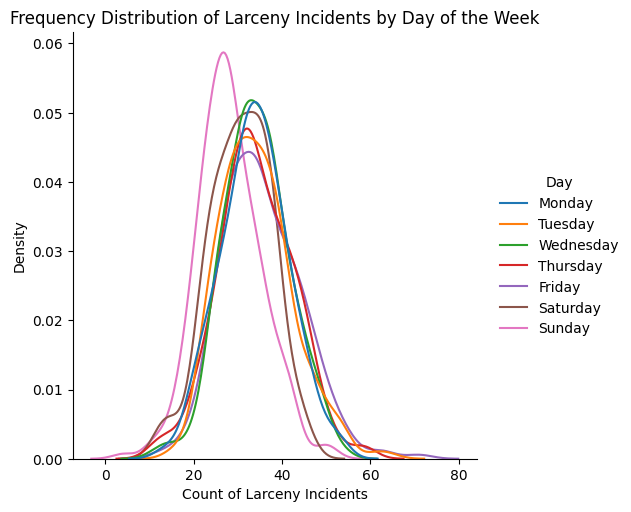

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
sns.displot(data=dd1, x='Incident ID', hue='Day', kind = 'kde', common_norm=False)
plt.xlabel('Count of Larceny Incidents')
plt.title('Frequency Distribution of Larceny Incidents by Day of the Week')
plt.show()

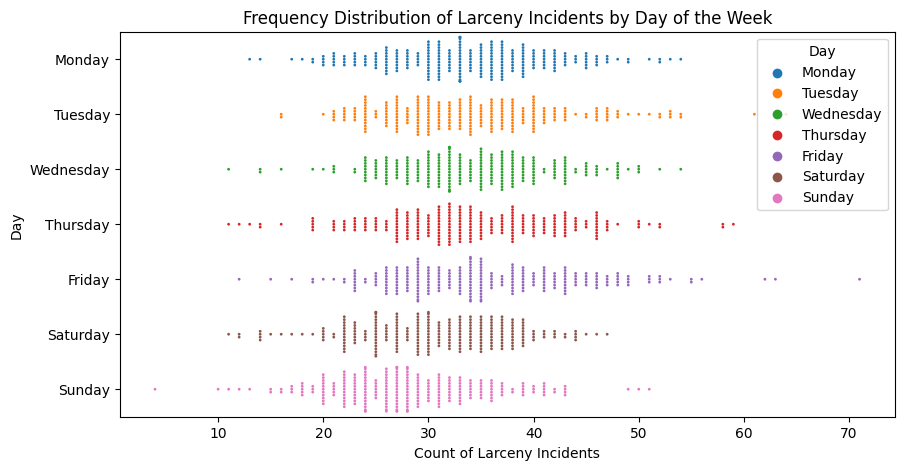

In [ ]:
plt.figure(figsize=(10, 5))
sns.swarmplot(data=dd1, x="Incident ID", y="Day", hue = 'Day', size=2)
plt.xlabel('Count of Larceny Incidents')
plt.title('Frequency Distribution of Larceny Incidents by Day of the Week')
plt.show()